In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 200
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/baseline_drql/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate the Deep Recurrent Q-learning agent (DRQN)
drqn_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=drqn.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        learning_rate=0.01,
        seq_len=1,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=15000,
    epsilon_minimum=0.05,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DRQN",
)

###### DRQN
Learning with: episode_count=20,iteration_count=200,ϵ=0.9,ϵ_min=0.05, ϵ_expdecay=15000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1
  ## Episode: 1/20 'DRQN' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   18.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 1|Iteration 9|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   20.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 1|Iteration 12|reward:   20.0|last_reward_at:   12|Elapsed Time: 0:00:00||

/mnt/c/Users/cabin/git_repo/CyberSecurity-RL/cyberbattle/agents/baseline/agent_drqn.py:533: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/libtorch_1751464468084/work/torch/csrc/utils/tensor_new.cpp:254.)
  x = torch.tensor(states_to_consider, dtype=torch.float32, device=device).unsqueeze(1)  # [B,1,D]
Episode 1|Iteration 17|reward:  120.0|last_reward_at:   12|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  120.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:  134.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  142.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  142.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  148.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 24|reward:  148.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  154.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 1|Iteration 54|reward:  154.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 89|reward:  154.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  254.0|last_reward_at:   54|Elapsed Time: 0:00:00||

Episode 1|Iteration 119|reward:  254.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  268.0|last_reward_at:  119|Elapsed Time: 0:00:00||

Episode 1|Iteration 142|reward:  268.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  274.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 1|Iteration 147|reward:  274.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  276.0|last_reward_at:  147|Elapsed Time: 0:00:00||

Episode 1|Iteration 163|reward:  276.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 198|reward:  276.0|last_reward_at:  163|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  276.0|last_reward_at:  163|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/32 (0.11)
    explore-remote: 5/63 (0.07)
    explore-connect: 2/73 (0.03)
    exploit-local: 1/4 (0.20)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/16 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 2/20 'DRQN' ϵ=0.8888, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   20.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 6|reward:   20.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  120.0|last_reward_at:    6|Elapsed Time: 0:00:00||

Episode 2|Iteration 7|reward:  120.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:00||

Episode 2|Iteration 17|reward:  134.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  142.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  142.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  148.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 28|reward:  148.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  154.0|last_reward_at:   28|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  254.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 124|reward:  254.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  265.0|last_reward_at:  124|Elapsed Time: 0:00:00||

Episode 2|Iteration 148|reward:  265.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 151|reward:  274.0|last_reward_at:  148|Elapsed Time: 0:00:00||

Episode 2|Iteration 151|reward:  274.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  276.0|last_reward_at:  151|Elapsed Time: 0:00:00||

Episode 2|Iteration 152|reward:  276.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  280.0|last_reward_at:  152|Elapsed Time: 0:00:00||

Episode 2|Iteration 161|reward:  280.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 193|reward:  280.0|last_reward_at:  161|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  280.0|last_reward_at:  161|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/32 (0.11)
    explore-remote: 6/62 (0.09)
    explore-connect: 2/72 (0.03)
    exploit-local: 1/2 (0.33)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/19 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 3/20 'DRQN' ϵ=0.8777, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 54|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 97|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 112|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 113|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 3|Iteration 114|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 3|Iteration 115|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:01||

Episode 3|Iteration 116|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 3|Iteration 117|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 3|Iteration 118|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 3|Iteration 119|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 3|Iteration 120|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 3|Iteration 121|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 3|Iteration 122|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:04||

Episode 3|Iteration 122|reward:  120.0|last_reward_at:  122|Elapsed Time: 0:00:04||

Episode 3|Iteration 123|reward:  120.0|last_reward_at:  122|Elapsed Time: 0:00:05||

Episode 3|Iteration 124|reward:  134.0|last_reward_at:  122|Elapsed Time: 0:00:05||

Episode 3|Iteration 124|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:05||

Episode 3|Iteration 125|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 3|Iteration 126|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 3|Iteration 127|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:06||

Episode 3|Iteration 128|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 3|Iteration 129|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:07||

Episode 3|Iteration 130|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:08||

Episode 3|Iteration 131|reward:  134.0|last_reward_at:  124|Elapsed Time: 0:00:08||

Episode 3|Iteration 132|reward:  140.0|last_reward_at:  124|Elapsed Time: 0:00:09||

Episode 3|Iteration 132|reward:  140.0|last_reward_at:  132|Elapsed Time: 0:00:09||

Episode 3|Iteration 133|reward:  140.0|last_reward_at:  132|Elapsed Time: 0:00:09||

Episode 3|Iteration 134|reward:  148.0|last_reward_at:  132|Elapsed Time: 0:00:09||

Episode 3|Iteration 134|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:09||

Episode 3|Iteration 135|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 136|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:10||

Episode 3|Iteration 137|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 138|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 139|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:11||

Episode 3|Iteration 140|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:12||

Episode 3|Iteration 141|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:12||

Episode 3|Iteration 142|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:13||

Episode 3|Iteration 143|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:13||

Episode 3|Iteration 144|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:14||

Episode 3|Iteration 145|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:14||

Episode 3|Iteration 146|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:14||

Episode 3|Iteration 147|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:15||

Episode 3|Iteration 148|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:15||

Episode 3|Iteration 149|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:16||

Episode 3|Iteration 150|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:16||

Episode 3|Iteration 151|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:17||

Episode 3|Iteration 152|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:17||

Episode 3|Iteration 153|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:17||

Episode 3|Iteration 154|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:18||

Episode 3|Iteration 155|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:18||

Episode 3|Iteration 156|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:19||

Episode 3|Iteration 157|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:19||

Episode 3|Iteration 158|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:20||

Episode 3|Iteration 159|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:20||

Episode 3|Iteration 160|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:20||

Episode 3|Iteration 161|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:21||

Episode 3|Iteration 162|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:21||

Episode 3|Iteration 163|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:22||

Episode 3|Iteration 164|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:22||

Episode 3|Iteration 165|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:23||

Episode 3|Iteration 166|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:23||

Episode 3|Iteration 167|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:23||

Episode 3|Iteration 168|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:24||

Episode 3|Iteration 169|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:24||

Episode 3|Iteration 170|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:25||

Episode 3|Iteration 171|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:25||

Episode 3|Iteration 172|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:26||

Episode 3|Iteration 173|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:26||

Episode 3|Iteration 174|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:27||

Episode 3|Iteration 175|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:27||

Episode 3|Iteration 176|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:28||

Episode 3|Iteration 177|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:28||

Episode 3|Iteration 178|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:28||

Episode 3|Iteration 179|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:29||

Episode 3|Iteration 180|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:29||

Episode 3|Iteration 181|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:30||

Episode 3|Iteration 182|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:30||

Episode 3|Iteration 183|reward:  148.0|last_reward_at:  134|Elapsed Time: 0:00:31||

Episode 3|Iteration 184|reward:  154.0|last_reward_at:  134|Elapsed Time: 0:00:31||

Episode 3|Iteration 184|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:31||

Episode 3|Iteration 185|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:32||

Episode 3|Iteration 186|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:32||

Episode 3|Iteration 187|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:33||

Episode 3|Iteration 188|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:33||

Episode 3|Iteration 189|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:34||

Episode 3|Iteration 190|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:35||

Episode 3|Iteration 191|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:35||

Episode 3|Iteration 192|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:36||

Episode 3|Iteration 193|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:38||

Episode 3|Iteration 194|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:41||

Episode 3|Iteration 195|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:45||

Episode 3|Iteration 196|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:48||

Episode 3|Iteration 197|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:51||

Episode 3|Iteration 198|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:55||

Episode 3|Iteration 199|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:00:58||

Episode 3|Iteration 200|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:01:01||

Episode 3|Iteration 200|reward:  154.0|last_reward_at:  184|Elapsed Time: 0:01:01||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/16 (0.16)
    explore-remote: 4/76 (0.05)
    explore-connect: 1/77 (0.01)
    exploit-local: 0/9 (0.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/14 (0.00)
  exploit deflected to exploration: 4
  ## Episode: 4/20 'DRQN' ϵ=0.8667, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 4|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 4|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:12||

Episode 4|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:16||

Episode 4|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:21||

Episode 4|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:25||

Episode 4|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:30||

Episode 4|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:34||

Episode 4|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:38||

Episode 4|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:38||

Episode 4|Iteration 10|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:43||

Episode 4|Iteration 11|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:47||

Episode 4|Iteration 12|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:52||

Episode 4|Iteration 13|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:57||

Episode 4|Iteration 14|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:01:02||

Episode 4|Iteration 15|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:01:06||

Episode 4|Iteration 16|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:01:11||

Episode 4|Iteration 17|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:01:17||

Episode 4|Iteration 18|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:01:21||

Episode 4|Iteration 19|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:01:27||

Episode 4|Iteration 19|reward:  114.0|last_reward_at:   19|Elapsed Time: 0:01:27||

Episode 4|Iteration 20|reward:  114.0|last_reward_at:   19|Elapsed Time: 0:01:32||

Episode 4|Iteration 21|reward:  116.0|last_reward_at:   19|Elapsed Time: 0:01:37||

Episode 4|Iteration 21|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:01:37||

Episode 4|Iteration 22|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:01:42||

Episode 4|Iteration 23|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:01:47||

Episode 4|Iteration 24|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:01:52||

Episode 4|Iteration 25|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:01:57||

Episode 4|Iteration 26|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:02:03||

Episode 4|Iteration 27|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:02:07||

Episode 4|Iteration 28|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:02:12||

Episode 4|Iteration 29|reward:  116.0|last_reward_at:   21|Elapsed Time: 0:02:18||

Episode 4|Iteration 30|reward:  130.0|last_reward_at:   21|Elapsed Time: 0:02:23||

Episode 4|Iteration 30|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:02:23||

Episode 4|Iteration 31|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:02:28||

Episode 4|Iteration 32|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:02:33||

Episode 4|Iteration 33|reward:  130.0|last_reward_at:   30|Elapsed Time: 0:02:38||

Episode 4|Iteration 34|reward:  136.0|last_reward_at:   30|Elapsed Time: 0:02:42||

Episode 4|Iteration 34|reward:  136.0|last_reward_at:   34|Elapsed Time: 0:02:42||

Episode 4|Iteration 35|reward:  142.0|last_reward_at:   34|Elapsed Time: 0:02:48||

Episode 4|Iteration 35|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:02:48||

Episode 4|Iteration 36|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:02:53||

Episode 4|Iteration 37|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:02:58||

Episode 4|Iteration 38|reward:  142.0|last_reward_at:   35|Elapsed Time: 0:03:04||

Episode 4|Iteration 39|reward:  144.0|last_reward_at:   35|Elapsed Time: 0:03:09||

Episode 4|Iteration 39|reward:  144.0|last_reward_at:   39|Elapsed Time: 0:03:09||

Episode 4|Iteration 40|reward:  144.0|last_reward_at:   39|Elapsed Time: 0:03:14||

Episode 4|Iteration 41|reward:  144.0|last_reward_at:   39|Elapsed Time: 0:03:19||

Episode 4|Iteration 42|reward:  244.0|last_reward_at:   39|Elapsed Time: 0:03:25||

Episode 4|Iteration 42|reward:  244.0|last_reward_at:   42|Elapsed Time: 0:03:25||

Episode 4|Iteration 43|reward:  244.0|last_reward_at:   42|Elapsed Time: 0:03:30||

Episode 4|Iteration 44|reward:  258.0|last_reward_at:   42|Elapsed Time: 0:03:35||

Episode 4|Iteration 44|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:03:35||

Episode 4|Iteration 45|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:03:40||

Episode 4|Iteration 46|reward:  258.0|last_reward_at:   44|Elapsed Time: 0:03:45||

Episode 4|Iteration 47|reward:  260.0|last_reward_at:   44|Elapsed Time: 0:03:50||

Episode 4|Iteration 47|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:03:50||

Episode 4|Iteration 48|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:03:55||

Episode 4|Iteration 49|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:04:01||

Episode 4|Iteration 50|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:04:05||

Episode 4|Iteration 51|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:04:11||

Episode 4|Iteration 52|reward:  260.0|last_reward_at:   47|Elapsed Time: 0:04:15||

Episode 4|Iteration 53|reward:  264.0|last_reward_at:   47|Elapsed Time: 0:04:21||

Episode 4|Iteration 53|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:04:21||

Episode 4|Iteration 54|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:04:26||

Episode 4|Iteration 55|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:04:31||

Episode 4|Iteration 56|reward:  264.0|last_reward_at:   53|Elapsed Time: 0:04:36||

Episode 4|Iteration 57|reward:  270.0|last_reward_at:   53|Elapsed Time: 0:04:41||

Episode 4|Iteration 57|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:04:41||

Episode 4|Iteration 58|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:04:47||

Episode 4|Iteration 59|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:04:52||

Episode 4|Iteration 60|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:04:57||

Episode 4|Iteration 61|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:02||

Episode 4|Iteration 62|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:08||

Episode 4|Iteration 63|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:13||

Episode 4|Iteration 64|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:18||

Episode 4|Iteration 65|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:23||

Episode 4|Iteration 66|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:28||

Episode 4|Iteration 67|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:33||

Episode 4|Iteration 68|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:38||

Episode 4|Iteration 69|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:43||

Episode 4|Iteration 70|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:48||

Episode 4|Iteration 71|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:53||

Episode 4|Iteration 72|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:05:59||

Episode 4|Iteration 73|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:06:04||

Episode 4|Iteration 74|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:06:10||

Episode 4|Iteration 75|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:06:15||

Episode 4|Iteration 76|reward:  270.0|last_reward_at:   57|Elapsed Time: 0:06:20||

Episode 4|Iteration 77|reward:  370.0|last_reward_at:   57|Elapsed Time: 0:06:26||

Episode 4|Iteration 77|reward:  370.0|last_reward_at:   77|Elapsed Time: 0:06:26||

Episode 4|Iteration 78|reward:  370.0|last_reward_at:   77|Elapsed Time: 0:06:31||

Episode 4|Iteration 79|reward:  370.0|last_reward_at:   77|Elapsed Time: 0:06:37||

Episode 4|Iteration 80|reward:  376.0|last_reward_at:   77|Elapsed Time: 0:06:44||

Episode 4|Iteration 80|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:06:44||

Episode 4|Iteration 81|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:06:52||

Episode 4|Iteration 82|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:06:58||

Episode 4|Iteration 83|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:05||

Episode 4|Iteration 84|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:13||

Episode 4|Iteration 85|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:19||

Episode 4|Iteration 86|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:25||

Episode 4|Iteration 87|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:30||

Episode 4|Iteration 88|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:35||

Episode 4|Iteration 89|reward:  376.0|last_reward_at:   80|Elapsed Time: 0:07:40||

Episode 4|Iteration 90|reward:  390.0|last_reward_at:   80|Elapsed Time: 0:07:47||

Episode 4|Iteration 90|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:07:47||

Episode 4|Iteration 91|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:07:53||

Episode 4|Iteration 92|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:07:58||

Episode 4|Iteration 93|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:03||

Episode 4|Iteration 94|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:09||

Episode 4|Iteration 95|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:13||

Episode 4|Iteration 96|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:19||

Episode 4|Iteration 97|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:24||

Episode 4|Iteration 98|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:30||

Episode 4|Iteration 99|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:35||

Episode 4|Iteration 100|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:42||

Episode 4|Iteration 101|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:47||

Episode 4|Iteration 102|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:52||

Episode 4|Iteration 103|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:08:58||

Episode 4|Iteration 104|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:09:03||

Episode 4|Iteration 105|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:09:09||

Episode 4|Iteration 106|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:09:14||

Episode 4|Iteration 107|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:09:19||

Episode 4|Iteration 108|reward:  390.0|last_reward_at:   90|Elapsed Time: 0:09:24||

Episode 4|Iteration 109|reward:  396.0|last_reward_at:   90|Elapsed Time: 0:09:30||

Episode 4|Iteration 109|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:30||

Episode 4|Iteration 110|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:35||

Episode 4|Iteration 111|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:40||

Episode 4|Iteration 112|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:46||

Episode 4|Iteration 113|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:50||

Episode 4|Iteration 114|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:09:56||

Episode 4|Iteration 115|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:01||

Episode 4|Iteration 116|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:06||

Episode 4|Iteration 117|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:11||

Episode 4|Iteration 118|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:16||

Episode 4|Iteration 119|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:21||

Episode 4|Iteration 120|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:26||

Episode 4|Iteration 121|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:31||

Episode 4|Iteration 122|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:37||

Episode 4|Iteration 123|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:42||

Episode 4|Iteration 124|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:47||

Episode 4|Iteration 125|reward:  396.0|last_reward_at:  109|Elapsed Time: 0:10:51||

Episode 4|Iteration 126|reward:  404.0|last_reward_at:  109|Elapsed Time: 0:10:56||

Episode 4|Iteration 126|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:10:56||

Episode 4|Iteration 127|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:02||

Episode 4|Iteration 128|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:07||

Episode 4|Iteration 129|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:12||

Episode 4|Iteration 130|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:17||

Episode 4|Iteration 131|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:22||

Episode 4|Iteration 132|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:27||

Episode 4|Iteration 133|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:34||

Episode 4|Iteration 134|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:41||

Episode 4|Iteration 135|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:47||

Episode 4|Iteration 136|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:53||

Episode 4|Iteration 137|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:11:57||

Episode 4|Iteration 138|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:03||

Episode 4|Iteration 139|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:08||

Episode 4|Iteration 140|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:14||

Episode 4|Iteration 141|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:19||

Episode 4|Iteration 142|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:24||

Episode 4|Iteration 143|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:29||

Episode 4|Iteration 144|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:34||

Episode 4|Iteration 145|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:40||

Episode 4|Iteration 146|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:46||

Episode 4|Iteration 147|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:51||

Episode 4|Iteration 148|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:12:56||

Episode 4|Iteration 149|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:13:01||

Episode 4|Iteration 150|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:13:06||

Episode 4|Iteration 151|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:13:11||

Episode 4|Iteration 152|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:13:17||

Episode 4|Iteration 153|reward:  404.0|last_reward_at:  126|Elapsed Time: 0:13:23||

Episode 4|Iteration 154|reward:  504.0|last_reward_at:  126|Elapsed Time: 0:13:28||

Episode 4|Iteration 154|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:28||

Episode 4|Iteration 155|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:33||

Episode 4|Iteration 156|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:38||

Episode 4|Iteration 157|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:43||

Episode 4|Iteration 158|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:48||

Episode 4|Iteration 159|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:53||

Episode 4|Iteration 160|reward:  504.0|last_reward_at:  154|Elapsed Time: 0:13:59||

Episode 4|Iteration 161|reward:  518.0|last_reward_at:  154|Elapsed Time: 0:14:04||

Episode 4|Iteration 161|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:04||

Episode 4|Iteration 162|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:09||

Episode 4|Iteration 163|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:14||

Episode 4|Iteration 164|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:19||

Episode 4|Iteration 165|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:24||

Episode 4|Iteration 166|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:30||

Episode 4|Iteration 167|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:34||

Episode 4|Iteration 168|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:39||

Episode 4|Iteration 169|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:44||

Episode 4|Iteration 170|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:48||

Episode 4|Iteration 171|reward:  518.0|last_reward_at:  161|Elapsed Time: 0:14:53||

Episode 4|Iteration 172|reward:  522.0|last_reward_at:  161|Elapsed Time: 0:14:58||

Episode 4|Iteration 172|reward:  522.0|last_reward_at:  172|Elapsed Time: 0:14:58||

Episode 4|Iteration 173|reward:  522.0|last_reward_at:  172|Elapsed Time: 0:15:03||

Episode 4|Iteration 174|reward:  528.0|last_reward_at:  172|Elapsed Time: 0:15:08||

Episode 4|Iteration 174|reward:  528.0|last_reward_at:  174|Elapsed Time: 0:15:08||

Episode 4|Iteration 175|reward:  528.0|last_reward_at:  174|Elapsed Time: 0:15:13||

Episode 4|Iteration 176|reward:  628.0|last_reward_at:  174|Elapsed Time: 0:15:19||

Episode 4|Iteration 176|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:19||

Episode 4|Iteration 177|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:23||

Episode 4|Iteration 178|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:28||

Episode 4|Iteration 179|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:33||

Episode 4|Iteration 180|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:38||

Episode 4|Iteration 181|reward:  628.0|last_reward_at:  176|Elapsed Time: 0:15:43||

Episode 4|Iteration 182|reward:  642.0|last_reward_at:  176|Elapsed Time: 0:15:49||

Episode 4|Iteration 182|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:15:49||

Episode 4|Iteration 183|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:15:54||

Episode 4|Iteration 184|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:16:00||

Episode 4|Iteration 185|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:16:05||

Episode 4|Iteration 186|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:16:09||

Episode 4|Iteration 187|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:16:14||

Episode 4|Iteration 188|reward:  642.0|last_reward_at:  182|Elapsed Time: 0:16:19||

Episode 4|Iteration 189|reward:  648.0|last_reward_at:  182|Elapsed Time: 0:16:25||

Episode 4|Iteration 189|reward:  648.0|last_reward_at:  189|Elapsed Time: 0:16:25||

Episode 4|Iteration 190|reward:  648.0|last_reward_at:  189|Elapsed Time: 0:16:30||

Episode 4|Iteration 191|reward:  648.0|last_reward_at:  189|Elapsed Time: 0:16:35||

Episode 4|Iteration 192|reward:  650.0|last_reward_at:  189|Elapsed Time: 0:16:40||

Episode 4|Iteration 192|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:16:40||

Episode 4|Iteration 193|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:16:45||

Episode 4|Iteration 194|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:16:51||

Episode 4|Iteration 195|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:16:56||

Episode 4|Iteration 196|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:01||

Episode 4|Iteration 197|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:06||

Episode 4|Iteration 198|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:11||

Episode 4|Iteration 199|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:16||

Episode 4|Iteration 200|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:21||

Episode 4|Iteration 200|reward:  650.0|last_reward_at:  192|Elapsed Time: 0:17:21||

  Episode 4 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/39 (0.09)
    explore-remote: 8/66 (0.11)
    explore-connect: 2/62 (0.03)
    exploit-local: 6/3 (0.67)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 3/4 (0.43)
  exploit deflected to exploration: 3
  ## Episode: 5/20 'DRQN' ϵ=0.8559, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 5|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 5|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:15||

Episode 5|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:20||

Episode 5|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:24||

Episode 5|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:29||

Episode 5|Iteration 7|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:34||

Episode 5|Iteration 8|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:40||

Episode 5|Iteration 9|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:46||

Episode 5|Iteration 10|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:50||

Episode 5|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:55||

Episode 5|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:55||

Episode 5|Iteration 12|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:01:00||

Episode 5|Iteration 13|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:01:06||

Episode 5|Iteration 13|reward:   18.0|last_reward_at:   13|Elapsed Time: 0:01:06||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:01:11||

Episode 5|Iteration 14|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:11||

Episode 5|Iteration 15|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:16||

Episode 5|Iteration 16|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:22||

Episode 5|Iteration 17|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:26||

Episode 5|Iteration 18|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:31||

Episode 5|Iteration 19|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:36||

Episode 5|Iteration 20|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:41||

Episode 5|Iteration 21|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:46||

Episode 5|Iteration 22|reward:  118.0|last_reward_at:   14|Elapsed Time: 0:01:51||

Episode 5|Iteration 23|reward:  132.0|last_reward_at:   14|Elapsed Time: 0:01:56||

Episode 5|Iteration 23|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:01:56||

Episode 5|Iteration 24|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:02:01||

Episode 5|Iteration 25|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:02:06||

Episode 5|Iteration 26|reward:  132.0|last_reward_at:   23|Elapsed Time: 0:02:11||

Episode 5|Iteration 27|reward:  140.0|last_reward_at:   23|Elapsed Time: 0:02:16||

Episode 5|Iteration 27|reward:  140.0|last_reward_at:   27|Elapsed Time: 0:02:16||

Episode 5|Iteration 28|reward:  146.0|last_reward_at:   27|Elapsed Time: 0:02:22||

Episode 5|Iteration 28|reward:  146.0|last_reward_at:   28|Elapsed Time: 0:02:22||

Episode 5|Iteration 29|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:02:28||

Episode 5|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:28||

Episode 5|Iteration 30|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:32||

Episode 5|Iteration 31|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:37||

Episode 5|Iteration 32|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:42||

Episode 5|Iteration 33|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:48||

Episode 5|Iteration 34|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:52||

Episode 5|Iteration 35|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:02:58||

Episode 5|Iteration 36|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:03:02||

Episode 5|Iteration 37|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:03:08||

Episode 5|Iteration 38|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:03:13||

Episode 5|Iteration 39|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:03:18||

Episode 5|Iteration 40|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:03:23||

Episode 5|Iteration 41|reward:  154.0|last_reward_at:   29|Elapsed Time: 0:03:29||

Episode 5|Iteration 41|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:29||

Episode 5|Iteration 42|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:33||

Episode 5|Iteration 43|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:39||

Episode 5|Iteration 44|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:43||

Episode 5|Iteration 45|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:48||

Episode 5|Iteration 46|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:53||

Episode 5|Iteration 47|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:03:58||

Episode 5|Iteration 48|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:03||

Episode 5|Iteration 49|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:08||

Episode 5|Iteration 50|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:14||

Episode 5|Iteration 51|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:19||

Episode 5|Iteration 52|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:24||

Episode 5|Iteration 53|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:30||

Episode 5|Iteration 54|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:35||

Episode 5|Iteration 55|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:39||

Episode 5|Iteration 56|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:45||

Episode 5|Iteration 57|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:50||

Episode 5|Iteration 58|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:04:56||

Episode 5|Iteration 59|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:01||

Episode 5|Iteration 60|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:06||

Episode 5|Iteration 61|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:11||

Episode 5|Iteration 62|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:16||

Episode 5|Iteration 63|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:21||

Episode 5|Iteration 64|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:27||

Episode 5|Iteration 65|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:32||

Episode 5|Iteration 66|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:37||

Episode 5|Iteration 67|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:42||

Episode 5|Iteration 68|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:47||

Episode 5|Iteration 69|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:53||

Episode 5|Iteration 70|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:05:58||

Episode 5|Iteration 71|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:03||

Episode 5|Iteration 72|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:08||

Episode 5|Iteration 73|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:13||

Episode 5|Iteration 74|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:18||

Episode 5|Iteration 75|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:23||

Episode 5|Iteration 76|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:28||

Episode 5|Iteration 77|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:33||

Episode 5|Iteration 78|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:39||

Episode 5|Iteration 79|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:43||

Episode 5|Iteration 80|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:49||

Episode 5|Iteration 81|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:54||

Episode 5|Iteration 82|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:06:59||

Episode 5|Iteration 83|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:04||

Episode 5|Iteration 84|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:09||

Episode 5|Iteration 85|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:14||

Episode 5|Iteration 86|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:19||

Episode 5|Iteration 87|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:24||

Episode 5|Iteration 88|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:29||

Episode 5|Iteration 89|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:34||

Episode 5|Iteration 90|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:40||

Episode 5|Iteration 91|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:44||

Episode 5|Iteration 92|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:49||

Episode 5|Iteration 93|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:54||

Episode 5|Iteration 94|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:07:59||

Episode 5|Iteration 95|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:05||

Episode 5|Iteration 96|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:10||

Episode 5|Iteration 97|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:15||

Episode 5|Iteration 98|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:20||

Episode 5|Iteration 99|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:26||

Episode 5|Iteration 100|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:31||

Episode 5|Iteration 101|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:36||

Episode 5|Iteration 102|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:42||

Episode 5|Iteration 103|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:47||

Episode 5|Iteration 104|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:52||

Episode 5|Iteration 105|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:08:57||

Episode 5|Iteration 106|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:02||

Episode 5|Iteration 107|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:07||

Episode 5|Iteration 108|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:13||

Episode 5|Iteration 109|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:18||

Episode 5|Iteration 110|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:22||

Episode 5|Iteration 111|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:27||

Episode 5|Iteration 112|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:32||

Episode 5|Iteration 113|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:37||

Episode 5|Iteration 114|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:42||

Episode 5|Iteration 115|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:48||

Episode 5|Iteration 116|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:53||

Episode 5|Iteration 117|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:53||

Episode 5|Iteration 117|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:09:58||

Episode 5|Iteration 118|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:04||

Episode 5|Iteration 119|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:08||

Episode 5|Iteration 120|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:13||

Episode 5|Iteration 121|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:18||

Episode 5|Iteration 122|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:23||

Episode 5|Iteration 123|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:29||

Episode 5|Iteration 124|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:34||

Episode 5|Iteration 125|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:39||

Episode 5|Iteration 126|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:44||

Episode 5|Iteration 127|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:49||

Episode 5|Iteration 128|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:10:55||

Episode 5|Iteration 129|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:00||

Episode 5|Iteration 130|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:05||

Episode 5|Iteration 131|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:10||

Episode 5|Iteration 132|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:15||

Episode 5|Iteration 133|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:20||

Episode 5|Iteration 134|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:26||

Episode 5|Iteration 135|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:31||

Episode 5|Iteration 136|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:36||

Episode 5|Iteration 137|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:42||

Episode 5|Iteration 138|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:47||

Episode 5|Iteration 139|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:52||

Episode 5|Iteration 140|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:11:57||

Episode 5|Iteration 141|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:02||

Episode 5|Iteration 142|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:08||

Episode 5|Iteration 143|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:13||

Episode 5|Iteration 144|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:17||

Episode 5|Iteration 145|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:23||

Episode 5|Iteration 146|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:28||

Episode 5|Iteration 147|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:34||

Episode 5|Iteration 148|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:39||

Episode 5|Iteration 149|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:45||

Episode 5|Iteration 150|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:49||

Episode 5|Iteration 151|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:12:54||

Episode 5|Iteration 152|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:00||

Episode 5|Iteration 153|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:05||

Episode 5|Iteration 154|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:10||

Episode 5|Iteration 155|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:16||

Episode 5|Iteration 156|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:20||

Episode 5|Iteration 157|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:25||

Episode 5|Iteration 158|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:31||

Episode 5|Iteration 159|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:36||

Episode 5|Iteration 160|reward:  154.0|last_reward_at:   41|Elapsed Time: 0:13:41||

Episode 5|Iteration 161|reward:  254.0|last_reward_at:   41|Elapsed Time: 0:13:46||

Episode 5|Iteration 161|reward:  254.0|last_reward_at:  161|Elapsed Time: 0:13:46||

Episode 5|Iteration 162|reward:  254.0|last_reward_at:  161|Elapsed Time: 0:13:51||

Episode 5|Iteration 163|reward:  254.0|last_reward_at:  161|Elapsed Time: 0:13:57||

Episode 5|Iteration 164|reward:  254.0|last_reward_at:  161|Elapsed Time: 0:14:02||

Episode 5|Iteration 165|reward:  254.0|last_reward_at:  161|Elapsed Time: 0:14:07||

Episode 5|Iteration 166|reward:  268.0|last_reward_at:  161|Elapsed Time: 0:14:12||

Episode 5|Iteration 166|reward:  268.0|last_reward_at:  166|Elapsed Time: 0:14:12||

Episode 5|Iteration 167|reward:  268.0|last_reward_at:  166|Elapsed Time: 0:14:17||

Episode 5|Iteration 168|reward:  268.0|last_reward_at:  166|Elapsed Time: 0:14:22||

Episode 5|Iteration 169|reward:  272.0|last_reward_at:  166|Elapsed Time: 0:14:27||

Episode 5|Iteration 169|reward:  272.0|last_reward_at:  169|Elapsed Time: 0:14:27||

Episode 5|Iteration 170|reward:  272.0|last_reward_at:  169|Elapsed Time: 0:14:32||

Episode 5|Iteration 171|reward:  372.0|last_reward_at:  169|Elapsed Time: 0:14:37||

Episode 5|Iteration 171|reward:  372.0|last_reward_at:  171|Elapsed Time: 0:14:37||

Episode 5|Iteration 172|reward:  372.0|last_reward_at:  171|Elapsed Time: 0:14:42||

Episode 5|Iteration 173|reward:  372.0|last_reward_at:  171|Elapsed Time: 0:14:48||

Episode 5|Iteration 174|reward:  386.0|last_reward_at:  171|Elapsed Time: 0:14:53||

Episode 5|Iteration 174|reward:  386.0|last_reward_at:  174|Elapsed Time: 0:14:53||

Episode 5|Iteration 175|reward:  386.0|last_reward_at:  174|Elapsed Time: 0:14:59||

Episode 5|Iteration 176|reward:  386.0|last_reward_at:  174|Elapsed Time: 0:15:04||

Episode 5|Iteration 177|reward:  386.0|last_reward_at:  174|Elapsed Time: 0:15:09||

Episode 5|Iteration 178|reward:  386.0|last_reward_at:  174|Elapsed Time: 0:15:14||

Episode 5|Iteration 179|reward:  392.0|last_reward_at:  174|Elapsed Time: 0:15:20||

Episode 5|Iteration 179|reward:  392.0|last_reward_at:  179|Elapsed Time: 0:15:20||

Episode 5|Iteration 180|reward:  392.0|last_reward_at:  179|Elapsed Time: 0:15:25||

Episode 5|Iteration 181|reward:  392.0|last_reward_at:  179|Elapsed Time: 0:15:30||

Episode 5|Iteration 182|reward:  400.0|last_reward_at:  179|Elapsed Time: 0:15:36||

Episode 5|Iteration 182|reward:  400.0|last_reward_at:  182|Elapsed Time: 0:15:36||

Episode 5|Iteration 183|reward:  400.0|last_reward_at:  182|Elapsed Time: 0:15:41||

Episode 5|Iteration 184|reward:  400.0|last_reward_at:  182|Elapsed Time: 0:15:47||

Episode 5|Iteration 185|reward:  400.0|last_reward_at:  182|Elapsed Time: 0:15:52||

Episode 5|Iteration 186|reward:  406.0|last_reward_at:  182|Elapsed Time: 0:15:56||

Episode 5|Iteration 186|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:15:56||

Episode 5|Iteration 187|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:02||

Episode 5|Iteration 188|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:07||

Episode 5|Iteration 189|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:12||

Episode 5|Iteration 190|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:18||

Episode 5|Iteration 191|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:24||

Episode 5|Iteration 192|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:28||

Episode 5|Iteration 193|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:33||

Episode 5|Iteration 194|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:38||

Episode 5|Iteration 195|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:44||

Episode 5|Iteration 196|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:49||

Episode 5|Iteration 197|reward:  406.0|last_reward_at:  186|Elapsed Time: 0:16:54||

Episode 5|Iteration 198|reward:  408.0|last_reward_at:  186|Elapsed Time: 0:16:59||

Episode 5|Iteration 198|reward:  408.0|last_reward_at:  198|Elapsed Time: 0:16:59||

Episode 5|Iteration 199|reward:  408.0|last_reward_at:  198|Elapsed Time: 0:17:05||

Episode 5|Iteration 200|reward:  408.0|last_reward_at:  198|Elapsed Time: 0:17:11||

Episode 5|Iteration 200|reward:  408.0|last_reward_at:  198|Elapsed Time: 0:17:11||

  Episode 5 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/37 (0.00)
    explore-remote: 7/71 (0.09)
    explore-connect: 0/56 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 1/4 (0.20)
    exploit-connect: 3/10 (0.23)
  exploit deflected to exploration: 0
  ## Episode: 6/20 'DRQN' ϵ=0.8452, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 6|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 6|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 6|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:16||

Episode 6|Iteration 4|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:20||

Episode 6|Iteration 5|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:26||

Episode 6|Iteration 6|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:31||

Episode 6|Iteration 7|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:36||

Episode 6|Iteration 8|reward:   16.0|last_reward_at:    2|Elapsed Time: 0:00:41||

Episode 6|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:41||

Episode 6|Iteration 9|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:47||

Episode 6|Iteration 10|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:51||

Episode 6|Iteration 11|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:57||

Episode 6|Iteration 12|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:01:02||

Episode 6|Iteration 13|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:01:07||

Episode 6|Iteration 14|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:01:12||

Episode 6|Iteration 14|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:01:12||

Episode 6|Iteration 15|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:01:18||

Episode 6|Iteration 16|reward:  116.0|last_reward_at:   14|Elapsed Time: 0:01:23||

Episode 6|Iteration 17|reward:  130.0|last_reward_at:   14|Elapsed Time: 0:01:28||

Episode 6|Iteration 17|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:01:28||

Episode 6|Iteration 18|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:01:33||

Episode 6|Iteration 19|reward:  136.0|last_reward_at:   17|Elapsed Time: 0:01:38||

Episode 6|Iteration 19|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:01:38||

Episode 6|Iteration 20|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:01:43||

Episode 6|Iteration 21|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:01:49||

Episode 6|Iteration 22|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:01:54||

Episode 6|Iteration 23|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:01:59||

Episode 6|Iteration 24|reward:  136.0|last_reward_at:   19|Elapsed Time: 0:02:04||

Episode 6|Iteration 25|reward:  144.0|last_reward_at:   19|Elapsed Time: 0:02:09||

Episode 6|Iteration 25|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:09||

Episode 6|Iteration 26|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:15||

Episode 6|Iteration 27|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:21||

Episode 6|Iteration 28|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:26||

Episode 6|Iteration 29|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:30||

Episode 6|Iteration 30|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:36||

Episode 6|Iteration 31|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:41||

Episode 6|Iteration 32|reward:  144.0|last_reward_at:   25|Elapsed Time: 0:02:47||

Episode 6|Iteration 33|reward:  150.0|last_reward_at:   25|Elapsed Time: 0:02:52||

Episode 6|Iteration 33|reward:  150.0|last_reward_at:   33|Elapsed Time: 0:02:52||

Episode 6|Iteration 34|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:02:57||

Episode 6|Iteration 34|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:02:57||

Episode 6|Iteration 35|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:03||

Episode 6|Iteration 36|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:08||

Episode 6|Iteration 37|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:13||

Episode 6|Iteration 38|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:18||

Episode 6|Iteration 39|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:23||

Episode 6|Iteration 40|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:29||

Episode 6|Iteration 41|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:34||

Episode 6|Iteration 42|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:39||

Episode 6|Iteration 43|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:45||

Episode 6|Iteration 44|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:50||

Episode 6|Iteration 45|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:03:56||

Episode 6|Iteration 46|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:01||

Episode 6|Iteration 47|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:06||

Episode 6|Iteration 48|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:11||

Episode 6|Iteration 49|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:16||

Episode 6|Iteration 50|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:21||

Episode 6|Iteration 51|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:26||

Episode 6|Iteration 52|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:32||

Episode 6|Iteration 53|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:37||

Episode 6|Iteration 54|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:42||

Episode 6|Iteration 55|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:47||

Episode 6|Iteration 56|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:53||

Episode 6|Iteration 57|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:04:58||

Episode 6|Iteration 58|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:05:03||

Episode 6|Iteration 59|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:05:08||

Episode 6|Iteration 60|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:05:13||

Episode 6|Iteration 61|reward:  152.0|last_reward_at:   34|Elapsed Time: 0:05:18||

Episode 6|Iteration 62|reward:  252.0|last_reward_at:   34|Elapsed Time: 0:05:23||

Episode 6|Iteration 62|reward:  252.0|last_reward_at:   62|Elapsed Time: 0:05:23||

Episode 6|Iteration 63|reward:  263.0|last_reward_at:   62|Elapsed Time: 0:05:29||

Episode 6|Iteration 63|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:29||

Episode 6|Iteration 64|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:34||

Episode 6|Iteration 65|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:39||

Episode 6|Iteration 66|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:44||

Episode 6|Iteration 67|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:50||

Episode 6|Iteration 68|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:05:55||

Episode 6|Iteration 69|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:00||

Episode 6|Iteration 70|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:06||

Episode 6|Iteration 71|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:10||

Episode 6|Iteration 72|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:14||

Episode 6|Iteration 73|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:19||

Episode 6|Iteration 74|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:25||

Episode 6|Iteration 75|reward:  263.0|last_reward_at:   63|Elapsed Time: 0:06:30||

Episode 6|Iteration 76|reward:  267.0|last_reward_at:   63|Elapsed Time: 0:06:36||

Episode 6|Iteration 76|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:06:36||

Episode 6|Iteration 77|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:06:41||

Episode 6|Iteration 78|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:06:46||

Episode 6|Iteration 79|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:06:52||

Episode 6|Iteration 80|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:06:57||

Episode 6|Iteration 81|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:03||

Episode 6|Iteration 82|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:08||

Episode 6|Iteration 83|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:13||

Episode 6|Iteration 84|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:19||

Episode 6|Iteration 85|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:25||

Episode 6|Iteration 86|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:29||

Episode 6|Iteration 87|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:35||

Episode 6|Iteration 88|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:41||

Episode 6|Iteration 89|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:46||

Episode 6|Iteration 90|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:52||

Episode 6|Iteration 91|reward:  267.0|last_reward_at:   76|Elapsed Time: 0:07:58||

Episode 6|Iteration 92|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:02||

Episode 6|Iteration 92|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:02||

Episode 6|Iteration 93|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:08||

Episode 6|Iteration 94|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:13||

Episode 6|Iteration 95|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:19||

Episode 6|Iteration 96|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:25||

Episode 6|Iteration 97|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:30||

Episode 6|Iteration 98|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:34||

Episode 6|Iteration 99|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:39||

Episode 6|Iteration 100|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:44||

Episode 6|Iteration 101|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:49||

Episode 6|Iteration 102|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:08:55||

Episode 6|Iteration 103|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:00||

Episode 6|Iteration 104|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:05||

Episode 6|Iteration 105|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:10||

Episode 6|Iteration 106|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:15||

Episode 6|Iteration 107|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:20||

Episode 6|Iteration 108|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:25||

Episode 6|Iteration 109|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:30||

Episode 6|Iteration 110|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:35||

Episode 6|Iteration 111|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:40||

Episode 6|Iteration 112|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:45||

Episode 6|Iteration 113|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:50||

Episode 6|Iteration 114|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:09:55||

Episode 6|Iteration 115|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:10:00||

Episode 6|Iteration 116|reward:  269.0|last_reward_at:   92|Elapsed Time: 0:10:05||

Episode 6|Iteration 117|reward:  278.0|last_reward_at:   92|Elapsed Time: 0:10:10||

Episode 6|Iteration 117|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:10||

Episode 6|Iteration 118|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:15||

Episode 6|Iteration 119|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:21||

Episode 6|Iteration 120|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:26||

Episode 6|Iteration 121|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:31||

Episode 6|Iteration 122|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:37||

Episode 6|Iteration 123|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:41||

Episode 6|Iteration 124|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:46||

Episode 6|Iteration 125|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:51||

Episode 6|Iteration 126|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:10:57||

Episode 6|Iteration 127|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:02||

Episode 6|Iteration 128|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:07||

Episode 6|Iteration 129|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:12||

Episode 6|Iteration 130|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:17||

Episode 6|Iteration 131|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:23||

Episode 6|Iteration 132|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:28||

Episode 6|Iteration 133|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:33||

Episode 6|Iteration 134|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:38||

Episode 6|Iteration 135|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:43||

Episode 6|Iteration 136|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:48||

Episode 6|Iteration 137|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:11:54||

Episode 6|Iteration 138|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:00||

Episode 6|Iteration 139|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:06||

Episode 6|Iteration 140|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:11||

Episode 6|Iteration 141|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:15||

Episode 6|Iteration 142|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:21||

Episode 6|Iteration 143|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:26||

Episode 6|Iteration 144|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:31||

Episode 6|Iteration 145|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:35||

Episode 6|Iteration 146|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:40||

Episode 6|Iteration 147|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:45||

Episode 6|Iteration 148|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:50||

Episode 6|Iteration 149|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:12:55||

Episode 6|Iteration 150|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:00||

Episode 6|Iteration 151|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:05||

Episode 6|Iteration 152|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:10||

Episode 6|Iteration 153|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:15||

Episode 6|Iteration 154|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:21||

Episode 6|Iteration 155|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:26||

Episode 6|Iteration 156|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:31||

Episode 6|Iteration 157|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:37||

Episode 6|Iteration 158|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:42||

Episode 6|Iteration 159|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:47||

Episode 6|Iteration 160|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:47||

Episode 6|Iteration 160|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:53||

Episode 6|Iteration 161|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:13:58||

Episode 6|Iteration 162|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:02||

Episode 6|Iteration 163|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:07||

Episode 6|Iteration 164|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:13||

Episode 6|Iteration 165|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:18||

Episode 6|Iteration 166|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:23||

Episode 6|Iteration 167|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:28||

Episode 6|Iteration 168|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:34||

Episode 6|Iteration 169|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:38||

Episode 6|Iteration 170|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:44||

Episode 6|Iteration 171|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:49||

Episode 6|Iteration 172|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:14:55||

Episode 6|Iteration 173|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:00||

Episode 6|Iteration 174|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:05||

Episode 6|Iteration 175|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:10||

Episode 6|Iteration 176|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:16||

Episode 6|Iteration 177|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:21||

Episode 6|Iteration 178|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:26||

Episode 6|Iteration 179|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:31||

Episode 6|Iteration 180|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:37||

Episode 6|Iteration 181|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:41||

Episode 6|Iteration 182|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:47||

Episode 6|Iteration 183|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:53||

Episode 6|Iteration 184|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:15:58||

Episode 6|Iteration 185|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:02||

Episode 6|Iteration 186|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:08||

Episode 6|Iteration 187|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:13||

Episode 6|Iteration 188|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:18||

Episode 6|Iteration 189|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:23||

Episode 6|Iteration 190|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:23||

Episode 6|Iteration 190|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:28||

Episode 6|Iteration 191|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:34||

Episode 6|Iteration 192|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:39||

Episode 6|Iteration 193|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:44||

Episode 6|Iteration 194|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:49||

Episode 6|Iteration 195|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:54||

Episode 6|Iteration 196|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:16:59||

Episode 6|Iteration 197|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:17:04||

Episode 6|Iteration 198|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:17:09||

Episode 6|Iteration 199|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:17:14||

Episode 6|Iteration 200|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:17:20||

Episode 6|Iteration 200|reward:  278.0|last_reward_at:  117|Elapsed Time: 0:17:20||

  Episode 6 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/40 (0.11)
    explore-remote: 6/56 (0.10)
    explore-connect: 0/70 (0.00)
    exploit-local: 0/8 (0.00)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 2/8 (0.20)
  exploit deflected to exploration: 9
  ## Episode: 7/20 'DRQN' ϵ=0.8347, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 7|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 7|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 7|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 7|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:21||

Episode 7|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:21||

Episode 7|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:25||

Episode 7|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:30||

Episode 7|Iteration 7|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:36||

Episode 7|Iteration 8|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:41||

Episode 7|Iteration 9|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:46||

Episode 7|Iteration 10|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:51||

Episode 7|Iteration 11|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:56||

Episode 7|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:56||

Episode 7|Iteration 12|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:02||

Episode 7|Iteration 13|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:07||

Episode 7|Iteration 14|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:12||

Episode 7|Iteration 15|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:18||

Episode 7|Iteration 16|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:23||

Episode 7|Iteration 17|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:28||

Episode 7|Iteration 18|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:33||

Episode 7|Iteration 19|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:01:38||

Episode 7|Iteration 20|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:01:44||

Episode 7|Iteration 20|reward:  130.0|last_reward_at:   20|Elapsed Time: 0:01:44||

Episode 7|Iteration 21|reward:  138.0|last_reward_at:   20|Elapsed Time: 0:01:49||

Episode 7|Iteration 21|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:01:49||

Episode 7|Iteration 22|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:01:54||

Episode 7|Iteration 23|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:01:59||

Episode 7|Iteration 24|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:04||

Episode 7|Iteration 25|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:09||

Episode 7|Iteration 26|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:14||

Episode 7|Iteration 27|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:20||

Episode 7|Iteration 28|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:24||

Episode 7|Iteration 29|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:30||

Episode 7|Iteration 30|reward:  138.0|last_reward_at:   21|Elapsed Time: 0:02:34||

Episode 7|Iteration 31|reward:  140.0|last_reward_at:   21|Elapsed Time: 0:02:39||

Episode 7|Iteration 31|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:02:39||

Episode 7|Iteration 32|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:02:44||

Episode 7|Iteration 33|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:02:49||

Episode 7|Iteration 34|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:02:54||

Episode 7|Iteration 35|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:02:59||

Episode 7|Iteration 36|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:04||

Episode 7|Iteration 37|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:09||

Episode 7|Iteration 38|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:15||

Episode 7|Iteration 39|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:19||

Episode 7|Iteration 40|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:23||

Episode 7|Iteration 41|reward:  140.0|last_reward_at:   31|Elapsed Time: 0:03:29||

Episode 7|Iteration 42|reward:  146.0|last_reward_at:   31|Elapsed Time: 0:03:34||

Episode 7|Iteration 42|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:03:34||

Episode 7|Iteration 43|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:03:40||

Episode 7|Iteration 44|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:03:45||

Episode 7|Iteration 45|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:03:51||

Episode 7|Iteration 46|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:03:56||

Episode 7|Iteration 47|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:01||

Episode 7|Iteration 48|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:06||

Episode 7|Iteration 49|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:12||

Episode 7|Iteration 50|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:17||

Episode 7|Iteration 51|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:21||

Episode 7|Iteration 52|reward:  146.0|last_reward_at:   42|Elapsed Time: 0:04:27||

Episode 7|Iteration 53|reward:  152.0|last_reward_at:   42|Elapsed Time: 0:04:32||

Episode 7|Iteration 53|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:32||

Episode 7|Iteration 54|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:37||

Episode 7|Iteration 55|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:42||

Episode 7|Iteration 56|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:48||

Episode 7|Iteration 57|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:53||

Episode 7|Iteration 58|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:04:58||

Episode 7|Iteration 59|reward:  152.0|last_reward_at:   53|Elapsed Time: 0:05:04||

Episode 7|Iteration 60|reward:  252.0|last_reward_at:   53|Elapsed Time: 0:05:09||

Episode 7|Iteration 60|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:09||

Episode 7|Iteration 61|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:15||

Episode 7|Iteration 62|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:21||

Episode 7|Iteration 63|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:25||

Episode 7|Iteration 64|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:31||

Episode 7|Iteration 65|reward:  252.0|last_reward_at:   60|Elapsed Time: 0:05:36||

Episode 7|Iteration 66|reward:  263.0|last_reward_at:   60|Elapsed Time: 0:05:41||

Episode 7|Iteration 66|reward:  263.0|last_reward_at:   66|Elapsed Time: 0:05:41||

Episode 7|Iteration 67|reward:  263.0|last_reward_at:   66|Elapsed Time: 0:05:46||

Episode 7|Iteration 68|reward:  267.0|last_reward_at:   66|Elapsed Time: 0:05:52||

Episode 7|Iteration 68|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:05:52||

Episode 7|Iteration 69|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:05:57||

Episode 7|Iteration 70|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:02||

Episode 7|Iteration 71|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:06||

Episode 7|Iteration 72|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:12||

Episode 7|Iteration 73|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:17||

Episode 7|Iteration 74|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:23||

Episode 7|Iteration 75|reward:  267.0|last_reward_at:   68|Elapsed Time: 0:06:28||

Episode 7|Iteration 76|reward:  269.0|last_reward_at:   68|Elapsed Time: 0:06:33||

Episode 7|Iteration 76|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:33||

Episode 7|Iteration 77|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:37||

Episode 7|Iteration 78|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:42||

Episode 7|Iteration 79|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:48||

Episode 7|Iteration 80|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:53||

Episode 7|Iteration 81|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:06:59||

Episode 7|Iteration 82|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:03||

Episode 7|Iteration 83|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:09||

Episode 7|Iteration 84|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:14||

Episode 7|Iteration 85|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:19||

Episode 7|Iteration 86|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:24||

Episode 7|Iteration 87|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:29||

Episode 7|Iteration 88|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:34||

Episode 7|Iteration 89|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:39||

Episode 7|Iteration 90|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:44||

Episode 7|Iteration 91|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:49||

Episode 7|Iteration 92|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:07:54||

Episode 7|Iteration 93|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:00||

Episode 7|Iteration 94|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:05||

Episode 7|Iteration 95|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:10||

Episode 7|Iteration 96|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:15||

Episode 7|Iteration 97|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:20||

Episode 7|Iteration 98|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:26||

Episode 7|Iteration 99|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:31||

Episode 7|Iteration 100|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:36||

Episode 7|Iteration 101|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:41||

Episode 7|Iteration 102|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:46||

Episode 7|Iteration 103|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:51||

Episode 7|Iteration 104|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:08:56||

Episode 7|Iteration 105|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:01||

Episode 7|Iteration 106|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:06||

Episode 7|Iteration 107|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:10||

Episode 7|Iteration 108|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:15||

Episode 7|Iteration 109|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:20||

Episode 7|Iteration 110|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:26||

Episode 7|Iteration 111|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:31||

Episode 7|Iteration 112|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:36||

Episode 7|Iteration 113|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:40||

Episode 7|Iteration 114|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:46||

Episode 7|Iteration 115|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:52||

Episode 7|Iteration 116|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:09:57||

Episode 7|Iteration 117|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:10:02||

Episode 7|Iteration 118|reward:  269.0|last_reward_at:   76|Elapsed Time: 0:10:07||

Episode 7|Iteration 119|reward:  278.0|last_reward_at:   76|Elapsed Time: 0:10:13||

Episode 7|Iteration 119|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:13||

Episode 7|Iteration 120|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:18||

Episode 7|Iteration 121|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:23||

Episode 7|Iteration 122|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:28||

Episode 7|Iteration 123|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:34||

Episode 7|Iteration 124|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:39||

Episode 7|Iteration 125|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:44||

Episode 7|Iteration 126|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:50||

Episode 7|Iteration 127|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:10:55||

Episode 7|Iteration 128|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:00||

Episode 7|Iteration 129|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:05||

Episode 7|Iteration 130|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:10||

Episode 7|Iteration 131|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:15||

Episode 7|Iteration 132|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:20||

Episode 7|Iteration 133|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:25||

Episode 7|Iteration 134|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:30||

Episode 7|Iteration 135|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:36||

Episode 7|Iteration 136|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:41||

Episode 7|Iteration 137|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:46||

Episode 7|Iteration 138|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:51||

Episode 7|Iteration 139|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:11:56||

Episode 7|Iteration 140|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:01||

Episode 7|Iteration 141|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:07||

Episode 7|Iteration 142|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:12||

Episode 7|Iteration 143|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:17||

Episode 7|Iteration 144|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:22||

Episode 7|Iteration 145|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:27||

Episode 7|Iteration 146|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:32||

Episode 7|Iteration 147|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:37||

Episode 7|Iteration 148|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:43||

Episode 7|Iteration 149|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:48||

Episode 7|Iteration 150|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:53||

Episode 7|Iteration 151|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:12:57||

Episode 7|Iteration 152|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:03||

Episode 7|Iteration 153|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:08||

Episode 7|Iteration 154|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:13||

Episode 7|Iteration 155|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:18||

Episode 7|Iteration 156|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:23||

Episode 7|Iteration 157|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:29||

Episode 7|Iteration 158|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:34||

Episode 7|Iteration 159|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:39||

Episode 7|Iteration 160|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:45||

Episode 7|Iteration 161|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:50||

Episode 7|Iteration 162|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:13:55||

Episode 7|Iteration 163|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:00||

Episode 7|Iteration 164|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:06||

Episode 7|Iteration 165|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:11||

Episode 7|Iteration 166|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:16||

Episode 7|Iteration 167|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:21||

Episode 7|Iteration 168|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:26||

Episode 7|Iteration 169|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:30||

Episode 7|Iteration 170|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:35||

Episode 7|Iteration 171|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:40||

Episode 7|Iteration 172|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:45||

Episode 7|Iteration 173|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:51||

Episode 7|Iteration 174|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:14:56||

Episode 7|Iteration 175|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:01||

Episode 7|Iteration 176|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:07||

Episode 7|Iteration 177|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:12||

Episode 7|Iteration 178|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:17||

Episode 7|Iteration 179|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:22||

Episode 7|Iteration 180|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:27||

Episode 7|Iteration 181|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:32||

Episode 7|Iteration 182|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:37||

Episode 7|Iteration 183|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:42||

Episode 7|Iteration 184|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:47||

Episode 7|Iteration 185|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:52||

Episode 7|Iteration 186|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:15:57||

Episode 7|Iteration 187|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:01||

Episode 7|Iteration 188|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:06||

Episode 7|Iteration 189|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:11||

Episode 7|Iteration 190|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:16||

Episode 7|Iteration 191|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:22||

Episode 7|Iteration 192|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:27||

Episode 7|Iteration 193|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:32||

Episode 7|Iteration 194|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:37||

Episode 7|Iteration 195|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:42||

Episode 7|Iteration 196|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:47||

Episode 7|Iteration 197|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:53||

Episode 7|Iteration 198|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:16:58||

Episode 7|Iteration 199|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:17:03||

Episode 7|Iteration 200|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:17:08||

Episode 7|Iteration 200|reward:  278.0|last_reward_at:  119|Elapsed Time: 0:17:08||

  Episode 7 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/36 (0.03)
    explore-remote: 6/61 (0.09)
    explore-connect: 0/67 (0.00)
    exploit-local: 4/8 (0.33)
    exploit-remote: 0/5 (0.00)
    exploit-connect: 2/10 (0.17)
  exploit deflected to exploration: 8
  ## Episode: 8/20 'DRQN' ϵ=0.8243, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 8|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 8|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:16||

Episode 8|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:21||

Episode 8|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:26||

Episode 8|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:30||

Episode 8|Iteration 7|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:35||

Episode 8|Iteration 7|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:35||

Episode 8|Iteration 8|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:40||

Episode 8|Iteration 9|reward:   14.0|last_reward_at:    7|Elapsed Time: 0:00:44||

Episode 8|Iteration 10|reward:  114.0|last_reward_at:    7|Elapsed Time: 0:00:49||

Episode 8|Iteration 10|reward:  114.0|last_reward_at:   10|Elapsed Time: 0:00:49||

Episode 8|Iteration 11|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:55||

Episode 8|Iteration 11|reward:  116.0|last_reward_at:   11|Elapsed Time: 0:00:55||

Episode 8|Iteration 12|reward:  130.0|last_reward_at:   11|Elapsed Time: 0:01:00||

Episode 8|Iteration 12|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:01:00||

Episode 8|Iteration 13|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:01:05||

Episode 8|Iteration 14|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:01:10||

Episode 8|Iteration 15|reward:  130.0|last_reward_at:   12|Elapsed Time: 0:01:16||

Episode 8|Iteration 16|reward:  138.0|last_reward_at:   12|Elapsed Time: 0:01:21||

Episode 8|Iteration 16|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:21||

Episode 8|Iteration 17|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:26||

Episode 8|Iteration 18|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:32||

Episode 8|Iteration 19|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:36||

Episode 8|Iteration 20|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:41||

Episode 8|Iteration 21|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:47||

Episode 8|Iteration 22|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:51||

Episode 8|Iteration 23|reward:  138.0|last_reward_at:   16|Elapsed Time: 0:01:56||

Episode 8|Iteration 24|reward:  144.0|last_reward_at:   16|Elapsed Time: 0:02:01||

Episode 8|Iteration 24|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:01||

Episode 8|Iteration 25|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:06||

Episode 8|Iteration 26|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:11||

Episode 8|Iteration 27|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:16||

Episode 8|Iteration 28|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:21||

Episode 8|Iteration 29|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:26||

Episode 8|Iteration 30|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:32||

Episode 8|Iteration 31|reward:  144.0|last_reward_at:   24|Elapsed Time: 0:02:36||

Episode 8|Iteration 32|reward:  150.0|last_reward_at:   24|Elapsed Time: 0:02:42||

Episode 8|Iteration 32|reward:  150.0|last_reward_at:   32|Elapsed Time: 0:02:42||

Episode 8|Iteration 33|reward:  152.0|last_reward_at:   32|Elapsed Time: 0:02:47||

Episode 8|Iteration 33|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:02:47||

Episode 8|Iteration 34|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:02:52||

Episode 8|Iteration 35|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:02:56||

Episode 8|Iteration 36|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:03:02||

Episode 8|Iteration 37|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:03:07||

Episode 8|Iteration 38|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:03:12||

Episode 8|Iteration 39|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:03:17||

Episode 8|Iteration 40|reward:  152.0|last_reward_at:   33|Elapsed Time: 0:03:22||

Episode 8|Iteration 41|reward:  252.0|last_reward_at:   33|Elapsed Time: 0:03:27||

Episode 8|Iteration 41|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:27||

Episode 8|Iteration 42|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:33||

Episode 8|Iteration 43|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:38||

Episode 8|Iteration 44|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:42||

Episode 8|Iteration 45|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:47||

Episode 8|Iteration 46|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:52||

Episode 8|Iteration 47|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:03:58||

Episode 8|Iteration 48|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:03||

Episode 8|Iteration 49|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:08||

Episode 8|Iteration 50|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:14||

Episode 8|Iteration 51|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:18||

Episode 8|Iteration 52|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:24||

Episode 8|Iteration 53|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:28||

Episode 8|Iteration 54|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:33||

Episode 8|Iteration 55|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:38||

Episode 8|Iteration 56|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:43||

Episode 8|Iteration 57|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:48||

Episode 8|Iteration 58|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:53||

Episode 8|Iteration 59|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:04:58||

Episode 8|Iteration 60|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:03||

Episode 8|Iteration 61|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:08||

Episode 8|Iteration 62|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:13||

Episode 8|Iteration 63|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:18||

Episode 8|Iteration 64|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:23||

Episode 8|Iteration 65|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:28||

Episode 8|Iteration 66|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:33||

Episode 8|Iteration 67|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:38||

Episode 8|Iteration 68|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:44||

Episode 8|Iteration 69|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:48||

Episode 8|Iteration 70|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:54||

Episode 8|Iteration 71|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:05:59||

Episode 8|Iteration 72|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:06:03||

Episode 8|Iteration 73|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:06:09||

Episode 8|Iteration 74|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:06:14||

Episode 8|Iteration 75|reward:  252.0|last_reward_at:   41|Elapsed Time: 0:06:19||

Episode 8|Iteration 76|reward:  266.0|last_reward_at:   41|Elapsed Time: 0:06:25||

Episode 8|Iteration 76|reward:  266.0|last_reward_at:   76|Elapsed Time: 0:06:25||

Episode 8|Iteration 77|reward:  266.0|last_reward_at:   76|Elapsed Time: 0:06:30||

Episode 8|Iteration 78|reward:  266.0|last_reward_at:   76|Elapsed Time: 0:06:34||

Episode 8|Iteration 79|reward:  366.0|last_reward_at:   76|Elapsed Time: 0:06:40||

Episode 8|Iteration 79|reward:  366.0|last_reward_at:   79|Elapsed Time: 0:06:40||

Episode 8|Iteration 80|reward:  366.0|last_reward_at:   79|Elapsed Time: 0:06:45||

Episode 8|Iteration 81|reward:  380.0|last_reward_at:   79|Elapsed Time: 0:06:51||

Episode 8|Iteration 81|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:06:51||

Episode 8|Iteration 82|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:06:56||

Episode 8|Iteration 83|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:01||

Episode 8|Iteration 84|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:06||

Episode 8|Iteration 85|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:11||

Episode 8|Iteration 86|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:16||

Episode 8|Iteration 87|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:21||

Episode 8|Iteration 88|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:26||

Episode 8|Iteration 89|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:31||

Episode 8|Iteration 90|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:36||

Episode 8|Iteration 91|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:41||

Episode 8|Iteration 92|reward:  380.0|last_reward_at:   81|Elapsed Time: 0:07:46||

Episode 8|Iteration 93|reward:  382.0|last_reward_at:   81|Elapsed Time: 0:07:51||

Episode 8|Iteration 93|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:07:51||

Episode 8|Iteration 94|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:07:56||

Episode 8|Iteration 95|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:01||

Episode 8|Iteration 96|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:06||

Episode 8|Iteration 97|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:11||

Episode 8|Iteration 98|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:16||

Episode 8|Iteration 99|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:21||

Episode 8|Iteration 100|reward:  382.0|last_reward_at:   93|Elapsed Time: 0:08:26||

Episode 8|Iteration 101|reward:  388.0|last_reward_at:   93|Elapsed Time: 0:08:32||

Episode 8|Iteration 101|reward:  388.0|last_reward_at:  101|Elapsed Time: 0:08:32||

Episode 8|Iteration 102|reward:  390.0|last_reward_at:  101|Elapsed Time: 0:08:38||

Episode 8|Iteration 102|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:08:38||

Episode 8|Iteration 103|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:08:42||

Episode 8|Iteration 104|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:08:48||

Episode 8|Iteration 105|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:08:53||

Episode 8|Iteration 106|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:08:58||

Episode 8|Iteration 107|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:03||

Episode 8|Iteration 108|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:08||

Episode 8|Iteration 109|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:13||

Episode 8|Iteration 110|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:18||

Episode 8|Iteration 111|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:24||

Episode 8|Iteration 112|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:29||

Episode 8|Iteration 113|reward:  390.0|last_reward_at:  102|Elapsed Time: 0:09:33||

Episode 8|Iteration 114|reward:  490.0|last_reward_at:  102|Elapsed Time: 0:09:39||

Episode 8|Iteration 114|reward:  490.0|last_reward_at:  114|Elapsed Time: 0:09:39||

Episode 8|Iteration 115|reward:  490.0|last_reward_at:  114|Elapsed Time: 0:09:44||

Episode 8|Iteration 116|reward:  490.0|last_reward_at:  114|Elapsed Time: 0:09:49||

Episode 8|Iteration 117|reward:  490.0|last_reward_at:  114|Elapsed Time: 0:09:54||

Episode 8|Iteration 118|reward:  490.0|last_reward_at:  114|Elapsed Time: 0:09:59||

Episode 8|Iteration 119|reward:  496.0|last_reward_at:  114|Elapsed Time: 0:10:04||

Episode 8|Iteration 119|reward:  496.0|last_reward_at:  119|Elapsed Time: 0:10:04||

Episode 8|Iteration 120|reward:  496.0|last_reward_at:  119|Elapsed Time: 0:10:09||

Episode 8|Iteration 121|reward:  496.0|last_reward_at:  119|Elapsed Time: 0:10:14||

Episode 8|Iteration 122|reward:  510.0|last_reward_at:  119|Elapsed Time: 0:10:19||

Episode 8|Iteration 122|reward:  510.0|last_reward_at:  122|Elapsed Time: 0:10:19||

Episode 8|Iteration 123|reward:  610.0|last_reward_at:  122|Elapsed Time: 0:10:25||

Episode 8|Iteration 123|reward:  610.0|last_reward_at:  123|Elapsed Time: 0:10:25||

Episode 8|Iteration 124|reward:  610.0|last_reward_at:  123|Elapsed Time: 0:10:30||

Episode 8|Iteration 125|reward:  610.0|last_reward_at:  123|Elapsed Time: 0:10:35||

Episode 8|Iteration 126|reward:  610.0|last_reward_at:  123|Elapsed Time: 0:10:40||

Episode 8|Iteration 127|reward:  624.0|last_reward_at:  123|Elapsed Time: 0:10:46||

Episode 8|Iteration 127|reward:  624.0|last_reward_at:  127|Elapsed Time: 0:10:46||

Episode 8|Iteration 128|reward:  624.0|last_reward_at:  127|Elapsed Time: 0:10:50||

Episode 8|Iteration 129|reward:  624.0|last_reward_at:  127|Elapsed Time: 0:10:55||

Episode 8|Iteration 130|reward:  630.0|last_reward_at:  127|Elapsed Time: 0:11:00||

Episode 8|Iteration 130|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:11:00||

Episode 8|Iteration 131|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:11:05||

Episode 8|Iteration 132|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:11:10||

Episode 8|Iteration 133|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:11:15||

Episode 8|Iteration 134|reward:  630.0|last_reward_at:  130|Elapsed Time: 0:11:19||

Episode 8|Iteration 135|reward:  636.0|last_reward_at:  130|Elapsed Time: 0:11:25||

Episode 8|Iteration 135|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:25||

Episode 8|Iteration 136|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:31||

Episode 8|Iteration 137|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:36||

Episode 8|Iteration 138|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:41||

Episode 8|Iteration 139|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:46||

Episode 8|Iteration 140|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:51||

Episode 8|Iteration 141|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:11:55||

Episode 8|Iteration 142|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:12:00||

Episode 8|Iteration 143|reward:  636.0|last_reward_at:  135|Elapsed Time: 0:12:05||

Episode 8|Iteration 144|reward:  638.0|last_reward_at:  135|Elapsed Time: 0:12:11||

Episode 8|Iteration 144|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:11||

Episode 8|Iteration 145|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:16||

Episode 8|Iteration 146|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:21||

Episode 8|Iteration 147|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:26||

Episode 8|Iteration 148|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:31||

Episode 8|Iteration 149|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:36||

Episode 8|Iteration 150|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:41||

Episode 8|Iteration 151|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:46||

Episode 8|Iteration 152|reward:  638.0|last_reward_at:  144|Elapsed Time: 0:12:51||

Episode 8|Iteration 153|reward:  644.0|last_reward_at:  144|Elapsed Time: 0:12:56||

Episode 8|Iteration 153|reward:  644.0|last_reward_at:  153|Elapsed Time: 0:12:56||

Episode 8|Iteration 154|reward:  644.0|last_reward_at:  153|Elapsed Time: 0:13:01||

Episode 8|Iteration 155|reward:  644.0|last_reward_at:  153|Elapsed Time: 0:13:06||

Episode 8|Iteration 156|reward:  644.0|last_reward_at:  153|Elapsed Time: 0:13:11||

Episode 8|Iteration 157|reward:  644.0|last_reward_at:  153|Elapsed Time: 0:13:15||

Episode 8|Iteration 158|reward:  744.0|last_reward_at:  153|Elapsed Time: 0:13:21||

Episode 8|Iteration 158|reward:  744.0|last_reward_at:  158|Elapsed Time: 0:13:21||

Episode 8|Iteration 159|reward:  750.0|last_reward_at:  158|Elapsed Time: 0:13:26||

Episode 8|Iteration 159|reward:  750.0|last_reward_at:  159|Elapsed Time: 0:13:26||

Episode 8|Iteration 160|reward:  750.0|last_reward_at:  159|Elapsed Time: 0:13:30||

Episode 8|Iteration 161|reward:  756.0|last_reward_at:  159|Elapsed Time: 0:13:35||

Episode 8|Iteration 161|reward:  756.0|last_reward_at:  161|Elapsed Time: 0:13:35||

Episode 8|Iteration 162|reward:  756.0|last_reward_at:  161|Elapsed Time: 0:13:40||

Episode 8|Iteration 163|reward:  758.0|last_reward_at:  161|Elapsed Time: 0:13:45||

Episode 8|Iteration 163|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:13:45||

Episode 8|Iteration 164|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:13:51||

Episode 8|Iteration 165|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:13:56||

Episode 8|Iteration 166|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:00||

Episode 8|Iteration 167|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:06||

Episode 8|Iteration 168|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:11||

Episode 8|Iteration 169|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:16||

Episode 8|Iteration 170|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:20||

Episode 8|Iteration 171|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:25||

Episode 8|Iteration 172|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:30||

Episode 8|Iteration 173|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:35||

Episode 8|Iteration 174|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:40||

Episode 8|Iteration 175|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:45||

Episode 8|Iteration 176|reward:  758.0|last_reward_at:  163|Elapsed Time: 0:14:50||

Episode 8|Iteration 177|reward:  772.0|last_reward_at:  163|Elapsed Time: 0:14:55||

Episode 8|Iteration 177|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:14:55||

Episode 8|Iteration 178|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:00||

Episode 8|Iteration 179|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:05||

Episode 8|Iteration 180|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:09||

Episode 8|Iteration 181|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:15||

Episode 8|Iteration 182|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:20||

Episode 8|Iteration 183|reward:  772.0|last_reward_at:  177|Elapsed Time: 0:15:25||

Episode 8|Iteration 184|reward:  872.0|last_reward_at:  177|Elapsed Time: 0:15:30||

Episode 8|Iteration 184|reward:  872.0|last_reward_at:  184|Elapsed Time: 0:15:30||

Episode 8|Iteration 185|reward:  872.0|last_reward_at:  184|Elapsed Time: 0:15:34||

Episode 8|Iteration 186|reward:  872.0|last_reward_at:  184|Elapsed Time: 0:15:39||

Episode 8|Iteration 187|reward:  874.0|last_reward_at:  184|Elapsed Time: 0:15:44||

Episode 8|Iteration 187|reward:  874.0|last_reward_at:  187|Elapsed Time: 0:15:44||

Episode 8|Iteration 188|reward:  874.0|last_reward_at:  187|Elapsed Time: 0:15:49||

Episode 8|Iteration 189|reward:  888.0|last_reward_at:  187|Elapsed Time: 0:15:55||

Episode 8|Iteration 189|reward:  888.0|last_reward_at:  189|Elapsed Time: 0:15:55||

Episode 8|Iteration 190|reward:  888.0|last_reward_at:  189|Elapsed Time: 0:16:00||

Episode 8|Iteration 191|reward:  894.0|last_reward_at:  189|Elapsed Time: 0:16:04||

Episode 8|Iteration 191|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:04||

Episode 8|Iteration 192|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:09||

Episode 8|Iteration 193|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:14||

Episode 8|Iteration 194|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:20||

Episode 8|Iteration 195|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:25||

Episode 8|Iteration 196|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:29||

Episode 8|Iteration 197|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:34||

Episode 8|Iteration 198|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:34||

Episode 8|Iteration 198|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:39||

Episode 8|Iteration 199|reward:  894.0|last_reward_at:  191|Elapsed Time: 0:16:44||

Episode 8|Iteration 200|reward:  994.0|last_reward_at:  191|Elapsed Time: 0:16:50||

Episode 8|Iteration 200|reward:  994.0|last_reward_at:  200|Elapsed Time: 0:16:50||

Episode 8|Iteration 200|reward:  994.0|last_reward_at:  200|Elapsed Time: 0:16:50||

  Episode 8 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/35 (0.08)
    explore-remote: 10/49 (0.17)
    explore-connect: 1/68 (0.01)
    exploit-local: 10/3 (0.77)
    exploit-remote: 3/6 (0.33)
    exploit-connect: 7/5 (0.58)
  exploit deflected to exploration: 4
  ## Episode: 9/20 'DRQN' ϵ=0.8141, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 9|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 9|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:15||

Episode 9|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:15||

Episode 9|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:20||

Episode 9|Iteration 4|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:20||

Episode 9|Iteration 5|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:25||

Episode 9|Iteration 6|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:30||

Episode 9|Iteration 7|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:36||

Episode 9|Iteration 8|reward:  116.0|last_reward_at:    4|Elapsed Time: 0:00:41||

Episode 9|Iteration 8|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:41||

Episode 9|Iteration 9|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:46||

Episode 9|Iteration 10|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:51||

Episode 9|Iteration 11|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:56||

Episode 9|Iteration 12|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:01:01||

Episode 9|Iteration 13|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:01:07||

Episode 9|Iteration 13|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:01:07||

Episode 9|Iteration 14|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:01:12||

Episode 9|Iteration 15|reward:  118.0|last_reward_at:   13|Elapsed Time: 0:01:18||

Episode 9|Iteration 16|reward:  129.0|last_reward_at:   13|Elapsed Time: 0:01:22||

Episode 9|Iteration 16|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:22||

Episode 9|Iteration 17|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:28||

Episode 9|Iteration 18|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:33||

Episode 9|Iteration 19|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:38||

Episode 9|Iteration 20|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:44||

Episode 9|Iteration 21|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:49||

Episode 9|Iteration 22|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:53||

Episode 9|Iteration 23|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:58||

Episode 9|Iteration 24|reward:  135.0|last_reward_at:   16|Elapsed Time: 0:02:03||

Episode 9|Iteration 24|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:03||

Episode 9|Iteration 25|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:09||

Episode 9|Iteration 26|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:14||

Episode 9|Iteration 27|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:19||

Episode 9|Iteration 28|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:24||

Episode 9|Iteration 29|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:29||

Episode 9|Iteration 30|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:34||

Episode 9|Iteration 31|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:40||

Episode 9|Iteration 32|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:45||

Episode 9|Iteration 33|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:50||

Episode 9|Iteration 34|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:02:55||

Episode 9|Iteration 35|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:00||

Episode 9|Iteration 36|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:05||

Episode 9|Iteration 37|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:10||

Episode 9|Iteration 38|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:15||

Episode 9|Iteration 39|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:21||

Episode 9|Iteration 40|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:26||

Episode 9|Iteration 41|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:31||

Episode 9|Iteration 42|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:37||

Episode 9|Iteration 43|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:42||

Episode 9|Iteration 44|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:46||

Episode 9|Iteration 45|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:52||

Episode 9|Iteration 46|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:03:57||

Episode 9|Iteration 47|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:01||

Episode 9|Iteration 48|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:06||

Episode 9|Iteration 49|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:11||

Episode 9|Iteration 50|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:16||

Episode 9|Iteration 51|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:22||

Episode 9|Iteration 52|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:27||

Episode 9|Iteration 53|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:32||

Episode 9|Iteration 54|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:38||

Episode 9|Iteration 55|reward:  135.0|last_reward_at:   24|Elapsed Time: 0:04:43||

Episode 9|Iteration 56|reward:  143.0|last_reward_at:   24|Elapsed Time: 0:04:48||

Episode 9|Iteration 56|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:04:48||

Episode 9|Iteration 57|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:04:53||

Episode 9|Iteration 58|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:04:58||

Episode 9|Iteration 59|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:03||

Episode 9|Iteration 60|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:07||

Episode 9|Iteration 61|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:12||

Episode 9|Iteration 62|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:17||

Episode 9|Iteration 63|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:22||

Episode 9|Iteration 64|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:27||

Episode 9|Iteration 65|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:33||

Episode 9|Iteration 66|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:38||

Episode 9|Iteration 67|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:43||

Episode 9|Iteration 68|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:48||

Episode 9|Iteration 69|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:53||

Episode 9|Iteration 70|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:05:58||

Episode 9|Iteration 71|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:03||

Episode 9|Iteration 72|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:08||

Episode 9|Iteration 73|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:13||

Episode 9|Iteration 74|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:18||

Episode 9|Iteration 75|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:23||

Episode 9|Iteration 76|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:29||

Episode 9|Iteration 77|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:34||

Episode 9|Iteration 78|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:39||

Episode 9|Iteration 79|reward:  143.0|last_reward_at:   56|Elapsed Time: 0:06:44||

Episode 9|Iteration 80|reward:  152.0|last_reward_at:   56|Elapsed Time: 0:06:50||

Episode 9|Iteration 80|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:06:50||

Episode 9|Iteration 81|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:06:55||

Episode 9|Iteration 82|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:07:00||

Episode 9|Iteration 83|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:07:05||

Episode 9|Iteration 84|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:07:09||

Episode 9|Iteration 85|reward:  152.0|last_reward_at:   80|Elapsed Time: 0:07:14||

Episode 9|Iteration 86|reward:  252.0|last_reward_at:   80|Elapsed Time: 0:07:19||

Episode 9|Iteration 86|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:19||

Episode 9|Iteration 87|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:24||

Episode 9|Iteration 88|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:29||

Episode 9|Iteration 89|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:35||

Episode 9|Iteration 90|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:40||

Episode 9|Iteration 91|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:45||

Episode 9|Iteration 92|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:50||

Episode 9|Iteration 93|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:07:56||

Episode 9|Iteration 94|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:08:00||

Episode 9|Iteration 95|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:08:06||

Episode 9|Iteration 96|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:08:10||

Episode 9|Iteration 97|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:08:14||

Episode 9|Iteration 98|reward:  252.0|last_reward_at:   86|Elapsed Time: 0:08:18||

Episode 9|Iteration 99|reward:  263.0|last_reward_at:   86|Elapsed Time: 0:08:22||

Episode 9|Iteration 99|reward:  263.0|last_reward_at:   99|Elapsed Time: 0:08:22||

Episode 9|Iteration 100|reward:  263.0|last_reward_at:   99|Elapsed Time: 0:08:27||

Episode 9|Iteration 101|reward:  263.0|last_reward_at:   99|Elapsed Time: 0:08:32||

Episode 9|Iteration 102|reward:  267.0|last_reward_at:   99|Elapsed Time: 0:08:36||

Episode 9|Iteration 102|reward:  267.0|last_reward_at:  102|Elapsed Time: 0:08:36||

Episode 9|Iteration 103|reward:  276.0|last_reward_at:  102|Elapsed Time: 0:08:41||

Episode 9|Iteration 103|reward:  276.0|last_reward_at:  103|Elapsed Time: 0:08:41||

Episode 9|Iteration 104|reward:  276.0|last_reward_at:  103|Elapsed Time: 0:08:46||

Episode 9|Iteration 105|reward:  276.0|last_reward_at:  103|Elapsed Time: 0:08:51||

Episode 9|Iteration 106|reward:  376.0|last_reward_at:  103|Elapsed Time: 0:08:57||

Episode 9|Iteration 106|reward:  376.0|last_reward_at:  106|Elapsed Time: 0:08:57||

Episode 9|Iteration 107|reward:  376.0|last_reward_at:  106|Elapsed Time: 0:09:02||

Episode 9|Iteration 108|reward:  376.0|last_reward_at:  106|Elapsed Time: 0:09:07||

Episode 9|Iteration 109|reward:  376.0|last_reward_at:  106|Elapsed Time: 0:09:12||

Episode 9|Iteration 110|reward:  376.0|last_reward_at:  106|Elapsed Time: 0:09:17||

Episode 9|Iteration 111|reward:  390.0|last_reward_at:  106|Elapsed Time: 0:09:22||

Episode 9|Iteration 111|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:22||

Episode 9|Iteration 112|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:28||

Episode 9|Iteration 113|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:33||

Episode 9|Iteration 114|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:39||

Episode 9|Iteration 115|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:44||

Episode 9|Iteration 116|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:49||

Episode 9|Iteration 117|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:54||

Episode 9|Iteration 118|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:09:59||

Episode 9|Iteration 119|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:10:04||

Episode 9|Iteration 120|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:10:10||

Episode 9|Iteration 121|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:10:15||

Episode 9|Iteration 122|reward:  390.0|last_reward_at:  111|Elapsed Time: 0:10:20||

Episode 9|Iteration 123|reward:  490.0|last_reward_at:  111|Elapsed Time: 0:10:24||

Episode 9|Iteration 123|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:10:24||

Episode 9|Iteration 124|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:10:29||

Episode 9|Iteration 125|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:10:35||

Episode 9|Iteration 126|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:10:40||

Episode 9|Iteration 127|reward:  490.0|last_reward_at:  123|Elapsed Time: 0:10:45||

Episode 9|Iteration 128|reward:  496.0|last_reward_at:  123|Elapsed Time: 0:10:49||

Episode 9|Iteration 128|reward:  496.0|last_reward_at:  128|Elapsed Time: 0:10:49||

Episode 9|Iteration 129|reward:  496.0|last_reward_at:  128|Elapsed Time: 0:10:54||

Episode 9|Iteration 130|reward:  496.0|last_reward_at:  128|Elapsed Time: 0:10:59||

Episode 9|Iteration 131|reward:  496.0|last_reward_at:  128|Elapsed Time: 0:11:04||

Episode 9|Iteration 132|reward:  502.0|last_reward_at:  128|Elapsed Time: 0:11:10||

Episode 9|Iteration 132|reward:  502.0|last_reward_at:  132|Elapsed Time: 0:11:10||

Episode 9|Iteration 133|reward:  502.0|last_reward_at:  132|Elapsed Time: 0:11:15||

Episode 9|Iteration 134|reward:  502.0|last_reward_at:  132|Elapsed Time: 0:11:20||

Episode 9|Iteration 135|reward:  508.0|last_reward_at:  132|Elapsed Time: 0:11:25||

Episode 9|Iteration 135|reward:  508.0|last_reward_at:  135|Elapsed Time: 0:11:25||

Episode 9|Iteration 136|reward:  508.0|last_reward_at:  135|Elapsed Time: 0:11:30||

Episode 9|Iteration 137|reward:  508.0|last_reward_at:  135|Elapsed Time: 0:11:35||

Episode 9|Iteration 138|reward:  508.0|last_reward_at:  135|Elapsed Time: 0:11:40||

Episode 9|Iteration 139|reward:  510.0|last_reward_at:  135|Elapsed Time: 0:11:45||

Episode 9|Iteration 139|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:11:45||

Episode 9|Iteration 140|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:11:50||

Episode 9|Iteration 141|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:11:55||

Episode 9|Iteration 142|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:11:59||

Episode 9|Iteration 143|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:05||

Episode 9|Iteration 144|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:09||

Episode 9|Iteration 145|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:15||

Episode 9|Iteration 146|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:20||

Episode 9|Iteration 147|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:24||

Episode 9|Iteration 148|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:29||

Episode 9|Iteration 149|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:34||

Episode 9|Iteration 150|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:39||

Episode 9|Iteration 151|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:44||

Episode 9|Iteration 152|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:49||

Episode 9|Iteration 153|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:54||

Episode 9|Iteration 154|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:12:59||

Episode 9|Iteration 155|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:04||

Episode 9|Iteration 156|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:09||

Episode 9|Iteration 157|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:15||

Episode 9|Iteration 158|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:20||

Episode 9|Iteration 159|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:26||

Episode 9|Iteration 160|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:31||

Episode 9|Iteration 161|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:36||

Episode 9|Iteration 162|reward:  510.0|last_reward_at:  139|Elapsed Time: 0:13:41||

Episode 9|Iteration 163|reward:  524.0|last_reward_at:  139|Elapsed Time: 0:13:47||

Episode 9|Iteration 163|reward:  524.0|last_reward_at:  163|Elapsed Time: 0:13:47||

Episode 9|Iteration 164|reward:  624.0|last_reward_at:  163|Elapsed Time: 0:13:52||

Episode 9|Iteration 164|reward:  624.0|last_reward_at:  164|Elapsed Time: 0:13:52||

Episode 9|Iteration 165|reward:  638.0|last_reward_at:  164|Elapsed Time: 0:13:58||

Episode 9|Iteration 165|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:13:58||

Episode 9|Iteration 166|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:03||

Episode 9|Iteration 167|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:07||

Episode 9|Iteration 168|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:12||

Episode 9|Iteration 169|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:18||

Episode 9|Iteration 170|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:23||

Episode 9|Iteration 171|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:28||

Episode 9|Iteration 172|reward:  638.0|last_reward_at:  165|Elapsed Time: 0:14:34||

Episode 9|Iteration 173|reward:  644.0|last_reward_at:  165|Elapsed Time: 0:14:38||

Episode 9|Iteration 173|reward:  644.0|last_reward_at:  173|Elapsed Time: 0:14:38||

Episode 9|Iteration 174|reward:  644.0|last_reward_at:  173|Elapsed Time: 0:14:43||

Episode 9|Iteration 175|reward:  644.0|last_reward_at:  173|Elapsed Time: 0:14:49||

Episode 9|Iteration 176|reward:  644.0|last_reward_at:  173|Elapsed Time: 0:14:54||

Episode 9|Iteration 177|reward:  652.0|last_reward_at:  173|Elapsed Time: 0:14:59||

Episode 9|Iteration 177|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:14:59||

Episode 9|Iteration 178|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:03||

Episode 9|Iteration 179|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:08||

Episode 9|Iteration 180|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:14||

Episode 9|Iteration 181|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:19||

Episode 9|Iteration 182|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:24||

Episode 9|Iteration 183|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:29||

Episode 9|Iteration 184|reward:  652.0|last_reward_at:  177|Elapsed Time: 0:15:35||

Episode 9|Iteration 185|reward:  654.0|last_reward_at:  177|Elapsed Time: 0:15:39||

Episode 9|Iteration 185|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:15:39||

Episode 9|Iteration 186|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:15:44||

Episode 9|Iteration 187|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:15:49||

Episode 9|Iteration 188|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:15:54||

Episode 9|Iteration 189|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:15:59||

Episode 9|Iteration 190|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:04||

Episode 9|Iteration 191|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:09||

Episode 9|Iteration 192|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:14||

Episode 9|Iteration 193|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:19||

Episode 9|Iteration 194|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:24||

Episode 9|Iteration 195|reward:  654.0|last_reward_at:  185|Elapsed Time: 0:16:29||

Episode 9|Iteration 196|reward:  754.0|last_reward_at:  185|Elapsed Time: 0:16:35||

Episode 9|Iteration 196|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:35||

Episode 9|Iteration 197|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:40||

Episode 9|Iteration 198|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:45||

Episode 9|Iteration 199|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:50||

Episode 9|Iteration 200|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:56||

Episode 9|Iteration 200|reward:  754.0|last_reward_at:  196|Elapsed Time: 0:16:56||

  Episode 9 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/31 (0.09)
    explore-remote: 10/68 (0.13)
    explore-connect: 0/60 (0.00)
    exploit-local: 6/5 (0.55)
    exploit-remote: 1/3 (0.25)
    exploit-connect: 6/7 (0.46)
  exploit deflected to exploration: 11
  ## Episode: 10/20 'DRQN' ϵ=0.8039, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 10|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 10|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:04||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 10|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:16||

Episode 10|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:16||

Episode 10|Iteration 4|reward:  134.0|last_reward_at:    3|Elapsed Time: 0:00:21||

Episode 10|Iteration 4|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:21||

Episode 10|Iteration 5|reward:  134.0|last_reward_at:    4|Elapsed Time: 0:00:26||

Episode 10|Iteration 6|reward:  142.0|last_reward_at:    4|Elapsed Time: 0:00:31||

Episode 10|Iteration 6|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:31||

Episode 10|Iteration 7|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:36||

Episode 10|Iteration 8|reward:  142.0|last_reward_at:    6|Elapsed Time: 0:00:42||

Episode 10|Iteration 9|reward:  144.0|last_reward_at:    6|Elapsed Time: 0:00:47||

Episode 10|Iteration 9|reward:  144.0|last_reward_at:    9|Elapsed Time: 0:00:47||

Episode 10|Iteration 10|reward:  146.0|last_reward_at:    9|Elapsed Time: 0:00:51||

Episode 10|Iteration 10|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:00:51||

Episode 10|Iteration 11|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:00:56||

Episode 10|Iteration 12|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:02||

Episode 10|Iteration 13|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:07||

Episode 10|Iteration 14|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:12||

Episode 10|Iteration 15|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:17||

Episode 10|Iteration 16|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:22||

Episode 10|Iteration 17|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:28||

Episode 10|Iteration 18|reward:  146.0|last_reward_at:   10|Elapsed Time: 0:01:33||

Episode 10|Iteration 19|reward:  246.0|last_reward_at:   10|Elapsed Time: 0:01:38||

Episode 10|Iteration 19|reward:  246.0|last_reward_at:   19|Elapsed Time: 0:01:38||

Episode 10|Iteration 20|reward:  260.0|last_reward_at:   19|Elapsed Time: 0:01:44||

Episode 10|Iteration 20|reward:  260.0|last_reward_at:   20|Elapsed Time: 0:01:44||

Episode 10|Iteration 21|reward:  360.0|last_reward_at:   20|Elapsed Time: 0:01:49||

Episode 10|Iteration 21|reward:  360.0|last_reward_at:   21|Elapsed Time: 0:01:49||

Episode 10|Iteration 22|reward:  374.0|last_reward_at:   21|Elapsed Time: 0:01:53||

Episode 10|Iteration 22|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:01:53||

Episode 10|Iteration 23|reward:  374.0|last_reward_at:   22|Elapsed Time: 0:01:59||

Episode 10|Iteration 24|reward:  380.0|last_reward_at:   22|Elapsed Time: 0:02:04||

Episode 10|Iteration 24|reward:  380.0|last_reward_at:   24|Elapsed Time: 0:02:04||

Episode 10|Iteration 25|reward:  380.0|last_reward_at:   24|Elapsed Time: 0:02:09||

Episode 10|Iteration 26|reward:  386.0|last_reward_at:   24|Elapsed Time: 0:02:15||

Episode 10|Iteration 26|reward:  386.0|last_reward_at:   26|Elapsed Time: 0:02:15||

Episode 10|Iteration 27|reward:  392.0|last_reward_at:   26|Elapsed Time: 0:02:20||

Episode 10|Iteration 27|reward:  392.0|last_reward_at:   27|Elapsed Time: 0:02:20||

Episode 10|Iteration 28|reward:  400.0|last_reward_at:   27|Elapsed Time: 0:02:25||

Episode 10|Iteration 28|reward:  400.0|last_reward_at:   28|Elapsed Time: 0:02:25||

Episode 10|Iteration 29|reward:  500.0|last_reward_at:   28|Elapsed Time: 0:02:31||

Episode 10|Iteration 29|reward:  500.0|last_reward_at:   29|Elapsed Time: 0:02:31||

Episode 10|Iteration 30|reward:  502.0|last_reward_at:   29|Elapsed Time: 0:02:36||

Episode 10|Iteration 30|reward:  502.0|last_reward_at:   30|Elapsed Time: 0:02:36||

Episode 10|Iteration 31|reward:  516.0|last_reward_at:   30|Elapsed Time: 0:02:42||

Episode 10|Iteration 31|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:02:42||

Episode 10|Iteration 32|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:02:47||

Episode 10|Iteration 33|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:02:52||

Episode 10|Iteration 34|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:02:57||

Episode 10|Iteration 35|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:02||

Episode 10|Iteration 36|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:06||

Episode 10|Iteration 37|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:11||

Episode 10|Iteration 38|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:16||

Episode 10|Iteration 39|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:22||

Episode 10|Iteration 40|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:27||

Episode 10|Iteration 41|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:31||

Episode 10|Iteration 42|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:36||

Episode 10|Iteration 43|reward:  516.0|last_reward_at:   31|Elapsed Time: 0:03:41||

Episode 10|Iteration 44|reward:  616.0|last_reward_at:   31|Elapsed Time: 0:03:47||

Episode 10|Iteration 44|reward:  616.0|last_reward_at:   44|Elapsed Time: 0:03:47||

Episode 10|Iteration 45|reward:  618.0|last_reward_at:   44|Elapsed Time: 0:03:52||

Episode 10|Iteration 45|reward:  618.0|last_reward_at:   45|Elapsed Time: 0:03:52||

Episode 10|Iteration 46|reward:  618.0|last_reward_at:   45|Elapsed Time: 0:03:58||

Episode 10|Iteration 47|reward:  618.0|last_reward_at:   45|Elapsed Time: 0:04:02||

Episode 10|Iteration 48|reward:  618.0|last_reward_at:   45|Elapsed Time: 0:04:07||

Episode 10|Iteration 49|reward:  624.0|last_reward_at:   45|Elapsed Time: 0:04:13||

Episode 10|Iteration 49|reward:  624.0|last_reward_at:   49|Elapsed Time: 0:04:13||

Episode 10|Iteration 50|reward:  638.0|last_reward_at:   49|Elapsed Time: 0:04:18||

Episode 10|Iteration 50|reward:  638.0|last_reward_at:   50|Elapsed Time: 0:04:18||

Episode 10|Iteration 51|reward:  738.0|last_reward_at:   50|Elapsed Time: 0:04:23||

Episode 10|Iteration 51|reward:  738.0|last_reward_at:   51|Elapsed Time: 0:04:23||

Episode 10|Iteration 52|reward:  738.0|last_reward_at:   51|Elapsed Time: 0:04:29||

Episode 10|Iteration 53|reward:  740.0|last_reward_at:   51|Elapsed Time: 0:04:33||

Episode 10|Iteration 53|reward:  740.0|last_reward_at:   53|Elapsed Time: 0:04:33||

Episode 10|Iteration 54|reward:  754.0|last_reward_at:   53|Elapsed Time: 0:04:39||

Episode 10|Iteration 54|reward:  754.0|last_reward_at:   54|Elapsed Time: 0:04:39||

Episode 10|Iteration 55|reward:  754.0|last_reward_at:   54|Elapsed Time: 0:04:44||

Episode 10|Iteration 56|reward:  754.0|last_reward_at:   54|Elapsed Time: 0:04:49||

Episode 10|Iteration 57|reward:  754.0|last_reward_at:   54|Elapsed Time: 0:04:54||

Episode 10|Iteration 58|reward:  754.0|last_reward_at:   54|Elapsed Time: 0:04:59||

Episode 10|Iteration 59|reward:  854.0|last_reward_at:   54|Elapsed Time: 0:05:04||

Episode 10|Iteration 59|reward:  854.0|last_reward_at:   59|Elapsed Time: 0:05:04||

Episode 10|Iteration 60|reward:  854.0|last_reward_at:   59|Elapsed Time: 0:05:09||

Episode 10|Iteration 61|reward:  854.0|last_reward_at:   59|Elapsed Time: 0:05:14||

Episode 10|Iteration 62|reward:  856.0|last_reward_at:   59|Elapsed Time: 0:05:20||

Episode 10|Iteration 62|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:20||

Episode 10|Iteration 63|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:25||

Episode 10|Iteration 64|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:30||

Episode 10|Iteration 65|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:34||

Episode 10|Iteration 66|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:40||

Episode 10|Iteration 67|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:44||

Episode 10|Iteration 68|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:49||

Episode 10|Iteration 69|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:55||

Episode 10|Iteration 70|reward:  856.0|last_reward_at:   62|Elapsed Time: 0:05:59||

Episode 10|Iteration 71|reward:  858.0|last_reward_at:   62|Elapsed Time: 0:06:04||

Episode 10|Iteration 71|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:04||

Episode 10|Iteration 72|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:08||

Episode 10|Iteration 73|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:13||

Episode 10|Iteration 74|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:18||

Episode 10|Iteration 75|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:22||

Episode 10|Iteration 76|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:27||

Episode 10|Iteration 77|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:32||

Episode 10|Iteration 78|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:37||

Episode 10|Iteration 79|reward:  858.0|last_reward_at:   71|Elapsed Time: 0:06:42||

Episode 10|Iteration 80|reward:  872.0|last_reward_at:   71|Elapsed Time: 0:06:47||

Episode 10|Iteration 80|reward:  872.0|last_reward_at:   80|Elapsed Time: 0:06:47||

Episode 10|Iteration 81|reward:  972.0|last_reward_at:   80|Elapsed Time: 0:06:53||

Episode 10|Iteration 81|reward:  972.0|last_reward_at:   81|Elapsed Time: 0:06:53||

Episode 10|Iteration 82|reward:  972.0|last_reward_at:   81|Elapsed Time: 0:06:58||

Episode 10|Iteration 83|reward:  974.0|last_reward_at:   81|Elapsed Time: 0:07:03||

Episode 10|Iteration 83|reward:  974.0|last_reward_at:   83|Elapsed Time: 0:07:03||

Episode 10|Iteration 84|reward:  980.0|last_reward_at:   83|Elapsed Time: 0:07:08||

Episode 10|Iteration 84|reward:  980.0|last_reward_at:   84|Elapsed Time: 0:07:08||

Episode 10|Iteration 85|reward:  994.0|last_reward_at:   84|Elapsed Time: 0:07:13||

Episode 10|Iteration 85|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:13||

Episode 10|Iteration 86|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:18||

Episode 10|Iteration 87|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:24||

Episode 10|Iteration 88|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:28||

Episode 10|Iteration 89|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:34||

Episode 10|Iteration 90|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:39||

Episode 10|Iteration 91|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:43||

Episode 10|Iteration 92|reward:  994.0|last_reward_at:   85|Elapsed Time: 0:07:48||

Episode 10|Iteration 93|reward: 1094.0|last_reward_at:   85|Elapsed Time: 0:07:53||

Episode 10|Iteration 93|reward: 1094.0|last_reward_at:   93|Elapsed Time: 0:07:53||

Episode 10|Iteration 94|reward: 1094.0|last_reward_at:   93|Elapsed Time: 0:07:59||

Episode 10|Iteration 95|reward: 1108.0|last_reward_at:   93|Elapsed Time: 0:08:05||

Episode 10|Iteration 95|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:05||

Episode 10|Iteration 96|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:10||

Episode 10|Iteration 97|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:15||

Episode 10|Iteration 98|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:20||

Episode 10|Iteration 99|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:25||

Episode 10|Iteration 100|reward: 1108.0|last_reward_at:   95|Elapsed Time: 0:08:31||

Episode 10|Iteration 101|reward: 1114.0|last_reward_at:   95|Elapsed Time: 0:08:36||

Episode 10|Iteration 101|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:08:36||

Episode 10|Iteration 102|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:08:41||

Episode 10|Iteration 103|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:08:45||

Episode 10|Iteration 104|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:08:51||

Episode 10|Iteration 105|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:08:56||

Episode 10|Iteration 106|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:09:01||

Episode 10|Iteration 107|reward: 1114.0|last_reward_at:  101|Elapsed Time: 0:09:06||

Episode 10|Iteration 108|reward: 1214.0|last_reward_at:  101|Elapsed Time: 0:09:12||

Episode 10|Iteration 108|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:12||

Episode 10|Iteration 109|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:17||

Episode 10|Iteration 110|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:22||

Episode 10|Iteration 111|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:27||

Episode 10|Iteration 112|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:33||

Episode 10|Iteration 113|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:38||

Episode 10|Iteration 114|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:43||

Episode 10|Iteration 115|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:48||

Episode 10|Iteration 116|reward: 1214.0|last_reward_at:  108|Elapsed Time: 0:09:53||

Episode 10|Iteration 117|reward: 1228.0|last_reward_at:  108|Elapsed Time: 0:09:59||

Episode 10|Iteration 117|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:09:59||

Episode 10|Iteration 118|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:10:04||

Episode 10|Iteration 119|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:10:09||

Episode 10|Iteration 120|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:10:14||

Episode 10|Iteration 121|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:10:19||

Episode 10|Iteration 122|reward: 1228.0|last_reward_at:  117|Elapsed Time: 0:10:24||

Episode 10|Iteration 123|reward: 6228.0|last_reward_at:  117|Elapsed Time: 0:10:29||

Episode 10|Iteration 123|reward: 6228.0|last_reward_at:  123|Elapsed Time: 0:10:29||

  Episode 10 ended at t=123 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/26 (0.07)
    explore-remote: 13/27 (0.33)
    explore-connect: 0/29 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/1 (0.50)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 2
  ## Episode: 11/20 'DRQN' ϵ=0.7978, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 11|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 11|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 11|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 11|Iteration 3|reward:   16.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 11|Iteration 3|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:15||

Episode 11|Iteration 4|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:20||

Episode 11|Iteration 5|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:24||

Episode 11|Iteration 6|reward:   16.0|last_reward_at:    3|Elapsed Time: 0:00:28||

Episode 11|Iteration 7|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:34||

Episode 11|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:34||

Episode 11|Iteration 8|reward:  127.0|last_reward_at:    7|Elapsed Time: 0:00:39||

Episode 11|Iteration 8|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 11|Iteration 9|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:44||

Episode 11|Iteration 10|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:49||

Episode 11|Iteration 11|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:54||

Episode 11|Iteration 12|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:00:59||

Episode 11|Iteration 13|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:01:04||

Episode 11|Iteration 14|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:01:09||

Episode 11|Iteration 15|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:01:14||

Episode 11|Iteration 16|reward:  127.0|last_reward_at:    8|Elapsed Time: 0:01:19||

Episode 11|Iteration 17|reward:  135.0|last_reward_at:    8|Elapsed Time: 0:01:25||

Episode 11|Iteration 17|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:25||

Episode 11|Iteration 18|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:29||

Episode 11|Iteration 19|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:34||

Episode 11|Iteration 20|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:40||

Episode 11|Iteration 21|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:45||

Episode 11|Iteration 22|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:50||

Episode 11|Iteration 23|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:01:55||

Episode 11|Iteration 24|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:02:00||

Episode 11|Iteration 25|reward:  135.0|last_reward_at:   17|Elapsed Time: 0:02:04||

Episode 11|Iteration 26|reward:  144.0|last_reward_at:   17|Elapsed Time: 0:02:10||

Episode 11|Iteration 26|reward:  144.0|last_reward_at:   26|Elapsed Time: 0:02:10||

Episode 11|Iteration 27|reward:  244.0|last_reward_at:   26|Elapsed Time: 0:02:15||

Episode 11|Iteration 27|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:02:15||

Episode 11|Iteration 28|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:02:20||

Episode 11|Iteration 29|reward:  244.0|last_reward_at:   27|Elapsed Time: 0:02:25||

Episode 11|Iteration 30|reward:  258.0|last_reward_at:   27|Elapsed Time: 0:02:30||

Episode 11|Iteration 30|reward:  258.0|last_reward_at:   30|Elapsed Time: 0:02:30||

Episode 11|Iteration 31|reward:  358.0|last_reward_at:   30|Elapsed Time: 0:02:35||

Episode 11|Iteration 31|reward:  358.0|last_reward_at:   31|Elapsed Time: 0:02:35||

Episode 11|Iteration 32|reward:  358.0|last_reward_at:   31|Elapsed Time: 0:02:40||

Episode 11|Iteration 33|reward:  358.0|last_reward_at:   31|Elapsed Time: 0:02:45||

Episode 11|Iteration 34|reward:  358.0|last_reward_at:   31|Elapsed Time: 0:02:50||

Episode 11|Iteration 35|reward:  358.0|last_reward_at:   31|Elapsed Time: 0:02:54||

Episode 11|Iteration 36|reward:  360.0|last_reward_at:   31|Elapsed Time: 0:02:59||

Episode 11|Iteration 36|reward:  360.0|last_reward_at:   36|Elapsed Time: 0:02:59||

Episode 11|Iteration 37|reward:  374.0|last_reward_at:   36|Elapsed Time: 0:03:04||

Episode 11|Iteration 37|reward:  374.0|last_reward_at:   37|Elapsed Time: 0:03:04||

Episode 11|Iteration 38|reward:  374.0|last_reward_at:   37|Elapsed Time: 0:03:08||

Episode 11|Iteration 39|reward:  474.0|last_reward_at:   37|Elapsed Time: 0:03:14||

Episode 11|Iteration 39|reward:  474.0|last_reward_at:   39|Elapsed Time: 0:03:14||

Episode 11|Iteration 40|reward:  474.0|last_reward_at:   39|Elapsed Time: 0:03:19||

Episode 11|Iteration 41|reward:  488.0|last_reward_at:   39|Elapsed Time: 0:03:24||

Episode 11|Iteration 41|reward:  488.0|last_reward_at:   41|Elapsed Time: 0:03:24||

Episode 11|Iteration 42|reward:  492.0|last_reward_at:   41|Elapsed Time: 0:03:29||

Episode 11|Iteration 42|reward:  492.0|last_reward_at:   42|Elapsed Time: 0:03:29||

Episode 11|Iteration 43|reward:  498.0|last_reward_at:   42|Elapsed Time: 0:03:34||

Episode 11|Iteration 43|reward:  498.0|last_reward_at:   43|Elapsed Time: 0:03:34||

Episode 11|Iteration 44|reward:  504.0|last_reward_at:   43|Elapsed Time: 0:03:38||

Episode 11|Iteration 44|reward:  504.0|last_reward_at:   44|Elapsed Time: 0:03:38||

Episode 11|Iteration 45|reward:  510.0|last_reward_at:   44|Elapsed Time: 0:03:43||

Episode 11|Iteration 45|reward:  510.0|last_reward_at:   45|Elapsed Time: 0:03:43||

Episode 11|Iteration 46|reward:  610.0|last_reward_at:   45|Elapsed Time: 0:03:48||

Episode 11|Iteration 46|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:03:48||

Episode 11|Iteration 47|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:03:53||

Episode 11|Iteration 48|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:03:58||

Episode 11|Iteration 49|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:04:03||

Episode 11|Iteration 50|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:04:08||

Episode 11|Iteration 51|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:04:13||

Episode 11|Iteration 52|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:04:18||

Episode 11|Iteration 53|reward:  610.0|last_reward_at:   46|Elapsed Time: 0:04:23||

Episode 11|Iteration 54|reward:  624.0|last_reward_at:   46|Elapsed Time: 0:04:29||

Episode 11|Iteration 54|reward:  624.0|last_reward_at:   54|Elapsed Time: 0:04:29||

Episode 11|Iteration 55|reward:  630.0|last_reward_at:   54|Elapsed Time: 0:04:34||

Episode 11|Iteration 55|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:34||

Episode 11|Iteration 56|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:38||

Episode 11|Iteration 57|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:43||

Episode 11|Iteration 58|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:48||

Episode 11|Iteration 59|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:53||

Episode 11|Iteration 60|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:04:58||

Episode 11|Iteration 61|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:04||

Episode 11|Iteration 62|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:08||

Episode 11|Iteration 63|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:14||

Episode 11|Iteration 64|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:19||

Episode 11|Iteration 65|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:24||

Episode 11|Iteration 66|reward:  630.0|last_reward_at:   55|Elapsed Time: 0:05:29||

Episode 11|Iteration 67|reward:  730.0|last_reward_at:   55|Elapsed Time: 0:05:34||

Episode 11|Iteration 67|reward:  730.0|last_reward_at:   67|Elapsed Time: 0:05:34||

Episode 11|Iteration 68|reward:  730.0|last_reward_at:   67|Elapsed Time: 0:05:39||

Episode 11|Iteration 69|reward:  730.0|last_reward_at:   67|Elapsed Time: 0:05:44||

Episode 11|Iteration 70|reward:  732.0|last_reward_at:   67|Elapsed Time: 0:05:48||

Episode 11|Iteration 70|reward:  732.0|last_reward_at:   70|Elapsed Time: 0:05:48||

Episode 11|Iteration 71|reward:  732.0|last_reward_at:   70|Elapsed Time: 0:05:53||

Episode 11|Iteration 72|reward:  732.0|last_reward_at:   70|Elapsed Time: 0:05:58||

Episode 11|Iteration 73|reward:  732.0|last_reward_at:   70|Elapsed Time: 0:06:03||

Episode 11|Iteration 74|reward:  732.0|last_reward_at:   70|Elapsed Time: 0:06:08||

Episode 11|Iteration 75|reward:  738.0|last_reward_at:   70|Elapsed Time: 0:06:12||

Episode 11|Iteration 75|reward:  738.0|last_reward_at:   75|Elapsed Time: 0:06:12||

Episode 11|Iteration 76|reward:  738.0|last_reward_at:   75|Elapsed Time: 0:06:17||

Episode 11|Iteration 77|reward:  744.0|last_reward_at:   75|Elapsed Time: 0:06:21||

Episode 11|Iteration 77|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:21||

Episode 11|Iteration 78|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:26||

Episode 11|Iteration 79|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:31||

Episode 11|Iteration 80|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:37||

Episode 11|Iteration 81|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:42||

Episode 11|Iteration 82|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:46||

Episode 11|Iteration 83|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:51||

Episode 11|Iteration 84|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:06:56||

Episode 11|Iteration 85|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:01||

Episode 11|Iteration 86|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:06||

Episode 11|Iteration 87|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:11||

Episode 11|Iteration 88|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:15||

Episode 11|Iteration 89|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:20||

Episode 11|Iteration 90|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:25||

Episode 11|Iteration 91|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:30||

Episode 11|Iteration 92|reward:  744.0|last_reward_at:   77|Elapsed Time: 0:07:36||

Episode 11|Iteration 93|reward:  750.0|last_reward_at:   77|Elapsed Time: 0:07:41||

Episode 11|Iteration 93|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:07:41||

Episode 11|Iteration 94|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:07:46||

Episode 11|Iteration 95|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:07:50||

Episode 11|Iteration 96|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:07:55||

Episode 11|Iteration 97|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:00||

Episode 11|Iteration 98|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:05||

Episode 11|Iteration 99|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:11||

Episode 11|Iteration 100|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:16||

Episode 11|Iteration 101|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:20||

Episode 11|Iteration 102|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:25||

Episode 11|Iteration 103|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:26||

Episode 11|Iteration 103|reward:  750.0|last_reward_at:   93|Elapsed Time: 0:08:31||

Episode 11|Iteration 104|reward:  756.0|last_reward_at:   93|Elapsed Time: 0:08:36||

Episode 11|Iteration 104|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:08:36||

Episode 11|Iteration 105|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:08:41||

Episode 11|Iteration 106|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:08:45||

Episode 11|Iteration 107|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:08:50||

Episode 11|Iteration 108|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:08:55||

Episode 11|Iteration 109|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:01||

Episode 11|Iteration 110|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:06||

Episode 11|Iteration 111|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:11||

Episode 11|Iteration 112|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:16||

Episode 11|Iteration 113|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:22||

Episode 11|Iteration 114|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:27||

Episode 11|Iteration 115|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:32||

Episode 11|Iteration 116|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:36||

Episode 11|Iteration 117|reward:  756.0|last_reward_at:  104|Elapsed Time: 0:09:41||

Episode 11|Iteration 118|reward:  758.0|last_reward_at:  104|Elapsed Time: 0:09:46||

Episode 11|Iteration 118|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:09:46||

Episode 11|Iteration 119|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:09:52||

Episode 11|Iteration 120|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:09:56||

Episode 11|Iteration 121|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:01||

Episode 11|Iteration 122|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:06||

Episode 11|Iteration 123|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:12||

Episode 11|Iteration 124|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:17||

Episode 11|Iteration 125|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:22||

Episode 11|Iteration 126|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:27||

Episode 11|Iteration 127|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:32||

Episode 11|Iteration 128|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:37||

Episode 11|Iteration 129|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:42||

Episode 11|Iteration 130|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:47||

Episode 11|Iteration 131|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:52||

Episode 11|Iteration 132|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:10:56||

Episode 11|Iteration 133|reward:  758.0|last_reward_at:  118|Elapsed Time: 0:11:01||

Episode 11|Iteration 134|reward:  772.0|last_reward_at:  118|Elapsed Time: 0:11:06||

Episode 11|Iteration 134|reward:  772.0|last_reward_at:  134|Elapsed Time: 0:11:06||

Episode 11|Iteration 135|reward:  772.0|last_reward_at:  134|Elapsed Time: 0:11:11||

Episode 11|Iteration 136|reward:  772.0|last_reward_at:  134|Elapsed Time: 0:11:16||

Episode 11|Iteration 137|reward:  772.0|last_reward_at:  134|Elapsed Time: 0:11:22||

Episode 11|Iteration 138|reward:  772.0|last_reward_at:  134|Elapsed Time: 0:11:27||

Episode 11|Iteration 139|reward:  778.0|last_reward_at:  134|Elapsed Time: 0:11:32||

Episode 11|Iteration 139|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:11:32||

Episode 11|Iteration 140|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:11:37||

Episode 11|Iteration 141|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:11:42||

Episode 11|Iteration 142|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:11:47||

Episode 11|Iteration 143|reward:  778.0|last_reward_at:  139|Elapsed Time: 0:11:52||

Episode 11|Iteration 144|reward:  878.0|last_reward_at:  139|Elapsed Time: 0:11:58||

Episode 11|Iteration 144|reward:  878.0|last_reward_at:  144|Elapsed Time: 0:11:58||

Episode 11|Iteration 145|reward:  892.0|last_reward_at:  144|Elapsed Time: 0:12:02||

Episode 11|Iteration 145|reward:  892.0|last_reward_at:  145|Elapsed Time: 0:12:02||

Episode 11|Iteration 146|reward:  892.0|last_reward_at:  145|Elapsed Time: 0:12:07||

Episode 11|Iteration 147|reward:  992.0|last_reward_at:  145|Elapsed Time: 0:12:12||

Episode 11|Iteration 147|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:12||

Episode 11|Iteration 148|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:17||

Episode 11|Iteration 149|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:23||

Episode 11|Iteration 150|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:27||

Episode 11|Iteration 151|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:32||

Episode 11|Iteration 152|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:37||

Episode 11|Iteration 153|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:42||

Episode 11|Iteration 154|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:47||

Episode 11|Iteration 155|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:52||

Episode 11|Iteration 156|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:12:57||

Episode 11|Iteration 157|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:02||

Episode 11|Iteration 158|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:06||

Episode 11|Iteration 159|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:11||

Episode 11|Iteration 160|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:16||

Episode 11|Iteration 161|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:21||

Episode 11|Iteration 162|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:26||

Episode 11|Iteration 163|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:31||

Episode 11|Iteration 164|reward:  992.0|last_reward_at:  147|Elapsed Time: 0:13:36||

Episode 11|Iteration 165|reward:  994.0|last_reward_at:  147|Elapsed Time: 0:13:40||

Episode 11|Iteration 165|reward:  994.0|last_reward_at:  165|Elapsed Time: 0:13:40||

Episode 11|Iteration 166|reward:  994.0|last_reward_at:  165|Elapsed Time: 0:13:45||

Episode 11|Iteration 167|reward:  994.0|last_reward_at:  165|Elapsed Time: 0:13:50||

Episode 11|Iteration 168|reward: 1000.0|last_reward_at:  165|Elapsed Time: 0:13:55||

Episode 11|Iteration 168|reward: 1000.0|last_reward_at:  168|Elapsed Time: 0:13:55||

Episode 11|Iteration 169|reward: 1000.0|last_reward_at:  168|Elapsed Time: 0:14:00||

Episode 11|Iteration 170|reward: 1006.0|last_reward_at:  168|Elapsed Time: 0:14:05||

Episode 11|Iteration 170|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:05||

Episode 11|Iteration 171|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:10||

Episode 11|Iteration 172|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:14||

Episode 11|Iteration 173|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:20||

Episode 11|Iteration 174|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:26||

Episode 11|Iteration 175|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:30||

Episode 11|Iteration 176|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:36||

Episode 11|Iteration 177|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:40||

Episode 11|Iteration 178|reward: 1006.0|last_reward_at:  170|Elapsed Time: 0:14:45||

Episode 11|Iteration 179|reward: 1020.0|last_reward_at:  170|Elapsed Time: 0:14:50||

Episode 11|Iteration 179|reward: 1020.0|last_reward_at:  179|Elapsed Time: 0:14:50||

Episode 11|Iteration 180|reward: 1022.0|last_reward_at:  179|Elapsed Time: 0:14:55||

Episode 11|Iteration 180|reward: 1022.0|last_reward_at:  180|Elapsed Time: 0:14:55||

Episode 11|Iteration 181|reward: 1022.0|last_reward_at:  180|Elapsed Time: 0:15:00||

Episode 11|Iteration 182|reward: 1122.0|last_reward_at:  180|Elapsed Time: 0:15:05||

Episode 11|Iteration 182|reward: 1122.0|last_reward_at:  182|Elapsed Time: 0:15:05||

Episode 11|Iteration 183|reward: 1136.0|last_reward_at:  182|Elapsed Time: 0:15:11||

Episode 11|Iteration 183|reward: 1136.0|last_reward_at:  183|Elapsed Time: 0:15:11||

Episode 11|Iteration 184|reward: 1136.0|last_reward_at:  183|Elapsed Time: 0:15:16||

Episode 11|Iteration 185|reward: 1136.0|last_reward_at:  183|Elapsed Time: 0:15:20||

Episode 11|Iteration 186|reward: 1236.0|last_reward_at:  183|Elapsed Time: 0:15:25||

Episode 11|Iteration 186|reward: 1236.0|last_reward_at:  186|Elapsed Time: 0:15:25||

Episode 11|Iteration 187|reward: 1250.0|last_reward_at:  186|Elapsed Time: 0:15:30||

Episode 11|Iteration 187|reward: 1250.0|last_reward_at:  187|Elapsed Time: 0:15:30||

Episode 11|Iteration 188|reward: 1250.0|last_reward_at:  187|Elapsed Time: 0:15:35||

Episode 11|Iteration 189|reward: 1250.0|last_reward_at:  187|Elapsed Time: 0:15:40||

Episode 11|Iteration 190|reward: 1250.0|last_reward_at:  187|Elapsed Time: 0:15:45||

Episode 11|Iteration 191|reward: 6250.0|last_reward_at:  187|Elapsed Time: 0:15:51||

Episode 11|Iteration 191|reward: 6250.0|last_reward_at:  191|Elapsed Time: 0:15:51||

  Episode 11 ended at t=191 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 6/38 (0.14)
    explore-remote: 15/41 (0.27)
    explore-connect: 0/63 (0.00)
    exploit-local: 10/2 (0.83)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/4 (0.73)
  exploit deflected to exploration: 15
  ## Episode: 12/20 'DRQN' ϵ=0.7883, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 12|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 12|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 12|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 12|Iteration 3|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:15||

Episode 12|Iteration 4|reward:   18.0|last_reward_at:    1|Elapsed Time: 0:00:19||

Episode 12|Iteration 4|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:19||

Episode 12|Iteration 5|reward:   20.0|last_reward_at:    4|Elapsed Time: 0:00:24||

Episode 12|Iteration 5|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:24||

Episode 12|Iteration 6|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:28||

Episode 12|Iteration 7|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:33||

Episode 12|Iteration 8|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:38||

Episode 12|Iteration 9|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:43||

Episode 12|Iteration 10|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:48||

Episode 12|Iteration 11|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:53||

Episode 12|Iteration 12|reward:   20.0|last_reward_at:    5|Elapsed Time: 0:00:57||

Episode 12|Iteration 13|reward:  120.0|last_reward_at:    5|Elapsed Time: 0:01:02||

Episode 12|Iteration 13|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:02||

Episode 12|Iteration 14|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:08||

Episode 12|Iteration 15|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:13||

Episode 12|Iteration 16|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:18||

Episode 12|Iteration 17|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:23||

Episode 12|Iteration 18|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:27||

Episode 12|Iteration 19|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:33||

Episode 12|Iteration 20|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:37||

Episode 12|Iteration 21|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:42||

Episode 12|Iteration 22|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:47||

Episode 12|Iteration 23|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:51||

Episode 12|Iteration 24|reward:  120.0|last_reward_at:   13|Elapsed Time: 0:01:56||

Episode 12|Iteration 25|reward:  134.0|last_reward_at:   13|Elapsed Time: 0:02:01||

Episode 12|Iteration 25|reward:  134.0|last_reward_at:   25|Elapsed Time: 0:02:01||

Episode 12|Iteration 26|reward:  134.0|last_reward_at:   25|Elapsed Time: 0:02:07||

Episode 12|Iteration 27|reward:  142.0|last_reward_at:   25|Elapsed Time: 0:02:12||

Episode 12|Iteration 27|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:12||

Episode 12|Iteration 28|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:17||

Episode 12|Iteration 29|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:22||

Episode 12|Iteration 30|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:27||

Episode 12|Iteration 31|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:31||

Episode 12|Iteration 32|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:02:36||

Episode 12|Iteration 33|reward:  148.0|last_reward_at:   27|Elapsed Time: 0:02:41||

Episode 12|Iteration 33|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:02:41||

Episode 12|Iteration 34|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:02:45||

Episode 12|Iteration 35|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:02:50||

Episode 12|Iteration 36|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:02:55||

Episode 12|Iteration 37|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:03:00||

Episode 12|Iteration 38|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:03:04||

Episode 12|Iteration 39|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:03:08||

Episode 12|Iteration 40|reward:  148.0|last_reward_at:   33|Elapsed Time: 0:03:13||

Episode 12|Iteration 41|reward:  248.0|last_reward_at:   33|Elapsed Time: 0:03:19||

Episode 12|Iteration 41|reward:  248.0|last_reward_at:   41|Elapsed Time: 0:03:19||

Episode 12|Iteration 42|reward:  259.0|last_reward_at:   41|Elapsed Time: 0:03:24||

Episode 12|Iteration 42|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:24||

Episode 12|Iteration 43|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:29||

Episode 12|Iteration 44|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:34||

Episode 12|Iteration 45|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:38||

Episode 12|Iteration 46|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:43||

Episode 12|Iteration 47|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:48||

Episode 12|Iteration 48|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:53||

Episode 12|Iteration 49|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:03:57||

Episode 12|Iteration 50|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:04:02||

Episode 12|Iteration 51|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:04:06||

Episode 12|Iteration 52|reward:  259.0|last_reward_at:   42|Elapsed Time: 0:04:12||

Episode 12|Iteration 53|reward:  261.0|last_reward_at:   42|Elapsed Time: 0:04:17||

Episode 12|Iteration 53|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:17||

Episode 12|Iteration 54|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:21||

Episode 12|Iteration 55|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:26||

Episode 12|Iteration 56|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:32||

Episode 12|Iteration 57|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:37||

Episode 12|Iteration 58|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:41||

Episode 12|Iteration 59|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:46||

Episode 12|Iteration 60|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:51||

Episode 12|Iteration 61|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:04:56||

Episode 12|Iteration 62|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:01||

Episode 12|Iteration 63|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:06||

Episode 12|Iteration 64|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:11||

Episode 12|Iteration 65|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:16||

Episode 12|Iteration 66|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:21||

Episode 12|Iteration 67|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:26||

Episode 12|Iteration 68|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:30||

Episode 12|Iteration 69|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:35||

Episode 12|Iteration 70|reward:  261.0|last_reward_at:   53|Elapsed Time: 0:05:40||

Episode 12|Iteration 71|reward:  267.0|last_reward_at:   53|Elapsed Time: 0:05:45||

Episode 12|Iteration 71|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:05:45||

Episode 12|Iteration 72|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:05:49||

Episode 12|Iteration 73|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:05:54||

Episode 12|Iteration 74|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:05:59||

Episode 12|Iteration 75|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:04||

Episode 12|Iteration 76|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:09||

Episode 12|Iteration 77|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:14||

Episode 12|Iteration 78|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:19||

Episode 12|Iteration 79|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:24||

Episode 12|Iteration 80|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:29||

Episode 12|Iteration 81|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:34||

Episode 12|Iteration 82|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:39||

Episode 12|Iteration 83|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:44||

Episode 12|Iteration 84|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:48||

Episode 12|Iteration 85|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:53||

Episode 12|Iteration 86|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:06:57||

Episode 12|Iteration 87|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:03||

Episode 12|Iteration 88|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:08||

Episode 12|Iteration 89|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:13||

Episode 12|Iteration 90|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:17||

Episode 12|Iteration 91|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:23||

Episode 12|Iteration 92|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:27||

Episode 12|Iteration 93|reward:  267.0|last_reward_at:   71|Elapsed Time: 0:07:32||

Episode 12|Iteration 94|reward:  271.0|last_reward_at:   71|Elapsed Time: 0:07:37||

Episode 12|Iteration 94|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:07:37||

Episode 12|Iteration 95|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:07:42||

Episode 12|Iteration 96|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:07:46||

Episode 12|Iteration 97|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:07:50||

Episode 12|Iteration 98|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:07:55||

Episode 12|Iteration 99|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:00||

Episode 12|Iteration 100|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:05||

Episode 12|Iteration 101|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:10||

Episode 12|Iteration 102|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:14||

Episode 12|Iteration 103|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:19||

Episode 12|Iteration 104|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:23||

Episode 12|Iteration 105|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:28||

Episode 12|Iteration 106|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:34||

Episode 12|Iteration 107|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:39||

Episode 12|Iteration 108|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:44||

Episode 12|Iteration 109|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:49||

Episode 12|Iteration 110|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:53||

Episode 12|Iteration 111|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:08:58||

Episode 12|Iteration 112|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:03||

Episode 12|Iteration 113|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:08||

Episode 12|Iteration 114|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:13||

Episode 12|Iteration 115|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:18||

Episode 12|Iteration 116|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:23||

Episode 12|Iteration 117|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:27||

Episode 12|Iteration 118|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:32||

Episode 12|Iteration 119|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:37||

Episode 12|Iteration 120|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:42||

Episode 12|Iteration 121|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:47||

Episode 12|Iteration 122|reward:  271.0|last_reward_at:   94|Elapsed Time: 0:09:52||

Episode 12|Iteration 123|reward:  280.0|last_reward_at:   94|Elapsed Time: 0:09:56||

Episode 12|Iteration 123|reward:  280.0|last_reward_at:  123|Elapsed Time: 0:09:56||

Episode 12|Iteration 124|reward:  280.0|last_reward_at:  123|Elapsed Time: 0:10:01||

Episode 12|Iteration 125|reward:  380.0|last_reward_at:  123|Elapsed Time: 0:10:07||

Episode 12|Iteration 125|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:07||

Episode 12|Iteration 126|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:12||

Episode 12|Iteration 127|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:17||

Episode 12|Iteration 128|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:22||

Episode 12|Iteration 129|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:26||

Episode 12|Iteration 130|reward:  380.0|last_reward_at:  125|Elapsed Time: 0:10:30||

Episode 12|Iteration 131|reward:  394.0|last_reward_at:  125|Elapsed Time: 0:10:36||

Episode 12|Iteration 131|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:10:36||

Episode 12|Iteration 132|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:10:41||

Episode 12|Iteration 133|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:10:46||

Episode 12|Iteration 134|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:10:51||

Episode 12|Iteration 135|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:10:56||

Episode 12|Iteration 136|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:11:01||

Episode 12|Iteration 137|reward:  394.0|last_reward_at:  131|Elapsed Time: 0:11:06||

Episode 12|Iteration 138|reward:  494.0|last_reward_at:  131|Elapsed Time: 0:11:11||

Episode 12|Iteration 138|reward:  494.0|last_reward_at:  138|Elapsed Time: 0:11:11||

Episode 12|Iteration 139|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:11:16||

Episode 12|Iteration 139|reward:  500.0|last_reward_at:  139|Elapsed Time: 0:11:16||

Episode 12|Iteration 140|reward:  506.0|last_reward_at:  139|Elapsed Time: 0:11:21||

Episode 12|Iteration 140|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:21||

Episode 12|Iteration 141|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:26||

Episode 12|Iteration 142|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:31||

Episode 12|Iteration 143|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:35||

Episode 12|Iteration 144|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:40||

Episode 12|Iteration 145|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:45||

Episode 12|Iteration 146|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:50||

Episode 12|Iteration 147|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:11:55||

Episode 12|Iteration 148|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:00||

Episode 12|Iteration 149|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:04||

Episode 12|Iteration 150|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:09||

Episode 12|Iteration 151|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:14||

Episode 12|Iteration 152|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:19||

Episode 12|Iteration 153|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:24||

Episode 12|Iteration 154|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:28||

Episode 12|Iteration 155|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:33||

Episode 12|Iteration 156|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:38||

Episode 12|Iteration 157|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:42||

Episode 12|Iteration 158|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:47||

Episode 12|Iteration 159|reward:  506.0|last_reward_at:  140|Elapsed Time: 0:12:52||

Episode 12|Iteration 160|reward:  520.0|last_reward_at:  140|Elapsed Time: 0:12:57||

Episode 12|Iteration 160|reward:  520.0|last_reward_at:  160|Elapsed Time: 0:12:57||

Episode 12|Iteration 161|reward:  520.0|last_reward_at:  160|Elapsed Time: 0:13:03||

Episode 12|Iteration 162|reward:  520.0|last_reward_at:  160|Elapsed Time: 0:13:07||

Episode 12|Iteration 163|reward:  620.0|last_reward_at:  160|Elapsed Time: 0:13:13||

Episode 12|Iteration 163|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:13||

Episode 12|Iteration 164|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:18||

Episode 12|Iteration 165|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:23||

Episode 12|Iteration 166|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:28||

Episode 12|Iteration 167|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:33||

Episode 12|Iteration 168|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:38||

Episode 12|Iteration 169|reward:  620.0|last_reward_at:  163|Elapsed Time: 0:13:42||

Episode 12|Iteration 170|reward:  634.0|last_reward_at:  163|Elapsed Time: 0:13:47||

Episode 12|Iteration 170|reward:  634.0|last_reward_at:  170|Elapsed Time: 0:13:47||

Episode 12|Iteration 171|reward:  634.0|last_reward_at:  170|Elapsed Time: 0:13:52||

Episode 12|Iteration 172|reward:  634.0|last_reward_at:  170|Elapsed Time: 0:13:57||

Episode 12|Iteration 173|reward:  634.0|last_reward_at:  170|Elapsed Time: 0:14:02||

Episode 12|Iteration 174|reward:  640.0|last_reward_at:  170|Elapsed Time: 0:14:07||

Episode 12|Iteration 174|reward:  640.0|last_reward_at:  174|Elapsed Time: 0:14:07||

Episode 12|Iteration 175|reward:  640.0|last_reward_at:  174|Elapsed Time: 0:14:11||

Episode 12|Iteration 176|reward:  640.0|last_reward_at:  174|Elapsed Time: 0:14:16||

Episode 12|Iteration 177|reward:  740.0|last_reward_at:  174|Elapsed Time: 0:14:22||

Episode 12|Iteration 177|reward:  740.0|last_reward_at:  177|Elapsed Time: 0:14:22||

Episode 12|Iteration 178|reward:  746.0|last_reward_at:  177|Elapsed Time: 0:14:27||

Episode 12|Iteration 178|reward:  746.0|last_reward_at:  178|Elapsed Time: 0:14:27||

Episode 12|Iteration 179|reward:  746.0|last_reward_at:  178|Elapsed Time: 0:14:33||

Episode 12|Iteration 180|reward:  752.0|last_reward_at:  178|Elapsed Time: 0:14:38||

Episode 12|Iteration 180|reward:  752.0|last_reward_at:  180|Elapsed Time: 0:14:38||

Episode 12|Iteration 181|reward:  752.0|last_reward_at:  180|Elapsed Time: 0:14:42||

Episode 12|Iteration 182|reward:  752.0|last_reward_at:  180|Elapsed Time: 0:14:47||

Episode 12|Iteration 183|reward:  752.0|last_reward_at:  180|Elapsed Time: 0:14:52||

Episode 12|Iteration 184|reward:  766.0|last_reward_at:  180|Elapsed Time: 0:14:57||

Episode 12|Iteration 184|reward:  766.0|last_reward_at:  184|Elapsed Time: 0:14:57||

Episode 12|Iteration 185|reward:  768.0|last_reward_at:  184|Elapsed Time: 0:15:02||

Episode 12|Iteration 185|reward:  768.0|last_reward_at:  185|Elapsed Time: 0:15:02||

Episode 12|Iteration 186|reward:  768.0|last_reward_at:  185|Elapsed Time: 0:15:07||

Episode 12|Iteration 187|reward:  868.0|last_reward_at:  185|Elapsed Time: 0:15:12||

Episode 12|Iteration 187|reward:  868.0|last_reward_at:  187|Elapsed Time: 0:15:12||

Episode 12|Iteration 188|reward:  868.0|last_reward_at:  187|Elapsed Time: 0:15:17||

Episode 12|Iteration 189|reward:  868.0|last_reward_at:  187|Elapsed Time: 0:15:22||

Episode 12|Iteration 190|reward:  882.0|last_reward_at:  187|Elapsed Time: 0:15:27||

Episode 12|Iteration 190|reward:  882.0|last_reward_at:  190|Elapsed Time: 0:15:27||

Episode 12|Iteration 191|reward:  888.0|last_reward_at:  190|Elapsed Time: 0:15:32||

Episode 12|Iteration 191|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:32||

Episode 12|Iteration 192|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:37||

Episode 12|Iteration 193|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:42||

Episode 12|Iteration 194|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:46||

Episode 12|Iteration 195|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:51||

Episode 12|Iteration 196|reward:  888.0|last_reward_at:  191|Elapsed Time: 0:15:56||

Episode 12|Iteration 197|reward:  988.0|last_reward_at:  191|Elapsed Time: 0:16:01||

Episode 12|Iteration 197|reward:  988.0|last_reward_at:  197|Elapsed Time: 0:16:01||

Episode 12|Iteration 198|reward:  988.0|last_reward_at:  197|Elapsed Time: 0:16:06||

Episode 12|Iteration 199|reward:  988.0|last_reward_at:  197|Elapsed Time: 0:16:11||

Episode 12|Iteration 200|reward:  988.0|last_reward_at:  197|Elapsed Time: 0:16:16||

Episode 12|Iteration 200|reward:  988.0|last_reward_at:  197|Elapsed Time: 0:16:16||

  Episode 12 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/39 (0.05)
    explore-remote: 12/65 (0.16)
    explore-connect: 0/63 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 8/2 (0.80)
  exploit deflected to exploration: 16
  ## Episode: 13/20 'DRQN' ϵ=0.7785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 13|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:09||

Episode 13|Iteration 3|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:14||

Episode 13|Iteration 3|reward:   14.0|last_reward_at:    3|Elapsed Time: 0:00:14||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    3|Elapsed Time: 0:00:19||

Episode 13|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:19||

Episode 13|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:24||

Episode 13|Iteration 6|reward:  128.0|last_reward_at:    4|Elapsed Time: 0:00:29||

Episode 13|Iteration 6|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:29||

Episode 13|Iteration 7|reward:  128.0|last_reward_at:    6|Elapsed Time: 0:00:34||

Episode 13|Iteration 8|reward:  134.0|last_reward_at:    6|Elapsed Time: 0:00:39||

Episode 13|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 13|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:44||

Episode 13|Iteration 10|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:49||

Episode 13|Iteration 11|reward:  234.0|last_reward_at:    8|Elapsed Time: 0:00:54||

Episode 13|Iteration 11|reward:  234.0|last_reward_at:   11|Elapsed Time: 0:00:54||

Episode 13|Iteration 12|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:59||

Episode 13|Iteration 12|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:00:59||

Episode 13|Iteration 13|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:04||

Episode 13|Iteration 14|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:08||

Episode 13|Iteration 15|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:12||

Episode 13|Iteration 16|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:17||

Episode 13|Iteration 17|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:22||

Episode 13|Iteration 18|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:27||

Episode 13|Iteration 19|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:32||

Episode 13|Iteration 20|reward:  240.0|last_reward_at:   12|Elapsed Time: 0:01:36||

Episode 13|Iteration 21|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:01:41||

Episode 13|Iteration 21|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:01:41||

Episode 13|Iteration 22|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:01:46||

Episode 13|Iteration 23|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:01:50||

Episode 13|Iteration 24|reward:  254.0|last_reward_at:   21|Elapsed Time: 0:01:56||

Episode 13|Iteration 25|reward:  354.0|last_reward_at:   21|Elapsed Time: 0:02:01||

Episode 13|Iteration 25|reward:  354.0|last_reward_at:   25|Elapsed Time: 0:02:01||

Episode 13|Iteration 26|reward:  354.0|last_reward_at:   25|Elapsed Time: 0:02:06||

Episode 13|Iteration 27|reward:  356.0|last_reward_at:   25|Elapsed Time: 0:02:10||

Episode 13|Iteration 27|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:02:10||

Episode 13|Iteration 28|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:02:14||

Episode 13|Iteration 29|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:02:19||

Episode 13|Iteration 30|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:02:24||

Episode 13|Iteration 31|reward:  356.0|last_reward_at:   27|Elapsed Time: 0:02:29||

Episode 13|Iteration 32|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:02:34||

Episode 13|Iteration 32|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:02:34||

Episode 13|Iteration 33|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:02:39||

Episode 13|Iteration 34|reward:  370.0|last_reward_at:   32|Elapsed Time: 0:02:43||

Episode 13|Iteration 35|reward:  378.0|last_reward_at:   32|Elapsed Time: 0:02:47||

Episode 13|Iteration 35|reward:  378.0|last_reward_at:   35|Elapsed Time: 0:02:47||

Episode 13|Iteration 36|reward:  378.0|last_reward_at:   35|Elapsed Time: 0:02:52||

Episode 13|Iteration 37|reward:  478.0|last_reward_at:   35|Elapsed Time: 0:02:57||

Episode 13|Iteration 37|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:02:57||

Episode 13|Iteration 38|reward:  478.0|last_reward_at:   37|Elapsed Time: 0:03:03||

Episode 13|Iteration 39|reward:  489.0|last_reward_at:   37|Elapsed Time: 0:03:08||

Episode 13|Iteration 39|reward:  489.0|last_reward_at:   39|Elapsed Time: 0:03:08||

Episode 13|Iteration 40|reward:  498.0|last_reward_at:   39|Elapsed Time: 0:03:12||

Episode 13|Iteration 40|reward:  498.0|last_reward_at:   40|Elapsed Time: 0:03:12||

Episode 13|Iteration 41|reward:  498.0|last_reward_at:   40|Elapsed Time: 0:03:17||

Episode 13|Iteration 42|reward:  598.0|last_reward_at:   40|Elapsed Time: 0:03:23||

Episode 13|Iteration 42|reward:  598.0|last_reward_at:   42|Elapsed Time: 0:03:23||

Episode 13|Iteration 43|reward:  600.0|last_reward_at:   42|Elapsed Time: 0:03:28||

Episode 13|Iteration 43|reward:  600.0|last_reward_at:   43|Elapsed Time: 0:03:28||

Episode 13|Iteration 44|reward:  614.0|last_reward_at:   43|Elapsed Time: 0:03:33||

Episode 13|Iteration 44|reward:  614.0|last_reward_at:   44|Elapsed Time: 0:03:33||

Episode 13|Iteration 45|reward:  714.0|last_reward_at:   44|Elapsed Time: 0:03:38||

Episode 13|Iteration 45|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:03:38||

Episode 13|Iteration 46|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:03:42||

Episode 13|Iteration 47|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:03:47||

Episode 13|Iteration 48|reward:  714.0|last_reward_at:   45|Elapsed Time: 0:03:52||

Episode 13|Iteration 49|reward:  716.0|last_reward_at:   45|Elapsed Time: 0:03:57||

Episode 13|Iteration 49|reward:  716.0|last_reward_at:   49|Elapsed Time: 0:03:57||

Episode 13|Iteration 50|reward:  716.0|last_reward_at:   49|Elapsed Time: 0:04:02||

Episode 13|Iteration 51|reward:  730.0|last_reward_at:   49|Elapsed Time: 0:04:08||

Episode 13|Iteration 51|reward:  730.0|last_reward_at:   51|Elapsed Time: 0:04:08||

Episode 13|Iteration 52|reward:  830.0|last_reward_at:   51|Elapsed Time: 0:04:13||

Episode 13|Iteration 52|reward:  830.0|last_reward_at:   52|Elapsed Time: 0:04:13||

Episode 13|Iteration 53|reward:  844.0|last_reward_at:   52|Elapsed Time: 0:04:17||

Episode 13|Iteration 53|reward:  844.0|last_reward_at:   53|Elapsed Time: 0:04:17||

Episode 13|Iteration 54|reward:  850.0|last_reward_at:   53|Elapsed Time: 0:04:22||

Episode 13|Iteration 54|reward:  850.0|last_reward_at:   54|Elapsed Time: 0:04:22||

Episode 13|Iteration 55|reward:  950.0|last_reward_at:   54|Elapsed Time: 0:04:27||

Episode 13|Iteration 55|reward:  950.0|last_reward_at:   55|Elapsed Time: 0:04:27||

Episode 13|Iteration 56|reward:  952.0|last_reward_at:   55|Elapsed Time: 0:04:32||

Episode 13|Iteration 56|reward:  952.0|last_reward_at:   56|Elapsed Time: 0:04:32||

Episode 13|Iteration 57|reward:  952.0|last_reward_at:   56|Elapsed Time: 0:04:37||

Episode 13|Iteration 58|reward:  954.0|last_reward_at:   56|Elapsed Time: 0:04:42||

Episode 13|Iteration 58|reward:  954.0|last_reward_at:   58|Elapsed Time: 0:04:42||

Episode 13|Iteration 59|reward:  968.0|last_reward_at:   58|Elapsed Time: 0:04:47||

Episode 13|Iteration 59|reward:  968.0|last_reward_at:   59|Elapsed Time: 0:04:47||

Episode 13|Iteration 60|reward:  968.0|last_reward_at:   59|Elapsed Time: 0:04:51||

Episode 13|Iteration 61|reward:  968.0|last_reward_at:   59|Elapsed Time: 0:04:56||

Episode 13|Iteration 62|reward:  968.0|last_reward_at:   59|Elapsed Time: 0:05:01||

Episode 13|Iteration 63|reward:  974.0|last_reward_at:   59|Elapsed Time: 0:05:06||

Episode 13|Iteration 63|reward:  974.0|last_reward_at:   63|Elapsed Time: 0:05:06||

Episode 13|Iteration 64|reward: 1074.0|last_reward_at:   63|Elapsed Time: 0:05:12||

Episode 13|Iteration 64|reward: 1074.0|last_reward_at:   64|Elapsed Time: 0:05:12||

Episode 13|Iteration 65|reward: 1074.0|last_reward_at:   64|Elapsed Time: 0:05:17||

Episode 13|Iteration 66|reward: 1088.0|last_reward_at:   64|Elapsed Time: 0:05:21||

Episode 13|Iteration 66|reward: 1088.0|last_reward_at:   66|Elapsed Time: 0:05:21||

Episode 13|Iteration 67|reward: 1088.0|last_reward_at:   66|Elapsed Time: 0:05:26||

Episode 13|Iteration 68|reward: 1094.0|last_reward_at:   66|Elapsed Time: 0:05:32||

Episode 13|Iteration 68|reward: 1094.0|last_reward_at:   68|Elapsed Time: 0:05:32||

Episode 13|Iteration 69|reward: 1100.0|last_reward_at:   68|Elapsed Time: 0:05:37||

Episode 13|Iteration 69|reward: 1100.0|last_reward_at:   69|Elapsed Time: 0:05:37||

Episode 13|Iteration 70|reward: 1102.0|last_reward_at:   69|Elapsed Time: 0:05:41||

Episode 13|Iteration 70|reward: 1102.0|last_reward_at:   70|Elapsed Time: 0:05:41||

Episode 13|Iteration 71|reward: 1102.0|last_reward_at:   70|Elapsed Time: 0:05:46||

Episode 13|Iteration 72|reward: 1102.0|last_reward_at:   70|Elapsed Time: 0:05:51||

Episode 13|Iteration 73|reward: 1202.0|last_reward_at:   70|Elapsed Time: 0:05:56||

Episode 13|Iteration 73|reward: 1202.0|last_reward_at:   73|Elapsed Time: 0:05:56||

Episode 13|Iteration 74|reward: 1202.0|last_reward_at:   73|Elapsed Time: 0:06:01||

Episode 13|Iteration 75|reward: 1202.0|last_reward_at:   73|Elapsed Time: 0:06:06||

Episode 13|Iteration 76|reward: 1202.0|last_reward_at:   73|Elapsed Time: 0:06:12||

Episode 13|Iteration 77|reward: 1202.0|last_reward_at:   73|Elapsed Time: 0:06:17||

Episode 13|Iteration 78|reward: 1216.0|last_reward_at:   73|Elapsed Time: 0:06:21||

Episode 13|Iteration 78|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:21||

Episode 13|Iteration 79|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:26||

Episode 13|Iteration 80|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:31||

Episode 13|Iteration 81|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:36||

Episode 13|Iteration 82|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:40||

Episode 13|Iteration 83|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:45||

Episode 13|Iteration 84|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:50||

Episode 13|Iteration 85|reward: 1216.0|last_reward_at:   78|Elapsed Time: 0:06:54||

Episode 13|Iteration 86|reward: 1222.0|last_reward_at:   78|Elapsed Time: 0:06:59||

Episode 13|Iteration 86|reward: 1222.0|last_reward_at:   86|Elapsed Time: 0:06:59||

Episode 13|Iteration 87|reward: 1228.0|last_reward_at:   86|Elapsed Time: 0:07:04||

Episode 13|Iteration 87|reward: 1228.0|last_reward_at:   87|Elapsed Time: 0:07:04||

Episode 13|Iteration 88|reward: 1228.0|last_reward_at:   87|Elapsed Time: 0:07:09||

Episode 13|Iteration 89|reward: 6228.0|last_reward_at:   87|Elapsed Time: 0:07:14||

Episode 13|Iteration 89|reward: 6228.0|last_reward_at:   89|Elapsed Time: 0:07:14||

  Episode 13 ended at t=89 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/5 (0.62)
    explore-remote: 10/11 (0.48)
    explore-connect: 1/34 (0.03)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 10/0 (1.00)
  exploit deflected to exploration: 4
  ## Episode: 14/20 'DRQN' ϵ=0.7742, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 14|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 14|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:14||

Episode 14|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:19||

Episode 14|Iteration 5|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:24||

Episode 14|Iteration 6|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:29||

Episode 14|Iteration 6|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:29||

Episode 14|Iteration 7|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:33||

Episode 14|Iteration 8|reward:   14.0|last_reward_at:    6|Elapsed Time: 0:00:38||

Episode 14|Iteration 9|reward:  114.0|last_reward_at:    6|Elapsed Time: 0:00:43||

Episode 14|Iteration 9|reward:  114.0|last_reward_at:    9|Elapsed Time: 0:00:43||

Episode 14|Iteration 10|reward:  116.0|last_reward_at:    9|Elapsed Time: 0:00:48||

Episode 14|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:48||

Episode 14|Iteration 11|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:53||

Episode 14|Iteration 12|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:57||

Episode 14|Iteration 13|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:01:02||

Episode 14|Iteration 14|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:01:07||

Episode 14|Iteration 15|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:01:12||

Episode 14|Iteration 16|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:01:16||

Episode 14|Iteration 17|reward:  130.0|last_reward_at:   10|Elapsed Time: 0:01:21||

Episode 14|Iteration 17|reward:  130.0|last_reward_at:   17|Elapsed Time: 0:01:21||

Episode 14|Iteration 18|reward:  230.0|last_reward_at:   17|Elapsed Time: 0:01:26||

Episode 14|Iteration 18|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:01:26||

Episode 14|Iteration 19|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:01:31||

Episode 14|Iteration 20|reward:  230.0|last_reward_at:   18|Elapsed Time: 0:01:36||

Episode 14|Iteration 21|reward:  244.0|last_reward_at:   18|Elapsed Time: 0:01:40||

Episode 14|Iteration 21|reward:  244.0|last_reward_at:   21|Elapsed Time: 0:01:40||

Episode 14|Iteration 22|reward:  248.0|last_reward_at:   21|Elapsed Time: 0:01:45||

Episode 14|Iteration 22|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:01:45||

Episode 14|Iteration 23|reward:  248.0|last_reward_at:   22|Elapsed Time: 0:01:49||

Episode 14|Iteration 24|reward:  250.0|last_reward_at:   22|Elapsed Time: 0:01:55||

Episode 14|Iteration 24|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:01:55||

Episode 14|Iteration 25|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:01:59||

Episode 14|Iteration 26|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:05||

Episode 14|Iteration 27|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:10||

Episode 14|Iteration 28|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:14||

Episode 14|Iteration 29|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:19||

Episode 14|Iteration 30|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:24||

Episode 14|Iteration 31|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:28||

Episode 14|Iteration 32|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:34||

Episode 14|Iteration 33|reward:  250.0|last_reward_at:   24|Elapsed Time: 0:02:39||

Episode 14|Iteration 34|reward:  350.0|last_reward_at:   24|Elapsed Time: 0:02:44||

Episode 14|Iteration 34|reward:  350.0|last_reward_at:   34|Elapsed Time: 0:02:44||

Episode 14|Iteration 35|reward:  350.0|last_reward_at:   34|Elapsed Time: 0:02:49||

Episode 14|Iteration 36|reward:  350.0|last_reward_at:   34|Elapsed Time: 0:02:53||

Episode 14|Iteration 37|reward:  352.0|last_reward_at:   34|Elapsed Time: 0:02:57||

Episode 14|Iteration 37|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:02:57||

Episode 14|Iteration 38|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:03:02||

Episode 14|Iteration 39|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:03:07||

Episode 14|Iteration 40|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:03:12||

Episode 14|Iteration 41|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:03:17||

Episode 14|Iteration 42|reward:  352.0|last_reward_at:   37|Elapsed Time: 0:03:21||

Episode 14|Iteration 43|reward:  366.0|last_reward_at:   37|Elapsed Time: 0:03:26||

Episode 14|Iteration 43|reward:  366.0|last_reward_at:   43|Elapsed Time: 0:03:26||

Episode 14|Iteration 44|reward:  466.0|last_reward_at:   43|Elapsed Time: 0:03:32||

Episode 14|Iteration 44|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:03:32||

Episode 14|Iteration 45|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:03:37||

Episode 14|Iteration 46|reward:  466.0|last_reward_at:   44|Elapsed Time: 0:03:42||

Episode 14|Iteration 47|reward:  480.0|last_reward_at:   44|Elapsed Time: 0:03:48||

Episode 14|Iteration 47|reward:  480.0|last_reward_at:   47|Elapsed Time: 0:03:48||

Episode 14|Iteration 48|reward:  480.0|last_reward_at:   47|Elapsed Time: 0:03:52||

Episode 14|Iteration 49|reward:  480.0|last_reward_at:   47|Elapsed Time: 0:03:57||

Episode 14|Iteration 50|reward:  486.0|last_reward_at:   47|Elapsed Time: 0:04:02||

Episode 14|Iteration 50|reward:  486.0|last_reward_at:   50|Elapsed Time: 0:04:02||

Episode 14|Iteration 51|reward:  486.0|last_reward_at:   50|Elapsed Time: 0:04:07||

Episode 14|Iteration 52|reward:  492.0|last_reward_at:   50|Elapsed Time: 0:04:11||

Episode 14|Iteration 52|reward:  492.0|last_reward_at:   52|Elapsed Time: 0:04:11||

Episode 14|Iteration 53|reward:  492.0|last_reward_at:   52|Elapsed Time: 0:04:16||

Episode 14|Iteration 54|reward:  592.0|last_reward_at:   52|Elapsed Time: 0:04:21||

Episode 14|Iteration 54|reward:  592.0|last_reward_at:   54|Elapsed Time: 0:04:21||

Episode 14|Iteration 55|reward:  592.0|last_reward_at:   54|Elapsed Time: 0:04:25||

Episode 14|Iteration 56|reward:  592.0|last_reward_at:   54|Elapsed Time: 0:04:31||

Episode 14|Iteration 57|reward:  598.0|last_reward_at:   54|Elapsed Time: 0:04:36||

Episode 14|Iteration 57|reward:  598.0|last_reward_at:   57|Elapsed Time: 0:04:36||

Episode 14|Iteration 58|reward:  598.0|last_reward_at:   57|Elapsed Time: 0:04:41||

Episode 14|Iteration 59|reward:  604.0|last_reward_at:   57|Elapsed Time: 0:04:45||

Episode 14|Iteration 59|reward:  604.0|last_reward_at:   59|Elapsed Time: 0:04:45||

Episode 14|Iteration 60|reward:  618.0|last_reward_at:   59|Elapsed Time: 0:04:50||

Episode 14|Iteration 60|reward:  618.0|last_reward_at:   60|Elapsed Time: 0:04:51||

Episode 14|Iteration 61|reward:  618.0|last_reward_at:   60|Elapsed Time: 0:04:56||

Episode 14|Iteration 62|reward:  618.0|last_reward_at:   60|Elapsed Time: 0:05:00||

Episode 14|Iteration 63|reward:  618.0|last_reward_at:   60|Elapsed Time: 0:05:05||

Episode 14|Iteration 64|reward:  618.0|last_reward_at:   60|Elapsed Time: 0:05:10||

Episode 14|Iteration 65|reward:  718.0|last_reward_at:   60|Elapsed Time: 0:05:15||

Episode 14|Iteration 65|reward:  718.0|last_reward_at:   65|Elapsed Time: 0:05:15||

Episode 14|Iteration 66|reward:  724.0|last_reward_at:   65|Elapsed Time: 0:05:20||

Episode 14|Iteration 66|reward:  724.0|last_reward_at:   66|Elapsed Time: 0:05:20||

Episode 14|Iteration 67|reward:  724.0|last_reward_at:   66|Elapsed Time: 0:05:25||

Episode 14|Iteration 68|reward:  738.0|last_reward_at:   66|Elapsed Time: 0:05:30||

Episode 14|Iteration 68|reward:  738.0|last_reward_at:   68|Elapsed Time: 0:05:30||

Episode 14|Iteration 69|reward:  838.0|last_reward_at:   68|Elapsed Time: 0:05:35||

Episode 14|Iteration 69|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:35||

Episode 14|Iteration 70|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:40||

Episode 14|Iteration 71|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:45||

Episode 14|Iteration 72|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:50||

Episode 14|Iteration 73|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:54||

Episode 14|Iteration 74|reward:  838.0|last_reward_at:   69|Elapsed Time: 0:05:59||

Episode 14|Iteration 75|reward:  852.0|last_reward_at:   69|Elapsed Time: 0:06:04||

Episode 14|Iteration 75|reward:  852.0|last_reward_at:   75|Elapsed Time: 0:06:04||

Episode 14|Iteration 76|reward:  952.0|last_reward_at:   75|Elapsed Time: 0:06:10||

Episode 14|Iteration 76|reward:  952.0|last_reward_at:   76|Elapsed Time: 0:06:10||

Episode 14|Iteration 77|reward:  958.0|last_reward_at:   76|Elapsed Time: 0:06:15||

Episode 14|Iteration 77|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:15||

Episode 14|Iteration 78|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:21||

Episode 14|Iteration 79|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:26||

Episode 14|Iteration 80|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:30||

Episode 14|Iteration 81|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:35||

Episode 14|Iteration 82|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:40||

Episode 14|Iteration 83|reward:  958.0|last_reward_at:   77|Elapsed Time: 0:06:44||

Episode 14|Iteration 84|reward:  964.0|last_reward_at:   77|Elapsed Time: 0:06:50||

Episode 14|Iteration 84|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:06:50||

Episode 14|Iteration 85|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:06:55||

Episode 14|Iteration 86|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:07:00||

Episode 14|Iteration 87|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:07:04||

Episode 14|Iteration 88|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:07:09||

Episode 14|Iteration 89|reward:  964.0|last_reward_at:   84|Elapsed Time: 0:07:14||

Episode 14|Iteration 90|reward:  978.0|last_reward_at:   84|Elapsed Time: 0:07:19||

Episode 14|Iteration 90|reward:  978.0|last_reward_at:   90|Elapsed Time: 0:07:19||

Episode 14|Iteration 91|reward:  984.0|last_reward_at:   90|Elapsed Time: 0:07:24||

Episode 14|Iteration 91|reward:  984.0|last_reward_at:   91|Elapsed Time: 0:07:24||

Episode 14|Iteration 92|reward: 1084.0|last_reward_at:   91|Elapsed Time: 0:07:29||

Episode 14|Iteration 92|reward: 1084.0|last_reward_at:   92|Elapsed Time: 0:07:29||

Episode 14|Iteration 93|reward: 1098.0|last_reward_at:   92|Elapsed Time: 0:07:34||

Episode 14|Iteration 93|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:34||

Episode 14|Iteration 94|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:39||

Episode 14|Iteration 95|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:44||

Episode 14|Iteration 96|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:49||

Episode 14|Iteration 97|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:54||

Episode 14|Iteration 98|reward: 1098.0|last_reward_at:   93|Elapsed Time: 0:07:59||

Episode 14|Iteration 99|reward: 1104.0|last_reward_at:   93|Elapsed Time: 0:08:04||

Episode 14|Iteration 99|reward: 1104.0|last_reward_at:   99|Elapsed Time: 0:08:04||

Episode 14|Iteration 100|reward: 1104.0|last_reward_at:   99|Elapsed Time: 0:08:08||

Episode 14|Iteration 101|reward: 1104.0|last_reward_at:   99|Elapsed Time: 0:08:13||

Episode 14|Iteration 102|reward: 1104.0|last_reward_at:   99|Elapsed Time: 0:08:18||

Episode 14|Iteration 103|reward: 1204.0|last_reward_at:   99|Elapsed Time: 0:08:23||

Episode 14|Iteration 103|reward: 1204.0|last_reward_at:  103|Elapsed Time: 0:08:23||

Episode 14|Iteration 104|reward: 1204.0|last_reward_at:  103|Elapsed Time: 0:08:29||

Episode 14|Iteration 105|reward: 1204.0|last_reward_at:  103|Elapsed Time: 0:08:34||

Episode 14|Iteration 106|reward: 1204.0|last_reward_at:  103|Elapsed Time: 0:08:39||

Episode 14|Iteration 107|reward: 1204.0|last_reward_at:  103|Elapsed Time: 0:08:43||

Episode 14|Iteration 108|reward: 1210.0|last_reward_at:  103|Elapsed Time: 0:08:49||

Episode 14|Iteration 108|reward: 1210.0|last_reward_at:  108|Elapsed Time: 0:08:49||

Episode 14|Iteration 109|reward: 1210.0|last_reward_at:  108|Elapsed Time: 0:08:54||

Episode 14|Iteration 110|reward: 1210.0|last_reward_at:  108|Elapsed Time: 0:08:59||

Episode 14|Iteration 111|reward: 1212.0|last_reward_at:  108|Elapsed Time: 0:09:04||

Episode 14|Iteration 111|reward: 1212.0|last_reward_at:  111|Elapsed Time: 0:09:04||

Episode 14|Iteration 112|reward: 1218.0|last_reward_at:  111|Elapsed Time: 0:09:09||

Episode 14|Iteration 112|reward: 1218.0|last_reward_at:  112|Elapsed Time: 0:09:09||

Episode 14|Iteration 113|reward: 1218.0|last_reward_at:  112|Elapsed Time: 0:09:13||

Episode 14|Iteration 114|reward: 1218.0|last_reward_at:  112|Elapsed Time: 0:09:18||

Episode 14|Iteration 115|reward: 1218.0|last_reward_at:  112|Elapsed Time: 0:09:23||

Episode 14|Iteration 116|reward: 1218.0|last_reward_at:  112|Elapsed Time: 0:09:28||

Episode 14|Iteration 117|reward: 1220.0|last_reward_at:  112|Elapsed Time: 0:09:32||

Episode 14|Iteration 117|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:32||

Episode 14|Iteration 118|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:37||

Episode 14|Iteration 119|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:42||

Episode 14|Iteration 120|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:47||

Episode 14|Iteration 121|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:52||

Episode 14|Iteration 122|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:09:57||

Episode 14|Iteration 123|reward: 1220.0|last_reward_at:  117|Elapsed Time: 0:10:02||

Episode 14|Iteration 124|reward: 1222.0|last_reward_at:  117|Elapsed Time: 0:10:07||

Episode 14|Iteration 124|reward: 1222.0|last_reward_at:  124|Elapsed Time: 0:10:07||

Episode 14|Iteration 125|reward: 1228.0|last_reward_at:  124|Elapsed Time: 0:10:12||

Episode 14|Iteration 125|reward: 1228.0|last_reward_at:  125|Elapsed Time: 0:10:12||

Episode 14|Iteration 126|reward: 1230.0|last_reward_at:  125|Elapsed Time: 0:10:17||

Episode 14|Iteration 126|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:17||

Episode 14|Iteration 127|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:21||

Episode 14|Iteration 128|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:26||

Episode 14|Iteration 129|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:31||

Episode 14|Iteration 130|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:37||

Episode 14|Iteration 131|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:42||

Episode 14|Iteration 132|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:46||

Episode 14|Iteration 133|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:51||

Episode 14|Iteration 134|reward: 1230.0|last_reward_at:  126|Elapsed Time: 0:10:56||

Episode 14|Iteration 135|reward: 1232.0|last_reward_at:  126|Elapsed Time: 0:11:01||

Episode 14|Iteration 135|reward: 1232.0|last_reward_at:  135|Elapsed Time: 0:11:01||

Episode 14|Iteration 136|reward: 1232.0|last_reward_at:  135|Elapsed Time: 0:11:06||

Episode 14|Iteration 137|reward: 1232.0|last_reward_at:  135|Elapsed Time: 0:11:11||

Episode 14|Iteration 138|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:16||

Episode 14|Iteration 138|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:16||

Episode 14|Iteration 139|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:20||

Episode 14|Iteration 140|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:26||

Episode 14|Iteration 141|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:30||

Episode 14|Iteration 142|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:35||

Episode 14|Iteration 143|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:40||

Episode 14|Iteration 144|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:45||

Episode 14|Iteration 145|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:50||

Episode 14|Iteration 146|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:11:55||

Episode 14|Iteration 147|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:12:00||

Episode 14|Iteration 148|reward: 1246.0|last_reward_at:  138|Elapsed Time: 0:12:04||

Episode 14|Iteration 149|reward: 6246.0|last_reward_at:  138|Elapsed Time: 0:12:10||

Episode 14|Iteration 149|reward: 6246.0|last_reward_at:  149|Elapsed Time: 0:12:10||

  Episode 14 ended at t=149 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 4/23 (0.15)
    explore-remote: 15/29 (0.34)
    explore-connect: 0/54 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 15/20 'DRQN' ϵ=0.7671, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:04||

Episode 15|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:09||

Episode 15|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:13||

Episode 15|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:18||

Episode 15|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:18||

Episode 15|Iteration 5|reward:   18.0|last_reward_at:    4|Elapsed Time: 0:00:23||

Episode 15|Iteration 5|reward:   18.0|last_reward_at:    5|Elapsed Time: 0:00:23||

Episode 15|Iteration 6|reward:  118.0|last_reward_at:    5|Elapsed Time: 0:00:28||

Episode 15|Iteration 6|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:28||

Episode 15|Iteration 7|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:33||

Episode 15|Iteration 8|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:37||

Episode 15|Iteration 9|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:42||

Episode 15|Iteration 10|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:46||

Episode 15|Iteration 11|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:51||

Episode 15|Iteration 12|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:00:56||

Episode 15|Iteration 13|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:01:01||

Episode 15|Iteration 14|reward:  118.0|last_reward_at:    6|Elapsed Time: 0:01:06||

Episode 15|Iteration 15|reward:  132.0|last_reward_at:    6|Elapsed Time: 0:01:10||

Episode 15|Iteration 15|reward:  132.0|last_reward_at:   15|Elapsed Time: 0:01:10||

Episode 15|Iteration 16|reward:  232.0|last_reward_at:   15|Elapsed Time: 0:01:14||

Episode 15|Iteration 16|reward:  232.0|last_reward_at:   16|Elapsed Time: 0:01:14||

Episode 15|Iteration 17|reward:  243.0|last_reward_at:   16|Elapsed Time: 0:01:18||

Episode 15|Iteration 17|reward:  243.0|last_reward_at:   17|Elapsed Time: 0:01:18||

Episode 15|Iteration 18|reward:  243.0|last_reward_at:   17|Elapsed Time: 0:01:23||

Episode 15|Iteration 19|reward:  245.0|last_reward_at:   17|Elapsed Time: 0:01:28||

Episode 15|Iteration 19|reward:  245.0|last_reward_at:   19|Elapsed Time: 0:01:28||

Episode 15|Iteration 20|reward:  245.0|last_reward_at:   19|Elapsed Time: 0:01:33||

Episode 15|Iteration 21|reward:  245.0|last_reward_at:   19|Elapsed Time: 0:01:37||

Episode 15|Iteration 22|reward:  245.0|last_reward_at:   19|Elapsed Time: 0:01:43||

Episode 15|Iteration 23|reward:  251.0|last_reward_at:   19|Elapsed Time: 0:01:47||

Episode 15|Iteration 23|reward:  251.0|last_reward_at:   23|Elapsed Time: 0:01:47||

Episode 15|Iteration 24|reward:  251.0|last_reward_at:   23|Elapsed Time: 0:01:52||

Episode 15|Iteration 25|reward:  257.0|last_reward_at:   23|Elapsed Time: 0:01:57||

Episode 15|Iteration 25|reward:  257.0|last_reward_at:   25|Elapsed Time: 0:01:57||

Episode 15|Iteration 26|reward:  257.0|last_reward_at:   25|Elapsed Time: 0:02:02||

Episode 15|Iteration 27|reward:  261.0|last_reward_at:   25|Elapsed Time: 0:02:07||

Episode 15|Iteration 27|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:07||

Episode 15|Iteration 28|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:12||

Episode 15|Iteration 29|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:16||

Episode 15|Iteration 30|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:20||

Episode 15|Iteration 31|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:26||

Episode 15|Iteration 32|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:31||

Episode 15|Iteration 33|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:36||

Episode 15|Iteration 34|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:41||

Episode 15|Iteration 35|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:46||

Episode 15|Iteration 36|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:50||

Episode 15|Iteration 37|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:02:55||

Episode 15|Iteration 38|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:00||

Episode 15|Iteration 39|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:05||

Episode 15|Iteration 40|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:10||

Episode 15|Iteration 41|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:15||

Episode 15|Iteration 42|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:20||

Episode 15|Iteration 43|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:25||

Episode 15|Iteration 44|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:29||

Episode 15|Iteration 45|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:35||

Episode 15|Iteration 46|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:40||

Episode 15|Iteration 47|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:45||

Episode 15|Iteration 48|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:50||

Episode 15|Iteration 49|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:03:54||

Episode 15|Iteration 50|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:00||

Episode 15|Iteration 51|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:05||

Episode 15|Iteration 52|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:10||

Episode 15|Iteration 53|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:15||

Episode 15|Iteration 54|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:20||

Episode 15|Iteration 55|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:25||

Episode 15|Iteration 56|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:30||

Episode 15|Iteration 57|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:35||

Episode 15|Iteration 58|reward:  261.0|last_reward_at:   27|Elapsed Time: 0:04:40||

Episode 15|Iteration 59|reward:  270.0|last_reward_at:   27|Elapsed Time: 0:04:44||

Episode 15|Iteration 59|reward:  270.0|last_reward_at:   59|Elapsed Time: 0:04:44||

Episode 15|Iteration 60|reward:  270.0|last_reward_at:   59|Elapsed Time: 0:04:49||

Episode 15|Iteration 61|reward:  272.0|last_reward_at:   59|Elapsed Time: 0:04:54||

Episode 15|Iteration 61|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:04:54||

Episode 15|Iteration 62|reward:  272.0|last_reward_at:   61|Elapsed Time: 0:04:59||

Episode 15|Iteration 63|reward:  278.0|last_reward_at:   61|Elapsed Time: 0:05:04||

Episode 15|Iteration 63|reward:  278.0|last_reward_at:   63|Elapsed Time: 0:05:04||

Episode 15|Iteration 64|reward:  278.0|last_reward_at:   63|Elapsed Time: 0:05:09||

Episode 15|Iteration 65|reward:  378.0|last_reward_at:   63|Elapsed Time: 0:05:14||

Episode 15|Iteration 65|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:14||

Episode 15|Iteration 66|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:19||

Episode 15|Iteration 67|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:24||

Episode 15|Iteration 68|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:29||

Episode 15|Iteration 69|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:34||

Episode 15|Iteration 70|reward:  378.0|last_reward_at:   65|Elapsed Time: 0:05:39||

Episode 15|Iteration 71|reward:  392.0|last_reward_at:   65|Elapsed Time: 0:05:44||

Episode 15|Iteration 71|reward:  392.0|last_reward_at:   71|Elapsed Time: 0:05:44||

Episode 15|Iteration 72|reward:  492.0|last_reward_at:   71|Elapsed Time: 0:05:49||

Episode 15|Iteration 72|reward:  492.0|last_reward_at:   72|Elapsed Time: 0:05:49||

Episode 15|Iteration 73|reward:  492.0|last_reward_at:   72|Elapsed Time: 0:05:53||

Episode 15|Iteration 74|reward:  506.0|last_reward_at:   72|Elapsed Time: 0:05:59||

Episode 15|Iteration 74|reward:  506.0|last_reward_at:   74|Elapsed Time: 0:05:59||

Episode 15|Iteration 75|reward:  606.0|last_reward_at:   74|Elapsed Time: 0:06:04||

Episode 15|Iteration 75|reward:  606.0|last_reward_at:   75|Elapsed Time: 0:06:04||

Episode 15|Iteration 76|reward:  620.0|last_reward_at:   75|Elapsed Time: 0:06:09||

Episode 15|Iteration 76|reward:  620.0|last_reward_at:   76|Elapsed Time: 0:06:09||

Episode 15|Iteration 77|reward:  626.0|last_reward_at:   76|Elapsed Time: 0:06:14||

Episode 15|Iteration 77|reward:  626.0|last_reward_at:   77|Elapsed Time: 0:06:14||

Episode 15|Iteration 78|reward:  634.0|last_reward_at:   77|Elapsed Time: 0:06:18||

Episode 15|Iteration 78|reward:  634.0|last_reward_at:   78|Elapsed Time: 0:06:18||

Episode 15|Iteration 79|reward:  734.0|last_reward_at:   78|Elapsed Time: 0:06:23||

Episode 15|Iteration 79|reward:  734.0|last_reward_at:   79|Elapsed Time: 0:06:23||

Episode 15|Iteration 80|reward:  748.0|last_reward_at:   79|Elapsed Time: 0:06:28||

Episode 15|Iteration 80|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:28||

Episode 15|Iteration 81|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:33||

Episode 15|Iteration 82|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:38||

Episode 15|Iteration 83|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:43||

Episode 15|Iteration 84|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:47||

Episode 15|Iteration 85|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:52||

Episode 15|Iteration 86|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:06:57||

Episode 15|Iteration 87|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:07:02||

Episode 15|Iteration 88|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:07:07||

Episode 15|Iteration 89|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:07:12||

Episode 15|Iteration 90|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:07:17||

Episode 15|Iteration 91|reward:  748.0|last_reward_at:   80|Elapsed Time: 0:07:22||

Episode 15|Iteration 92|reward:  848.0|last_reward_at:   80|Elapsed Time: 0:07:27||

Episode 15|Iteration 92|reward:  848.0|last_reward_at:   92|Elapsed Time: 0:07:27||

Episode 15|Iteration 93|reward:  854.0|last_reward_at:   92|Elapsed Time: 0:07:32||

Episode 15|Iteration 93|reward:  854.0|last_reward_at:   93|Elapsed Time: 0:07:32||

Episode 15|Iteration 94|reward:  854.0|last_reward_at:   93|Elapsed Time: 0:07:37||

Episode 15|Iteration 95|reward:  854.0|last_reward_at:   93|Elapsed Time: 0:07:42||

Episode 15|Iteration 96|reward:  868.0|last_reward_at:   93|Elapsed Time: 0:07:47||

Episode 15|Iteration 96|reward:  868.0|last_reward_at:   96|Elapsed Time: 0:07:47||

Episode 15|Iteration 97|reward:  876.0|last_reward_at:   96|Elapsed Time: 0:07:52||

Episode 15|Iteration 97|reward:  876.0|last_reward_at:   97|Elapsed Time: 0:07:52||

Episode 15|Iteration 98|reward:  876.0|last_reward_at:   97|Elapsed Time: 0:07:55||

Episode 15|Iteration 99|reward:  876.0|last_reward_at:   97|Elapsed Time: 0:07:59||

Episode 15|Iteration 100|reward:  876.0|last_reward_at:   97|Elapsed Time: 0:08:05||

Episode 15|Iteration 101|reward:  882.0|last_reward_at:   97|Elapsed Time: 0:08:10||

Episode 15|Iteration 101|reward:  882.0|last_reward_at:  101|Elapsed Time: 0:08:10||

Episode 15|Iteration 102|reward:  882.0|last_reward_at:  101|Elapsed Time: 0:08:15||

Episode 15|Iteration 103|reward:  888.0|last_reward_at:  101|Elapsed Time: 0:08:20||

Episode 15|Iteration 103|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:20||

Episode 15|Iteration 104|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:24||

Episode 15|Iteration 105|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:30||

Episode 15|Iteration 106|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:35||

Episode 15|Iteration 107|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:40||

Episode 15|Iteration 108|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:45||

Episode 15|Iteration 109|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:50||

Episode 15|Iteration 110|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:08:55||

Episode 15|Iteration 111|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:00||

Episode 15|Iteration 112|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:05||

Episode 15|Iteration 113|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:10||

Episode 15|Iteration 114|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:15||

Episode 15|Iteration 115|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:20||

Episode 15|Iteration 116|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:25||

Episode 15|Iteration 117|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:29||

Episode 15|Iteration 118|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:34||

Episode 15|Iteration 119|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:39||

Episode 15|Iteration 120|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:44||

Episode 15|Iteration 121|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:48||

Episode 15|Iteration 122|reward:  888.0|last_reward_at:  103|Elapsed Time: 0:09:53||

Episode 15|Iteration 123|reward:  988.0|last_reward_at:  103|Elapsed Time: 0:09:58||

Episode 15|Iteration 123|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:09:58||

Episode 15|Iteration 124|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:03||

Episode 15|Iteration 125|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:08||

Episode 15|Iteration 126|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:12||

Episode 15|Iteration 127|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:17||

Episode 15|Iteration 128|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:22||

Episode 15|Iteration 129|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:27||

Episode 15|Iteration 130|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:32||

Episode 15|Iteration 131|reward:  988.0|last_reward_at:  123|Elapsed Time: 0:10:37||

Episode 15|Iteration 132|reward: 1002.0|last_reward_at:  123|Elapsed Time: 0:10:42||

Episode 15|Iteration 132|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:10:42||

Episode 15|Iteration 133|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:10:47||

Episode 15|Iteration 134|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:10:52||

Episode 15|Iteration 135|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:10:57||

Episode 15|Iteration 136|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:11:02||

Episode 15|Iteration 137|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:11:06||

Episode 15|Iteration 138|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:11:11||

Episode 15|Iteration 139|reward: 1002.0|last_reward_at:  132|Elapsed Time: 0:11:16||

Episode 15|Iteration 140|reward: 1102.0|last_reward_at:  132|Elapsed Time: 0:11:21||

Episode 15|Iteration 140|reward: 1102.0|last_reward_at:  140|Elapsed Time: 0:11:21||

Episode 15|Iteration 141|reward: 1102.0|last_reward_at:  140|Elapsed Time: 0:11:27||

Episode 15|Iteration 142|reward: 1104.0|last_reward_at:  140|Elapsed Time: 0:11:31||

Episode 15|Iteration 142|reward: 1104.0|last_reward_at:  142|Elapsed Time: 0:11:31||

Episode 15|Iteration 143|reward: 1104.0|last_reward_at:  142|Elapsed Time: 0:11:36||

Episode 15|Iteration 144|reward: 1118.0|last_reward_at:  142|Elapsed Time: 0:11:41||

Episode 15|Iteration 144|reward: 1118.0|last_reward_at:  144|Elapsed Time: 0:11:41||

Episode 15|Iteration 145|reward: 1118.0|last_reward_at:  144|Elapsed Time: 0:11:46||

Episode 15|Iteration 146|reward: 1218.0|last_reward_at:  144|Elapsed Time: 0:11:52||

Episode 15|Iteration 146|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:11:52||

Episode 15|Iteration 147|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:11:57||

Episode 15|Iteration 148|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:02||

Episode 15|Iteration 149|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:06||

Episode 15|Iteration 150|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:11||

Episode 15|Iteration 151|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:16||

Episode 15|Iteration 152|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:21||

Episode 15|Iteration 153|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:27||

Episode 15|Iteration 154|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:32||

Episode 15|Iteration 155|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:37||

Episode 15|Iteration 156|reward: 1218.0|last_reward_at:  146|Elapsed Time: 0:12:42||

Episode 15|Iteration 157|reward: 1220.0|last_reward_at:  146|Elapsed Time: 0:12:47||

Episode 15|Iteration 157|reward: 1220.0|last_reward_at:  157|Elapsed Time: 0:12:47||

Episode 15|Iteration 158|reward: 1220.0|last_reward_at:  157|Elapsed Time: 0:12:51||

Episode 15|Iteration 159|reward: 1220.0|last_reward_at:  157|Elapsed Time: 0:12:56||

Episode 15|Iteration 160|reward: 1222.0|last_reward_at:  157|Elapsed Time: 0:13:01||

Episode 15|Iteration 160|reward: 1222.0|last_reward_at:  160|Elapsed Time: 0:13:01||

Episode 15|Iteration 161|reward: 1222.0|last_reward_at:  160|Elapsed Time: 0:13:06||

Episode 15|Iteration 162|reward: 1222.0|last_reward_at:  160|Elapsed Time: 0:13:10||

Episode 15|Iteration 163|reward: 1228.0|last_reward_at:  160|Elapsed Time: 0:13:15||

Episode 15|Iteration 163|reward: 1228.0|last_reward_at:  163|Elapsed Time: 0:13:15||

Episode 15|Iteration 164|reward: 1228.0|last_reward_at:  163|Elapsed Time: 0:13:20||

Episode 15|Iteration 165|reward: 1228.0|last_reward_at:  163|Elapsed Time: 0:13:25||

Episode 15|Iteration 166|reward: 1228.0|last_reward_at:  163|Elapsed Time: 0:13:30||

Episode 15|Iteration 167|reward: 1242.0|last_reward_at:  163|Elapsed Time: 0:13:35||

Episode 15|Iteration 167|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:35||

Episode 15|Iteration 168|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:40||

Episode 15|Iteration 169|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:44||

Episode 15|Iteration 170|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:48||

Episode 15|Iteration 171|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:53||

Episode 15|Iteration 172|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:13:57||

Episode 15|Iteration 173|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:03||

Episode 15|Iteration 174|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:08||

Episode 15|Iteration 175|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:13||

Episode 15|Iteration 176|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:18||

Episode 15|Iteration 177|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:23||

Episode 15|Iteration 178|reward: 1242.0|last_reward_at:  167|Elapsed Time: 0:14:28||

Episode 15|Iteration 179|reward: 1248.0|last_reward_at:  167|Elapsed Time: 0:14:33||

Episode 15|Iteration 179|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:33||

Episode 15|Iteration 180|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:37||

Episode 15|Iteration 181|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:42||

Episode 15|Iteration 182|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:47||

Episode 15|Iteration 183|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:52||

Episode 15|Iteration 184|reward: 1248.0|last_reward_at:  179|Elapsed Time: 0:14:56||

Episode 15|Iteration 185|reward: 1254.0|last_reward_at:  179|Elapsed Time: 0:15:01||

Episode 15|Iteration 185|reward: 1254.0|last_reward_at:  185|Elapsed Time: 0:15:01||

Episode 15|Iteration 186|reward: 1254.0|last_reward_at:  185|Elapsed Time: 0:15:06||

Episode 15|Iteration 187|reward: 1254.0|last_reward_at:  185|Elapsed Time: 0:15:11||

Episode 15|Iteration 188|reward: 1254.0|last_reward_at:  185|Elapsed Time: 0:15:16||

Episode 15|Iteration 189|reward: 1254.0|last_reward_at:  185|Elapsed Time: 0:15:20||

Episode 15|Iteration 190|reward: 1256.0|last_reward_at:  185|Elapsed Time: 0:15:25||

Episode 15|Iteration 190|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:25||

Episode 15|Iteration 191|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:31||

Episode 15|Iteration 192|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:36||

Episode 15|Iteration 193|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:41||

Episode 15|Iteration 194|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:46||

Episode 15|Iteration 195|reward: 1256.0|last_reward_at:  190|Elapsed Time: 0:15:51||

Episode 15|Iteration 196|reward: 1262.0|last_reward_at:  190|Elapsed Time: 0:15:55||

Episode 15|Iteration 196|reward: 1262.0|last_reward_at:  196|Elapsed Time: 0:15:55||

Episode 15|Iteration 197|reward: 1262.0|last_reward_at:  196|Elapsed Time: 0:16:00||

Episode 15|Iteration 198|reward: 1262.0|last_reward_at:  196|Elapsed Time: 0:16:05||

Episode 15|Iteration 199|reward: 1262.0|last_reward_at:  196|Elapsed Time: 0:16:10||

Episode 15|Iteration 200|reward: 1264.0|last_reward_at:  196|Elapsed Time: 0:16:15||

Episode 15|Iteration 200|reward: 1264.0|last_reward_at:  200|Elapsed Time: 0:16:15||

Episode 15|Iteration 200|reward: 1264.0|last_reward_at:  200|Elapsed Time: 0:16:15||

  Episode 15 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 8/30 (0.21)
    explore-remote: 17/52 (0.25)
    explore-connect: 0/62 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 10/12 (0.45)
  exploit deflected to exploration: 18
  ## Episode: 16/20 'DRQN' ϵ=0.7576, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 16|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:05||

Episode 16|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:10||

Episode 16|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 16|Iteration 3|reward:  116.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 16|Iteration 3|reward:  116.0|last_reward_at:    3|Elapsed Time: 0:00:14||

Episode 16|Iteration 4|reward:  118.0|last_reward_at:    3|Elapsed Time: 0:00:18||

Episode 16|Iteration 4|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:18||

Episode 16|Iteration 5|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:23||

Episode 16|Iteration 6|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:28||

Episode 16|Iteration 7|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:33||

Episode 16|Iteration 8|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:37||

Episode 16|Iteration 9|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:42||

Episode 16|Iteration 10|reward:  118.0|last_reward_at:    4|Elapsed Time: 0:00:47||

Episode 16|Iteration 11|reward:  132.0|last_reward_at:    4|Elapsed Time: 0:00:52||

Episode 16|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:52||

Episode 16|Iteration 12|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:57||

Episode 16|Iteration 13|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:01:02||

Episode 16|Iteration 13|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:02||

Episode 16|Iteration 14|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:07||

Episode 16|Iteration 15|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:01:12||

Episode 16|Iteration 15|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:01:12||

Episode 16|Iteration 16|reward:  246.0|last_reward_at:   15|Elapsed Time: 0:01:17||

Episode 16|Iteration 17|reward:  252.0|last_reward_at:   15|Elapsed Time: 0:01:22||

Episode 16|Iteration 17|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:01:22||

Episode 16|Iteration 18|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:01:27||

Episode 16|Iteration 19|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:01:32||

Episode 16|Iteration 20|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:01:37||

Episode 16|Iteration 21|reward:  252.0|last_reward_at:   17|Elapsed Time: 0:01:41||

Episode 16|Iteration 22|reward:  258.0|last_reward_at:   17|Elapsed Time: 0:01:46||

Episode 16|Iteration 22|reward:  258.0|last_reward_at:   22|Elapsed Time: 0:01:46||

Episode 16|Iteration 23|reward:  358.0|last_reward_at:   22|Elapsed Time: 0:01:51||

Episode 16|Iteration 23|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:01:51||

Episode 16|Iteration 24|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:01:56||

Episode 16|Iteration 25|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:02:00||

Episode 16|Iteration 26|reward:  358.0|last_reward_at:   23|Elapsed Time: 0:02:06||

Episode 16|Iteration 27|reward:  372.0|last_reward_at:   23|Elapsed Time: 0:02:11||

Episode 16|Iteration 27|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:02:11||

Episode 16|Iteration 28|reward:  372.0|last_reward_at:   27|Elapsed Time: 0:02:15||

Episode 16|Iteration 29|reward:  380.0|last_reward_at:   27|Elapsed Time: 0:02:20||

Episode 16|Iteration 29|reward:  380.0|last_reward_at:   29|Elapsed Time: 0:02:20||

Episode 16|Iteration 30|reward:  386.0|last_reward_at:   29|Elapsed Time: 0:02:25||

Episode 16|Iteration 30|reward:  386.0|last_reward_at:   30|Elapsed Time: 0:02:25||

Episode 16|Iteration 31|reward:  486.0|last_reward_at:   30|Elapsed Time: 0:02:30||

Episode 16|Iteration 31|reward:  486.0|last_reward_at:   31|Elapsed Time: 0:02:30||

Episode 16|Iteration 32|reward:  492.0|last_reward_at:   31|Elapsed Time: 0:02:35||

Episode 16|Iteration 32|reward:  492.0|last_reward_at:   32|Elapsed Time: 0:02:35||

Episode 16|Iteration 33|reward:  492.0|last_reward_at:   32|Elapsed Time: 0:02:40||

Episode 16|Iteration 34|reward:  506.0|last_reward_at:   32|Elapsed Time: 0:02:45||

Episode 16|Iteration 34|reward:  506.0|last_reward_at:   34|Elapsed Time: 0:02:45||

Episode 16|Iteration 35|reward:  506.0|last_reward_at:   34|Elapsed Time: 0:02:50||

Episode 16|Iteration 36|reward:  506.0|last_reward_at:   34|Elapsed Time: 0:02:55||

Episode 16|Iteration 37|reward:  508.0|last_reward_at:   34|Elapsed Time: 0:03:00||

Episode 16|Iteration 37|reward:  508.0|last_reward_at:   37|Elapsed Time: 0:03:00||

Episode 16|Iteration 38|reward:  508.0|last_reward_at:   37|Elapsed Time: 0:03:05||

Episode 16|Iteration 39|reward:  508.0|last_reward_at:   37|Elapsed Time: 0:03:09||

Episode 16|Iteration 40|reward:  514.0|last_reward_at:   37|Elapsed Time: 0:03:14||

Episode 16|Iteration 40|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:14||

Episode 16|Iteration 41|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:19||

Episode 16|Iteration 42|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:24||

Episode 16|Iteration 43|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:29||

Episode 16|Iteration 44|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:34||

Episode 16|Iteration 45|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:39||

Episode 16|Iteration 46|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:43||

Episode 16|Iteration 47|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:48||

Episode 16|Iteration 48|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:53||

Episode 16|Iteration 49|reward:  514.0|last_reward_at:   40|Elapsed Time: 0:03:58||

Episode 16|Iteration 50|reward:  614.0|last_reward_at:   40|Elapsed Time: 0:04:03||

Episode 16|Iteration 50|reward:  614.0|last_reward_at:   50|Elapsed Time: 0:04:03||

Episode 16|Iteration 51|reward:  625.0|last_reward_at:   50|Elapsed Time: 0:04:08||

Episode 16|Iteration 51|reward:  625.0|last_reward_at:   51|Elapsed Time: 0:04:08||

Episode 16|Iteration 52|reward:  625.0|last_reward_at:   51|Elapsed Time: 0:04:13||

Episode 16|Iteration 53|reward:  625.0|last_reward_at:   51|Elapsed Time: 0:04:18||

Episode 16|Iteration 54|reward:  633.0|last_reward_at:   51|Elapsed Time: 0:04:23||

Episode 16|Iteration 54|reward:  633.0|last_reward_at:   54|Elapsed Time: 0:04:23||

Episode 16|Iteration 55|reward:  633.0|last_reward_at:   54|Elapsed Time: 0:04:28||

Episode 16|Iteration 56|reward:  635.0|last_reward_at:   54|Elapsed Time: 0:04:33||

Episode 16|Iteration 56|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:33||

Episode 16|Iteration 57|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:39||

Episode 16|Iteration 58|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:44||

Episode 16|Iteration 59|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:49||

Episode 16|Iteration 60|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:54||

Episode 16|Iteration 61|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:04:58||

Episode 16|Iteration 62|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:03||

Episode 16|Iteration 63|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:08||

Episode 16|Iteration 64|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:13||

Episode 16|Iteration 65|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:18||

Episode 16|Iteration 66|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:23||

Episode 16|Iteration 67|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:28||

Episode 16|Iteration 68|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:33||

Episode 16|Iteration 69|reward:  635.0|last_reward_at:   56|Elapsed Time: 0:05:37||

Episode 16|Iteration 70|reward:  641.0|last_reward_at:   56|Elapsed Time: 0:05:42||

Episode 16|Iteration 70|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:05:42||

Episode 16|Iteration 71|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:05:47||

Episode 16|Iteration 72|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:05:52||

Episode 16|Iteration 73|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:05:57||

Episode 16|Iteration 74|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:06:02||

Episode 16|Iteration 75|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:06:07||

Episode 16|Iteration 76|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:06:12||

Episode 16|Iteration 77|reward:  641.0|last_reward_at:   70|Elapsed Time: 0:06:17||

Episode 16|Iteration 78|reward:  643.0|last_reward_at:   70|Elapsed Time: 0:06:22||

Episode 16|Iteration 78|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:22||

Episode 16|Iteration 79|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:27||

Episode 16|Iteration 80|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:32||

Episode 16|Iteration 81|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:37||

Episode 16|Iteration 82|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:42||

Episode 16|Iteration 83|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:47||

Episode 16|Iteration 84|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:52||

Episode 16|Iteration 85|reward:  643.0|last_reward_at:   78|Elapsed Time: 0:06:57||

Episode 16|Iteration 86|reward:  652.0|last_reward_at:   78|Elapsed Time: 0:07:01||

Episode 16|Iteration 86|reward:  652.0|last_reward_at:   86|Elapsed Time: 0:07:01||

Episode 16|Iteration 87|reward:  652.0|last_reward_at:   86|Elapsed Time: 0:07:06||

Episode 16|Iteration 88|reward:  652.0|last_reward_at:   86|Elapsed Time: 0:07:11||

Episode 16|Iteration 89|reward:  652.0|last_reward_at:   86|Elapsed Time: 0:07:16||

Episode 16|Iteration 90|reward:  652.0|last_reward_at:   86|Elapsed Time: 0:07:21||

Episode 16|Iteration 91|reward:  752.0|last_reward_at:   86|Elapsed Time: 0:07:26||

Episode 16|Iteration 91|reward:  752.0|last_reward_at:   91|Elapsed Time: 0:07:26||

Episode 16|Iteration 92|reward:  758.0|last_reward_at:   91|Elapsed Time: 0:07:31||

Episode 16|Iteration 92|reward:  758.0|last_reward_at:   92|Elapsed Time: 0:07:31||

Episode 16|Iteration 93|reward:  758.0|last_reward_at:   92|Elapsed Time: 0:07:37||

Episode 16|Iteration 94|reward:  758.0|last_reward_at:   92|Elapsed Time: 0:07:41||

Episode 16|Iteration 95|reward:  772.0|last_reward_at:   92|Elapsed Time: 0:07:47||

Episode 16|Iteration 95|reward:  772.0|last_reward_at:   95|Elapsed Time: 0:07:47||

Episode 16|Iteration 96|reward:  772.0|last_reward_at:   95|Elapsed Time: 0:07:52||

Episode 16|Iteration 97|reward:  772.0|last_reward_at:   95|Elapsed Time: 0:07:57||

Episode 16|Iteration 98|reward:  772.0|last_reward_at:   95|Elapsed Time: 0:08:02||

Episode 16|Iteration 99|reward:  872.0|last_reward_at:   95|Elapsed Time: 0:08:07||

Episode 16|Iteration 99|reward:  872.0|last_reward_at:   99|Elapsed Time: 0:08:07||

Episode 16|Iteration 100|reward:  872.0|last_reward_at:   99|Elapsed Time: 0:08:12||

Episode 16|Iteration 101|reward:  872.0|last_reward_at:   99|Elapsed Time: 0:08:17||

Episode 16|Iteration 102|reward:  872.0|last_reward_at:   99|Elapsed Time: 0:08:22||

Episode 16|Iteration 103|reward:  886.0|last_reward_at:   99|Elapsed Time: 0:08:28||

Episode 16|Iteration 103|reward:  886.0|last_reward_at:  103|Elapsed Time: 0:08:28||

Episode 16|Iteration 104|reward:  886.0|last_reward_at:  103|Elapsed Time: 0:08:33||

Episode 16|Iteration 105|reward:  886.0|last_reward_at:  103|Elapsed Time: 0:08:38||

Episode 16|Iteration 106|reward:  894.0|last_reward_at:  103|Elapsed Time: 0:08:43||

Episode 16|Iteration 106|reward:  894.0|last_reward_at:  106|Elapsed Time: 0:08:43||

Episode 16|Iteration 107|reward:  994.0|last_reward_at:  106|Elapsed Time: 0:08:48||

Episode 16|Iteration 107|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:08:48||

Episode 16|Iteration 108|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:08:53||

Episode 16|Iteration 109|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:08:58||

Episode 16|Iteration 110|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:03||

Episode 16|Iteration 111|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:07||

Episode 16|Iteration 112|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:12||

Episode 16|Iteration 113|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:18||

Episode 16|Iteration 114|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:23||

Episode 16|Iteration 115|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:28||

Episode 16|Iteration 116|reward:  994.0|last_reward_at:  107|Elapsed Time: 0:09:32||

Episode 16|Iteration 117|reward: 1008.0|last_reward_at:  107|Elapsed Time: 0:09:38||

Episode 16|Iteration 117|reward: 1008.0|last_reward_at:  117|Elapsed Time: 0:09:38||

Episode 16|Iteration 118|reward: 1014.0|last_reward_at:  117|Elapsed Time: 0:09:43||

Episode 16|Iteration 118|reward: 1014.0|last_reward_at:  118|Elapsed Time: 0:09:43||

Episode 16|Iteration 119|reward: 1014.0|last_reward_at:  118|Elapsed Time: 0:09:48||

Episode 16|Iteration 120|reward: 1014.0|last_reward_at:  118|Elapsed Time: 0:09:53||

Episode 16|Iteration 121|reward: 1014.0|last_reward_at:  118|Elapsed Time: 0:09:58||

Episode 16|Iteration 122|reward: 1014.0|last_reward_at:  118|Elapsed Time: 0:10:03||

Episode 16|Iteration 123|reward: 1018.0|last_reward_at:  118|Elapsed Time: 0:10:08||

Episode 16|Iteration 123|reward: 1018.0|last_reward_at:  123|Elapsed Time: 0:10:08||

Episode 16|Iteration 124|reward: 1018.0|last_reward_at:  123|Elapsed Time: 0:10:12||

Episode 16|Iteration 125|reward: 1118.0|last_reward_at:  123|Elapsed Time: 0:10:17||

Episode 16|Iteration 125|reward: 1118.0|last_reward_at:  125|Elapsed Time: 0:10:17||

Episode 16|Iteration 126|reward: 1118.0|last_reward_at:  125|Elapsed Time: 0:10:21||

Episode 16|Iteration 127|reward: 1118.0|last_reward_at:  125|Elapsed Time: 0:10:26||

Episode 16|Iteration 128|reward: 1132.0|last_reward_at:  125|Elapsed Time: 0:10:31||

Episode 16|Iteration 128|reward: 1132.0|last_reward_at:  128|Elapsed Time: 0:10:31||

Episode 16|Iteration 129|reward: 1132.0|last_reward_at:  128|Elapsed Time: 0:10:36||

Episode 16|Iteration 130|reward: 1140.0|last_reward_at:  128|Elapsed Time: 0:10:41||

Episode 16|Iteration 130|reward: 1140.0|last_reward_at:  130|Elapsed Time: 0:10:41||

Episode 16|Iteration 131|reward: 1240.0|last_reward_at:  130|Elapsed Time: 0:10:46||

Episode 16|Iteration 131|reward: 1240.0|last_reward_at:  131|Elapsed Time: 0:10:46||

Episode 16|Iteration 132|reward: 1240.0|last_reward_at:  131|Elapsed Time: 0:10:51||

Episode 16|Iteration 133|reward: 1240.0|last_reward_at:  131|Elapsed Time: 0:10:55||

Episode 16|Iteration 134|reward: 1240.0|last_reward_at:  131|Elapsed Time: 0:10:58||

Episode 16|Iteration 135|reward: 1246.0|last_reward_at:  131|Elapsed Time: 0:11:03||

Episode 16|Iteration 135|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:03||

Episode 16|Iteration 136|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:06||

Episode 16|Iteration 137|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:10||

Episode 16|Iteration 138|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:14||

Episode 16|Iteration 139|reward: 1246.0|last_reward_at:  135|Elapsed Time: 0:11:17||

Episode 16|Iteration 140|reward: 1260.0|last_reward_at:  135|Elapsed Time: 0:11:21||

Episode 16|Iteration 140|reward: 1260.0|last_reward_at:  140|Elapsed Time: 0:11:21||

Episode 16|Iteration 141|reward: 1266.0|last_reward_at:  140|Elapsed Time: 0:11:25||

Episode 16|Iteration 141|reward: 1266.0|last_reward_at:  141|Elapsed Time: 0:11:25||

Episode 16|Iteration 142|reward: 6266.0|last_reward_at:  141|Elapsed Time: 0:11:29||

Episode 16|Iteration 142|reward: 6266.0|last_reward_at:  142|Elapsed Time: 0:11:29||

  Episode 16 ended at t=142 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/30 (0.14)
    explore-remote: 15/27 (0.36)
    explore-connect: 0/42 (0.00)
    exploit-local: 12/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 16
  ## Episode: 17/20 'DRQN' ϵ=0.7509, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 17|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 17|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 17|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 17|Iteration 4|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 17|Iteration 4|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:14||

Episode 17|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:17||

Episode 17|Iteration 6|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:20||

Episode 17|Iteration 7|reward:  125.0|last_reward_at:    4|Elapsed Time: 0:00:24||

Episode 17|Iteration 7|reward:  125.0|last_reward_at:    7|Elapsed Time: 0:00:24||

Episode 17|Iteration 8|reward:  134.0|last_reward_at:    7|Elapsed Time: 0:00:28||

Episode 17|Iteration 8|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 17|Iteration 9|reward:  134.0|last_reward_at:    8|Elapsed Time: 0:00:31||

Episode 17|Iteration 10|reward:  140.0|last_reward_at:    8|Elapsed Time: 0:00:35||

Episode 17|Iteration 10|reward:  140.0|last_reward_at:   10|Elapsed Time: 0:00:35||

Episode 17|Iteration 11|reward:  240.0|last_reward_at:   10|Elapsed Time: 0:00:39||

Episode 17|Iteration 11|reward:  240.0|last_reward_at:   11|Elapsed Time: 0:00:39||

Episode 17|Iteration 12|reward:  254.0|last_reward_at:   11|Elapsed Time: 0:00:43||

Episode 17|Iteration 12|reward:  254.0|last_reward_at:   12|Elapsed Time: 0:00:43||

Episode 17|Iteration 13|reward:  256.0|last_reward_at:   12|Elapsed Time: 0:00:46||

Episode 17|Iteration 13|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:46||

Episode 17|Iteration 14|reward:  256.0|last_reward_at:   13|Elapsed Time: 0:00:49||

Episode 17|Iteration 15|reward:  356.0|last_reward_at:   13|Elapsed Time: 0:00:53||

Episode 17|Iteration 15|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:53||

Episode 17|Iteration 16|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:00:56||

Episode 17|Iteration 17|reward:  356.0|last_reward_at:   15|Elapsed Time: 0:01:00||

Episode 17|Iteration 18|reward:  370.0|last_reward_at:   15|Elapsed Time: 0:01:03||

Episode 17|Iteration 18|reward:  370.0|last_reward_at:   18|Elapsed Time: 0:01:03||

Episode 17|Iteration 19|reward:  378.0|last_reward_at:   18|Elapsed Time: 0:01:07||

Episode 17|Iteration 19|reward:  378.0|last_reward_at:   19|Elapsed Time: 0:01:07||

Episode 17|Iteration 20|reward:  378.0|last_reward_at:   19|Elapsed Time: 0:01:10||

Episode 17|Iteration 21|reward:  380.0|last_reward_at:   19|Elapsed Time: 0:01:14||

Episode 17|Iteration 21|reward:  380.0|last_reward_at:   21|Elapsed Time: 0:01:14||

Episode 17|Iteration 22|reward:  380.0|last_reward_at:   21|Elapsed Time: 0:01:17||

Episode 17|Iteration 23|reward:  386.0|last_reward_at:   21|Elapsed Time: 0:01:20||

Episode 17|Iteration 23|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:20||

Episode 17|Iteration 24|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:24||

Episode 17|Iteration 25|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:27||

Episode 17|Iteration 26|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:30||

Episode 17|Iteration 27|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:33||

Episode 17|Iteration 28|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:37||

Episode 17|Iteration 29|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:40||

Episode 17|Iteration 30|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:44||

Episode 17|Iteration 31|reward:  386.0|last_reward_at:   23|Elapsed Time: 0:01:47||

Episode 17|Iteration 32|reward:  486.0|last_reward_at:   23|Elapsed Time: 0:01:51||

Episode 17|Iteration 32|reward:  486.0|last_reward_at:   32|Elapsed Time: 0:01:51||

Episode 17|Iteration 33|reward:  486.0|last_reward_at:   32|Elapsed Time: 0:01:55||

Episode 17|Iteration 34|reward:  500.0|last_reward_at:   32|Elapsed Time: 0:01:59||

Episode 17|Iteration 34|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:01:59||

Episode 17|Iteration 35|reward:  500.0|last_reward_at:   34|Elapsed Time: 0:02:02||

Episode 17|Iteration 36|reward:  600.0|last_reward_at:   34|Elapsed Time: 0:02:06||

Episode 17|Iteration 36|reward:  600.0|last_reward_at:   36|Elapsed Time: 0:02:06||

Episode 17|Iteration 37|reward:  614.0|last_reward_at:   36|Elapsed Time: 0:02:10||

Episode 17|Iteration 37|reward:  614.0|last_reward_at:   37|Elapsed Time: 0:02:10||

Episode 17|Iteration 38|reward:  714.0|last_reward_at:   37|Elapsed Time: 0:02:14||

Episode 17|Iteration 38|reward:  714.0|last_reward_at:   38|Elapsed Time: 0:02:14||

Episode 17|Iteration 39|reward:  714.0|last_reward_at:   38|Elapsed Time: 0:02:18||

Episode 17|Iteration 40|reward:  714.0|last_reward_at:   38|Elapsed Time: 0:02:21||

Episode 17|Iteration 41|reward:  720.0|last_reward_at:   38|Elapsed Time: 0:02:25||

Episode 17|Iteration 41|reward:  720.0|last_reward_at:   41|Elapsed Time: 0:02:25||

Episode 17|Iteration 42|reward:  734.0|last_reward_at:   41|Elapsed Time: 0:02:28||

Episode 17|Iteration 42|reward:  734.0|last_reward_at:   42|Elapsed Time: 0:02:28||

Episode 17|Iteration 43|reward:  736.0|last_reward_at:   42|Elapsed Time: 0:02:31||

Episode 17|Iteration 43|reward:  736.0|last_reward_at:   43|Elapsed Time: 0:02:31||

Episode 17|Iteration 44|reward:  742.0|last_reward_at:   43|Elapsed Time: 0:02:35||

Episode 17|Iteration 44|reward:  742.0|last_reward_at:   44|Elapsed Time: 0:02:35||

Episode 17|Iteration 45|reward:  748.0|last_reward_at:   44|Elapsed Time: 0:02:39||

Episode 17|Iteration 45|reward:  748.0|last_reward_at:   45|Elapsed Time: 0:02:39||

Episode 17|Iteration 46|reward:  748.0|last_reward_at:   45|Elapsed Time: 0:02:42||

Episode 17|Iteration 47|reward:  848.0|last_reward_at:   45|Elapsed Time: 0:02:46||

Episode 17|Iteration 47|reward:  848.0|last_reward_at:   47|Elapsed Time: 0:02:46||

Episode 17|Iteration 48|reward:  848.0|last_reward_at:   47|Elapsed Time: 0:02:50||

Episode 17|Iteration 49|reward:  848.0|last_reward_at:   47|Elapsed Time: 0:02:54||

Episode 17|Iteration 50|reward:  850.0|last_reward_at:   47|Elapsed Time: 0:02:57||

Episode 17|Iteration 50|reward:  850.0|last_reward_at:   50|Elapsed Time: 0:02:57||

Episode 17|Iteration 51|reward:  850.0|last_reward_at:   50|Elapsed Time: 0:03:01||

Episode 17|Iteration 52|reward:  864.0|last_reward_at:   50|Elapsed Time: 0:03:05||

Episode 17|Iteration 52|reward:  864.0|last_reward_at:   52|Elapsed Time: 0:03:05||

Episode 17|Iteration 53|reward:  864.0|last_reward_at:   52|Elapsed Time: 0:03:09||

Episode 17|Iteration 54|reward:  964.0|last_reward_at:   52|Elapsed Time: 0:03:13||

Episode 17|Iteration 54|reward:  964.0|last_reward_at:   54|Elapsed Time: 0:03:13||

Episode 17|Iteration 55|reward:  964.0|last_reward_at:   54|Elapsed Time: 0:03:17||

Episode 17|Iteration 56|reward:  978.0|last_reward_at:   54|Elapsed Time: 0:03:20||

Episode 17|Iteration 56|reward:  978.0|last_reward_at:   56|Elapsed Time: 0:03:20||

Episode 17|Iteration 57|reward:  978.0|last_reward_at:   56|Elapsed Time: 0:03:24||

Episode 17|Iteration 58|reward: 1078.0|last_reward_at:   56|Elapsed Time: 0:03:27||

Episode 17|Iteration 58|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:27||

Episode 17|Iteration 59|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:31||

Episode 17|Iteration 60|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:34||

Episode 17|Iteration 61|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:38||

Episode 17|Iteration 62|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:41||

Episode 17|Iteration 63|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:45||

Episode 17|Iteration 64|reward: 1078.0|last_reward_at:   58|Elapsed Time: 0:03:49||

Episode 17|Iteration 65|reward: 1084.0|last_reward_at:   58|Elapsed Time: 0:03:53||

Episode 17|Iteration 65|reward: 1084.0|last_reward_at:   65|Elapsed Time: 0:03:53||

Episode 17|Iteration 66|reward: 1098.0|last_reward_at:   65|Elapsed Time: 0:03:57||

Episode 17|Iteration 66|reward: 1098.0|last_reward_at:   66|Elapsed Time: 0:03:57||

Episode 17|Iteration 67|reward: 1098.0|last_reward_at:   66|Elapsed Time: 0:04:00||

Episode 17|Iteration 68|reward: 1104.0|last_reward_at:   66|Elapsed Time: 0:04:04||

Episode 17|Iteration 68|reward: 1104.0|last_reward_at:   68|Elapsed Time: 0:04:04||

Episode 17|Iteration 69|reward: 1104.0|last_reward_at:   68|Elapsed Time: 0:04:07||

Episode 17|Iteration 70|reward: 1104.0|last_reward_at:   68|Elapsed Time: 0:04:11||

Episode 17|Iteration 71|reward: 1104.0|last_reward_at:   68|Elapsed Time: 0:04:15||

Episode 17|Iteration 72|reward: 1104.0|last_reward_at:   68|Elapsed Time: 0:04:18||

Episode 17|Iteration 73|reward: 1106.0|last_reward_at:   68|Elapsed Time: 0:04:22||

Episode 17|Iteration 73|reward: 1106.0|last_reward_at:   73|Elapsed Time: 0:04:22||

Episode 17|Iteration 74|reward: 1106.0|last_reward_at:   73|Elapsed Time: 0:04:25||

Episode 17|Iteration 75|reward: 1106.0|last_reward_at:   73|Elapsed Time: 0:04:29||

Episode 17|Iteration 76|reward: 1206.0|last_reward_at:   73|Elapsed Time: 0:04:33||

Episode 17|Iteration 76|reward: 1206.0|last_reward_at:   76|Elapsed Time: 0:04:33||

Episode 17|Iteration 77|reward: 1208.0|last_reward_at:   76|Elapsed Time: 0:04:36||

Episode 17|Iteration 77|reward: 1208.0|last_reward_at:   77|Elapsed Time: 0:04:36||

Episode 17|Iteration 78|reward: 1214.0|last_reward_at:   77|Elapsed Time: 0:04:40||

Episode 17|Iteration 78|reward: 1214.0|last_reward_at:   78|Elapsed Time: 0:04:40||

Episode 17|Iteration 79|reward: 1228.0|last_reward_at:   78|Elapsed Time: 0:04:44||

Episode 17|Iteration 79|reward: 1228.0|last_reward_at:   79|Elapsed Time: 0:04:44||

Episode 17|Iteration 80|reward: 1228.0|last_reward_at:   79|Elapsed Time: 0:04:48||

Episode 17|Iteration 81|reward: 6228.0|last_reward_at:   79|Elapsed Time: 0:04:52||

Episode 17|Iteration 81|reward: 6228.0|last_reward_at:   81|Elapsed Time: 0:04:52||

  Episode 17 ended at t=81 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/11 (0.31)
    explore-remote: 11/15 (0.42)
    explore-connect: 0/17 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 2/0 (1.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 18/20 'DRQN' ϵ=0.7471, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 18|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 18|Iteration 2|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 18|Iteration 2|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 18|Iteration 3|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:10||

Episode 18|Iteration 4|reward:   14.0|last_reward_at:    2|Elapsed Time: 0:00:14||

Episode 18|Iteration 5|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:17||

Episode 18|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:17||

Episode 18|Iteration 6|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:21||

Episode 18|Iteration 6|reward:  116.0|last_reward_at:    6|Elapsed Time: 0:00:21||

Episode 18|Iteration 7|reward:  130.0|last_reward_at:    6|Elapsed Time: 0:00:24||

Episode 18|Iteration 7|reward:  130.0|last_reward_at:    7|Elapsed Time: 0:00:24||

Episode 18|Iteration 8|reward:  138.0|last_reward_at:    7|Elapsed Time: 0:00:28||

Episode 18|Iteration 8|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 18|Iteration 9|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:31||

Episode 18|Iteration 10|reward:  138.0|last_reward_at:    8|Elapsed Time: 0:00:35||

Episode 18|Iteration 11|reward:  144.0|last_reward_at:    8|Elapsed Time: 0:00:39||

Episode 18|Iteration 11|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:39||

Episode 18|Iteration 12|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:42||

Episode 18|Iteration 13|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:46||

Episode 18|Iteration 14|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:49||

Episode 18|Iteration 15|reward:  144.0|last_reward_at:   11|Elapsed Time: 0:00:52||

Episode 18|Iteration 16|reward:  150.0|last_reward_at:   11|Elapsed Time: 0:00:56||

Episode 18|Iteration 16|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:00:56||

Episode 18|Iteration 17|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:00||

Episode 18|Iteration 18|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:04||

Episode 18|Iteration 19|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:07||

Episode 18|Iteration 20|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:11||

Episode 18|Iteration 21|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:15||

Episode 18|Iteration 22|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:18||

Episode 18|Iteration 23|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:22||

Episode 18|Iteration 24|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:26||

Episode 18|Iteration 25|reward:  150.0|last_reward_at:   16|Elapsed Time: 0:01:29||

Episode 18|Iteration 26|reward:  152.0|last_reward_at:   16|Elapsed Time: 0:01:33||

Episode 18|Iteration 26|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:01:33||

Episode 18|Iteration 27|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:01:37||

Episode 18|Iteration 28|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:01:41||

Episode 18|Iteration 29|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:01:44||

Episode 18|Iteration 30|reward:  152.0|last_reward_at:   26|Elapsed Time: 0:01:48||

Episode 18|Iteration 31|reward:  252.0|last_reward_at:   26|Elapsed Time: 0:01:52||

Episode 18|Iteration 31|reward:  252.0|last_reward_at:   31|Elapsed Time: 0:01:52||

Episode 18|Iteration 32|reward:  266.0|last_reward_at:   31|Elapsed Time: 0:01:56||

Episode 18|Iteration 32|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:01:56||

Episode 18|Iteration 33|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:01:59||

Episode 18|Iteration 34|reward:  266.0|last_reward_at:   32|Elapsed Time: 0:02:03||

Episode 18|Iteration 35|reward:  366.0|last_reward_at:   32|Elapsed Time: 0:02:07||

Episode 18|Iteration 35|reward:  366.0|last_reward_at:   35|Elapsed Time: 0:02:07||

Episode 18|Iteration 36|reward:  366.0|last_reward_at:   35|Elapsed Time: 0:02:11||

Episode 18|Iteration 37|reward:  380.0|last_reward_at:   35|Elapsed Time: 0:02:14||

Episode 18|Iteration 37|reward:  380.0|last_reward_at:   37|Elapsed Time: 0:02:14||

Episode 18|Iteration 38|reward:  382.0|last_reward_at:   37|Elapsed Time: 0:02:18||

Episode 18|Iteration 38|reward:  382.0|last_reward_at:   38|Elapsed Time: 0:02:18||

Episode 18|Iteration 39|reward:  382.0|last_reward_at:   38|Elapsed Time: 0:02:22||

Episode 18|Iteration 40|reward:  482.0|last_reward_at:   38|Elapsed Time: 0:02:25||

Episode 18|Iteration 40|reward:  482.0|last_reward_at:   40|Elapsed Time: 0:02:25||

Episode 18|Iteration 41|reward:  482.0|last_reward_at:   40|Elapsed Time: 0:02:29||

Episode 18|Iteration 42|reward:  488.0|last_reward_at:   40|Elapsed Time: 0:02:32||

Episode 18|Iteration 42|reward:  488.0|last_reward_at:   42|Elapsed Time: 0:02:32||

Episode 18|Iteration 43|reward:  488.0|last_reward_at:   42|Elapsed Time: 0:02:35||

Episode 18|Iteration 44|reward:  488.0|last_reward_at:   42|Elapsed Time: 0:02:38||

Episode 18|Iteration 45|reward:  502.0|last_reward_at:   42|Elapsed Time: 0:02:42||

Episode 18|Iteration 45|reward:  502.0|last_reward_at:   45|Elapsed Time: 0:02:42||

Episode 18|Iteration 46|reward:  502.0|last_reward_at:   45|Elapsed Time: 0:02:46||

Episode 18|Iteration 47|reward:  502.0|last_reward_at:   45|Elapsed Time: 0:02:50||

Episode 18|Iteration 48|reward:  602.0|last_reward_at:   45|Elapsed Time: 0:02:54||

Episode 18|Iteration 48|reward:  602.0|last_reward_at:   48|Elapsed Time: 0:02:54||

Episode 18|Iteration 49|reward:  602.0|last_reward_at:   48|Elapsed Time: 0:02:57||

Episode 18|Iteration 50|reward:  616.0|last_reward_at:   48|Elapsed Time: 0:03:01||

Episode 18|Iteration 50|reward:  616.0|last_reward_at:   50|Elapsed Time: 0:03:01||

Episode 18|Iteration 51|reward:  616.0|last_reward_at:   50|Elapsed Time: 0:03:05||

Episode 18|Iteration 52|reward:  616.0|last_reward_at:   50|Elapsed Time: 0:03:08||

Episode 18|Iteration 53|reward:  616.0|last_reward_at:   50|Elapsed Time: 0:03:12||

Episode 18|Iteration 54|reward:  716.0|last_reward_at:   50|Elapsed Time: 0:03:16||

Episode 18|Iteration 54|reward:  716.0|last_reward_at:   54|Elapsed Time: 0:03:16||

Episode 18|Iteration 55|reward:  716.0|last_reward_at:   54|Elapsed Time: 0:03:20||

Episode 18|Iteration 56|reward:  716.0|last_reward_at:   54|Elapsed Time: 0:03:23||

Episode 18|Iteration 57|reward:  730.0|last_reward_at:   54|Elapsed Time: 0:03:26||

Episode 18|Iteration 57|reward:  730.0|last_reward_at:   57|Elapsed Time: 0:03:27||

Episode 18|Iteration 58|reward:  736.0|last_reward_at:   57|Elapsed Time: 0:03:29||

Episode 18|Iteration 58|reward:  736.0|last_reward_at:   58|Elapsed Time: 0:03:29||

Episode 18|Iteration 59|reward:  736.0|last_reward_at:   58|Elapsed Time: 0:03:33||

Episode 18|Iteration 60|reward:  836.0|last_reward_at:   58|Elapsed Time: 0:03:37||

Episode 18|Iteration 60|reward:  836.0|last_reward_at:   60|Elapsed Time: 0:03:37||

Episode 18|Iteration 61|reward:  836.0|last_reward_at:   60|Elapsed Time: 0:03:41||

Episode 18|Iteration 62|reward:  836.0|last_reward_at:   60|Elapsed Time: 0:03:44||

Episode 18|Iteration 63|reward:  838.0|last_reward_at:   60|Elapsed Time: 0:03:48||

Episode 18|Iteration 63|reward:  838.0|last_reward_at:   63|Elapsed Time: 0:03:48||

Episode 18|Iteration 64|reward:  838.0|last_reward_at:   63|Elapsed Time: 0:03:51||

Episode 18|Iteration 65|reward:  838.0|last_reward_at:   63|Elapsed Time: 0:03:55||

Episode 18|Iteration 66|reward:  838.0|last_reward_at:   63|Elapsed Time: 0:03:58||

Episode 18|Iteration 67|reward:  852.0|last_reward_at:   63|Elapsed Time: 0:04:02||

Episode 18|Iteration 67|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:04:02||

Episode 18|Iteration 68|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:04:06||

Episode 18|Iteration 69|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:04:10||

Episode 18|Iteration 70|reward:  852.0|last_reward_at:   67|Elapsed Time: 0:04:13||

Episode 18|Iteration 71|reward:  854.0|last_reward_at:   67|Elapsed Time: 0:04:17||

Episode 18|Iteration 71|reward:  854.0|last_reward_at:   71|Elapsed Time: 0:04:17||

Episode 18|Iteration 72|reward:  854.0|last_reward_at:   71|Elapsed Time: 0:04:20||

Episode 18|Iteration 73|reward:  854.0|last_reward_at:   71|Elapsed Time: 0:04:24||

Episode 18|Iteration 74|reward:  854.0|last_reward_at:   71|Elapsed Time: 0:04:28||

Episode 18|Iteration 75|reward:  854.0|last_reward_at:   71|Elapsed Time: 0:04:31||

Episode 18|Iteration 76|reward:  954.0|last_reward_at:   71|Elapsed Time: 0:04:35||

Episode 18|Iteration 76|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:35||

Episode 18|Iteration 77|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:38||

Episode 18|Iteration 78|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:42||

Episode 18|Iteration 79|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:46||

Episode 18|Iteration 80|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:49||

Episode 18|Iteration 81|reward:  954.0|last_reward_at:   76|Elapsed Time: 0:04:52||

Episode 18|Iteration 82|reward:  956.0|last_reward_at:   76|Elapsed Time: 0:04:56||

Episode 18|Iteration 82|reward:  956.0|last_reward_at:   82|Elapsed Time: 0:04:56||

Episode 18|Iteration 83|reward:  970.0|last_reward_at:   82|Elapsed Time: 0:04:59||

Episode 18|Iteration 83|reward:  970.0|last_reward_at:   83|Elapsed Time: 0:04:59||

Episode 18|Iteration 84|reward: 1070.0|last_reward_at:   83|Elapsed Time: 0:05:03||

Episode 18|Iteration 84|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:03||

Episode 18|Iteration 85|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:07||

Episode 18|Iteration 86|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:10||

Episode 18|Iteration 87|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:14||

Episode 18|Iteration 88|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:17||

Episode 18|Iteration 89|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:21||

Episode 18|Iteration 90|reward: 1070.0|last_reward_at:   84|Elapsed Time: 0:05:24||

Episode 18|Iteration 91|reward: 1084.0|last_reward_at:   84|Elapsed Time: 0:05:29||

Episode 18|Iteration 91|reward: 1084.0|last_reward_at:   91|Elapsed Time: 0:05:29||

Episode 18|Iteration 92|reward: 1084.0|last_reward_at:   91|Elapsed Time: 0:05:32||

Episode 18|Iteration 93|reward: 1084.0|last_reward_at:   91|Elapsed Time: 0:05:36||

Episode 18|Iteration 94|reward: 1184.0|last_reward_at:   91|Elapsed Time: 0:05:39||

Episode 18|Iteration 94|reward: 1184.0|last_reward_at:   94|Elapsed Time: 0:05:39||

Episode 18|Iteration 95|reward: 1190.0|last_reward_at:   94|Elapsed Time: 0:05:43||

Episode 18|Iteration 95|reward: 1190.0|last_reward_at:   95|Elapsed Time: 0:05:43||

Episode 18|Iteration 96|reward: 1190.0|last_reward_at:   95|Elapsed Time: 0:05:47||

Episode 18|Iteration 97|reward: 1196.0|last_reward_at:   95|Elapsed Time: 0:05:50||

Episode 18|Iteration 97|reward: 1196.0|last_reward_at:   97|Elapsed Time: 0:05:50||

Episode 18|Iteration 98|reward: 1196.0|last_reward_at:   97|Elapsed Time: 0:05:54||

Episode 18|Iteration 99|reward: 1210.0|last_reward_at:   97|Elapsed Time: 0:05:58||

Episode 18|Iteration 99|reward: 1210.0|last_reward_at:   99|Elapsed Time: 0:05:58||

Episode 18|Iteration 100|reward: 6210.0|last_reward_at:   99|Elapsed Time: 0:06:02||

Episode 18|Iteration 100|reward: 6210.0|last_reward_at:  100|Elapsed Time: 0:06:02||

  Episode 18 ended at t=100 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/18 (0.05)
    explore-remote: 12/17 (0.41)
    explore-connect: 0/28 (0.00)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/2 (0.00)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 1
  ## Episode: 19/20 'DRQN' ϵ=0.7425, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 19|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 19|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 19|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:13||

Episode 19|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:13||

Episode 19|Iteration 5|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:17||

Episode 19|Iteration 6|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:20||

Episode 19|Iteration 7|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:24||

Episode 19|Iteration 8|reward:   16.0|last_reward_at:    4|Elapsed Time: 0:00:27||

Episode 19|Iteration 8|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:27||

Episode 19|Iteration 9|reward:   16.0|last_reward_at:    8|Elapsed Time: 0:00:31||

Episode 19|Iteration 10|reward:  116.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 19|Iteration 10|reward:  116.0|last_reward_at:   10|Elapsed Time: 0:00:34||

Episode 19|Iteration 11|reward:  127.0|last_reward_at:   10|Elapsed Time: 0:00:38||

Episode 19|Iteration 11|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:38||

Episode 19|Iteration 12|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:42||

Episode 19|Iteration 13|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:45||

Episode 19|Iteration 14|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:49||

Episode 19|Iteration 15|reward:  127.0|last_reward_at:   11|Elapsed Time: 0:00:52||

Episode 19|Iteration 16|reward:  129.0|last_reward_at:   11|Elapsed Time: 0:00:56||

Episode 19|Iteration 16|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:00:56||

Episode 19|Iteration 17|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:00||

Episode 19|Iteration 18|reward:  129.0|last_reward_at:   16|Elapsed Time: 0:01:04||

Episode 19|Iteration 19|reward:  137.0|last_reward_at:   16|Elapsed Time: 0:01:08||

Episode 19|Iteration 19|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:08||

Episode 19|Iteration 20|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:12||

Episode 19|Iteration 21|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:14||

Episode 19|Iteration 22|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:18||

Episode 19|Iteration 23|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:22||

Episode 19|Iteration 24|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:25||

Episode 19|Iteration 25|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:29||

Episode 19|Iteration 26|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:32||

Episode 19|Iteration 27|reward:  137.0|last_reward_at:   19|Elapsed Time: 0:01:35||

Episode 19|Iteration 28|reward:  143.0|last_reward_at:   19|Elapsed Time: 0:01:39||

Episode 19|Iteration 28|reward:  143.0|last_reward_at:   28|Elapsed Time: 0:01:39||

Episode 19|Iteration 29|reward:  152.0|last_reward_at:   28|Elapsed Time: 0:01:42||

Episode 19|Iteration 29|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:01:42||

Episode 19|Iteration 30|reward:  252.0|last_reward_at:   29|Elapsed Time: 0:01:45||

Episode 19|Iteration 30|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:01:45||

Episode 19|Iteration 31|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:01:49||

Episode 19|Iteration 32|reward:  252.0|last_reward_at:   30|Elapsed Time: 0:01:53||

Episode 19|Iteration 33|reward:  266.0|last_reward_at:   30|Elapsed Time: 0:01:57||

Episode 19|Iteration 33|reward:  266.0|last_reward_at:   33|Elapsed Time: 0:01:57||

Episode 19|Iteration 34|reward:  266.0|last_reward_at:   33|Elapsed Time: 0:02:00||

Episode 19|Iteration 35|reward:  266.0|last_reward_at:   33|Elapsed Time: 0:02:04||

Episode 19|Iteration 36|reward:  266.0|last_reward_at:   33|Elapsed Time: 0:02:08||

Episode 19|Iteration 37|reward:  366.0|last_reward_at:   33|Elapsed Time: 0:02:11||

Episode 19|Iteration 37|reward:  366.0|last_reward_at:   37|Elapsed Time: 0:02:11||

Episode 19|Iteration 38|reward:  380.0|last_reward_at:   37|Elapsed Time: 0:02:15||

Episode 19|Iteration 38|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:02:15||

Episode 19|Iteration 39|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:02:18||

Episode 19|Iteration 40|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:02:22||

Episode 19|Iteration 41|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:02:25||

Episode 19|Iteration 42|reward:  380.0|last_reward_at:   38|Elapsed Time: 0:02:29||

Episode 19|Iteration 43|reward:  480.0|last_reward_at:   38|Elapsed Time: 0:02:33||

Episode 19|Iteration 43|reward:  480.0|last_reward_at:   43|Elapsed Time: 0:02:33||

Episode 19|Iteration 44|reward:  480.0|last_reward_at:   43|Elapsed Time: 0:02:36||

Episode 19|Iteration 45|reward:  482.0|last_reward_at:   43|Elapsed Time: 0:02:40||

Episode 19|Iteration 45|reward:  482.0|last_reward_at:   45|Elapsed Time: 0:02:40||

Episode 19|Iteration 46|reward:  482.0|last_reward_at:   45|Elapsed Time: 0:02:44||

Episode 19|Iteration 47|reward:  484.0|last_reward_at:   45|Elapsed Time: 0:02:47||

Episode 19|Iteration 47|reward:  484.0|last_reward_at:   47|Elapsed Time: 0:02:47||

Episode 19|Iteration 48|reward:  490.0|last_reward_at:   47|Elapsed Time: 0:02:52||

Episode 19|Iteration 48|reward:  490.0|last_reward_at:   48|Elapsed Time: 0:02:52||

Episode 19|Iteration 49|reward:  504.0|last_reward_at:   48|Elapsed Time: 0:02:55||

Episode 19|Iteration 49|reward:  504.0|last_reward_at:   49|Elapsed Time: 0:02:55||

Episode 19|Iteration 50|reward:  510.0|last_reward_at:   49|Elapsed Time: 0:02:58||

Episode 19|Iteration 50|reward:  510.0|last_reward_at:   50|Elapsed Time: 0:02:58||

Episode 19|Iteration 51|reward:  510.0|last_reward_at:   50|Elapsed Time: 0:03:02||

Episode 19|Iteration 52|reward:  610.0|last_reward_at:   50|Elapsed Time: 0:03:06||

Episode 19|Iteration 52|reward:  610.0|last_reward_at:   52|Elapsed Time: 0:03:06||

Episode 19|Iteration 53|reward:  610.0|last_reward_at:   52|Elapsed Time: 0:03:10||

Episode 19|Iteration 54|reward:  624.0|last_reward_at:   52|Elapsed Time: 0:03:14||

Episode 19|Iteration 54|reward:  624.0|last_reward_at:   54|Elapsed Time: 0:03:14||

Episode 19|Iteration 55|reward:  624.0|last_reward_at:   54|Elapsed Time: 0:03:17||

Episode 19|Iteration 56|reward:  624.0|last_reward_at:   54|Elapsed Time: 0:03:21||

Episode 19|Iteration 57|reward:  630.0|last_reward_at:   54|Elapsed Time: 0:03:24||

Episode 19|Iteration 57|reward:  630.0|last_reward_at:   57|Elapsed Time: 0:03:24||

Episode 19|Iteration 58|reward:  630.0|last_reward_at:   57|Elapsed Time: 0:03:28||

Episode 19|Iteration 59|reward:  630.0|last_reward_at:   57|Elapsed Time: 0:03:31||

Episode 19|Iteration 60|reward:  630.0|last_reward_at:   57|Elapsed Time: 0:03:35||

Episode 19|Iteration 61|reward:  730.0|last_reward_at:   57|Elapsed Time: 0:03:38||

Episode 19|Iteration 61|reward:  730.0|last_reward_at:   61|Elapsed Time: 0:03:38||

Episode 19|Iteration 62|reward:  730.0|last_reward_at:   61|Elapsed Time: 0:03:42||

Episode 19|Iteration 63|reward:  730.0|last_reward_at:   61|Elapsed Time: 0:03:46||

Episode 19|Iteration 64|reward:  744.0|last_reward_at:   61|Elapsed Time: 0:03:50||

Episode 19|Iteration 64|reward:  744.0|last_reward_at:   64|Elapsed Time: 0:03:50||

Episode 19|Iteration 65|reward:  744.0|last_reward_at:   64|Elapsed Time: 0:03:54||

Episode 19|Iteration 66|reward:  746.0|last_reward_at:   64|Elapsed Time: 0:03:57||

Episode 19|Iteration 66|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:03:57||

Episode 19|Iteration 67|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:01||

Episode 19|Iteration 68|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:04||

Episode 19|Iteration 69|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:08||

Episode 19|Iteration 70|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:12||

Episode 19|Iteration 71|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:15||

Episode 19|Iteration 72|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:19||

Episode 19|Iteration 73|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:23||

Episode 19|Iteration 74|reward:  746.0|last_reward_at:   66|Elapsed Time: 0:04:26||

Episode 19|Iteration 75|reward:  748.0|last_reward_at:   66|Elapsed Time: 0:04:30||

Episode 19|Iteration 75|reward:  748.0|last_reward_at:   75|Elapsed Time: 0:04:30||

Episode 19|Iteration 76|reward:  748.0|last_reward_at:   75|Elapsed Time: 0:04:33||

Episode 19|Iteration 77|reward:  848.0|last_reward_at:   75|Elapsed Time: 0:04:37||

Episode 19|Iteration 77|reward:  848.0|last_reward_at:   77|Elapsed Time: 0:04:37||

Episode 19|Iteration 78|reward:  862.0|last_reward_at:   77|Elapsed Time: 0:04:41||

Episode 19|Iteration 78|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:04:41||

Episode 19|Iteration 79|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:04:44||

Episode 19|Iteration 80|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:04:48||

Episode 19|Iteration 81|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:04:52||

Episode 19|Iteration 82|reward:  862.0|last_reward_at:   78|Elapsed Time: 0:04:55||

Episode 19|Iteration 83|reward:  962.0|last_reward_at:   78|Elapsed Time: 0:04:59||

Episode 19|Iteration 83|reward:  962.0|last_reward_at:   83|Elapsed Time: 0:04:59||

Episode 19|Iteration 84|reward:  962.0|last_reward_at:   83|Elapsed Time: 0:05:03||

Episode 19|Iteration 85|reward:  962.0|last_reward_at:   83|Elapsed Time: 0:05:06||

Episode 19|Iteration 86|reward:  976.0|last_reward_at:   83|Elapsed Time: 0:05:10||

Episode 19|Iteration 86|reward:  976.0|last_reward_at:   86|Elapsed Time: 0:05:10||

Episode 19|Iteration 87|reward:  976.0|last_reward_at:   86|Elapsed Time: 0:05:13||

Episode 19|Iteration 88|reward: 1076.0|last_reward_at:   86|Elapsed Time: 0:05:17||

Episode 19|Iteration 88|reward: 1076.0|last_reward_at:   88|Elapsed Time: 0:05:17||

Episode 19|Iteration 89|reward: 1090.0|last_reward_at:   88|Elapsed Time: 0:05:21||

Episode 19|Iteration 89|reward: 1090.0|last_reward_at:   89|Elapsed Time: 0:05:21||

Episode 19|Iteration 90|reward: 1090.0|last_reward_at:   89|Elapsed Time: 0:05:24||

Episode 19|Iteration 91|reward: 1090.0|last_reward_at:   89|Elapsed Time: 0:05:27||

Episode 19|Iteration 92|reward: 1190.0|last_reward_at:   89|Elapsed Time: 0:05:31||

Episode 19|Iteration 92|reward: 1190.0|last_reward_at:   92|Elapsed Time: 0:05:31||

Episode 19|Iteration 93|reward: 1190.0|last_reward_at:   92|Elapsed Time: 0:05:35||

Episode 19|Iteration 94|reward: 1192.0|last_reward_at:   92|Elapsed Time: 0:05:38||

Episode 19|Iteration 94|reward: 1192.0|last_reward_at:   94|Elapsed Time: 0:05:38||

Episode 19|Iteration 95|reward: 1198.0|last_reward_at:   94|Elapsed Time: 0:05:42||

Episode 19|Iteration 95|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:05:42||

Episode 19|Iteration 96|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:05:46||

Episode 19|Iteration 97|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:05:49||

Episode 19|Iteration 98|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:05:53||

Episode 19|Iteration 99|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:05:57||

Episode 19|Iteration 100|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:06:00||

Episode 19|Iteration 101|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:06:04||

Episode 19|Iteration 102|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:06:07||

Episode 19|Iteration 103|reward: 1198.0|last_reward_at:   95|Elapsed Time: 0:06:11||

Episode 19|Iteration 104|reward: 1200.0|last_reward_at:   95|Elapsed Time: 0:06:14||

Episode 19|Iteration 104|reward: 1200.0|last_reward_at:  104|Elapsed Time: 0:06:14||

Episode 19|Iteration 105|reward: 1214.0|last_reward_at:  104|Elapsed Time: 0:06:18||

Episode 19|Iteration 105|reward: 1214.0|last_reward_at:  105|Elapsed Time: 0:06:18||

Episode 19|Iteration 106|reward: 6214.0|last_reward_at:  105|Elapsed Time: 0:06:21||

Episode 19|Iteration 106|reward: 6214.0|last_reward_at:  106|Elapsed Time: 0:06:21||

  Episode 19 ended at t=106 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/19 (0.21)
    explore-remote: 11/16 (0.41)
    explore-connect: 0/32 (0.00)
    exploit-local: 9/0 (1.00)
    exploit-remote: 1/0 (1.00)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 7
  ## Episode: 20/20 'DRQN' ϵ=0.7376, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 20|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 20|Iteration 2|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:07||

Episode 20|Iteration 3|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:10||

Episode 20|Iteration 4|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:14||

Episode 20|Iteration 4|reward:   14.0|last_reward_at:    4|Elapsed Time: 0:00:14||

Episode 20|Iteration 5|reward:  114.0|last_reward_at:    4|Elapsed Time: 0:00:18||

Episode 20|Iteration 5|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:18||

Episode 20|Iteration 6|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:21||

Episode 20|Iteration 7|reward:  116.0|last_reward_at:    5|Elapsed Time: 0:00:25||

Episode 20|Iteration 7|reward:  116.0|last_reward_at:    7|Elapsed Time: 0:00:25||

Episode 20|Iteration 8|reward:  118.0|last_reward_at:    7|Elapsed Time: 0:00:28||

Episode 20|Iteration 8|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:28||

Episode 20|Iteration 9|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:32||

Episode 20|Iteration 10|reward:  118.0|last_reward_at:    8|Elapsed Time: 0:00:36||

Episode 20|Iteration 11|reward:  132.0|last_reward_at:    8|Elapsed Time: 0:00:40||

Episode 20|Iteration 11|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:40||

Episode 20|Iteration 12|reward:  132.0|last_reward_at:   11|Elapsed Time: 0:00:43||

Episode 20|Iteration 13|reward:  232.0|last_reward_at:   11|Elapsed Time: 0:00:47||

Episode 20|Iteration 13|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:47||

Episode 20|Iteration 14|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:50||

Episode 20|Iteration 15|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:54||

Episode 20|Iteration 16|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:00:57||

Episode 20|Iteration 17|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:00||

Episode 20|Iteration 18|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:04||

Episode 20|Iteration 19|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:07||

Episode 20|Iteration 20|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:11||

Episode 20|Iteration 21|reward:  232.0|last_reward_at:   13|Elapsed Time: 0:01:14||

Episode 20|Iteration 22|reward:  246.0|last_reward_at:   13|Elapsed Time: 0:01:18||

Episode 20|Iteration 22|reward:  246.0|last_reward_at:   22|Elapsed Time: 0:01:18||

Episode 20|Iteration 23|reward:  346.0|last_reward_at:   22|Elapsed Time: 0:01:23||

Episode 20|Iteration 23|reward:  346.0|last_reward_at:   23|Elapsed Time: 0:01:23||

Episode 20|Iteration 24|reward:  360.0|last_reward_at:   23|Elapsed Time: 0:01:26||

Episode 20|Iteration 24|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:01:26||

Episode 20|Iteration 25|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:01:30||

Episode 20|Iteration 26|reward:  360.0|last_reward_at:   24|Elapsed Time: 0:01:33||

Episode 20|Iteration 27|reward:  368.0|last_reward_at:   24|Elapsed Time: 0:01:37||

Episode 20|Iteration 27|reward:  368.0|last_reward_at:   27|Elapsed Time: 0:01:37||

Episode 20|Iteration 28|reward:  370.0|last_reward_at:   27|Elapsed Time: 0:01:41||

Episode 20|Iteration 28|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:01:41||

Episode 20|Iteration 29|reward:  370.0|last_reward_at:   28|Elapsed Time: 0:01:44||

Episode 20|Iteration 30|reward:  376.0|last_reward_at:   28|Elapsed Time: 0:01:47||

Episode 20|Iteration 30|reward:  376.0|last_reward_at:   30|Elapsed Time: 0:01:47||

Episode 20|Iteration 31|reward:  476.0|last_reward_at:   30|Elapsed Time: 0:01:51||

Episode 20|Iteration 31|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:01:51||

Episode 20|Iteration 32|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:01:55||

Episode 20|Iteration 33|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:01:59||

Episode 20|Iteration 34|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:02:02||

Episode 20|Iteration 35|reward:  476.0|last_reward_at:   31|Elapsed Time: 0:02:06||

Episode 20|Iteration 36|reward:  478.0|last_reward_at:   31|Elapsed Time: 0:02:09||

Episode 20|Iteration 36|reward:  478.0|last_reward_at:   36|Elapsed Time: 0:02:09||

Episode 20|Iteration 37|reward:  484.0|last_reward_at:   36|Elapsed Time: 0:02:13||

Episode 20|Iteration 37|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:13||

Episode 20|Iteration 38|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:16||

Episode 20|Iteration 39|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:20||

Episode 20|Iteration 40|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:23||

Episode 20|Iteration 41|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:27||

Episode 20|Iteration 42|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:30||

Episode 20|Iteration 43|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:34||

Episode 20|Iteration 44|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:38||

Episode 20|Iteration 45|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:42||

Episode 20|Iteration 46|reward:  484.0|last_reward_at:   37|Elapsed Time: 0:02:46||

Episode 20|Iteration 47|reward:  495.0|last_reward_at:   37|Elapsed Time: 0:02:50||

Episode 20|Iteration 47|reward:  495.0|last_reward_at:   47|Elapsed Time: 0:02:50||

Episode 20|Iteration 48|reward:  495.0|last_reward_at:   47|Elapsed Time: 0:02:53||

Episode 20|Iteration 49|reward:  495.0|last_reward_at:   47|Elapsed Time: 0:02:56||

Episode 20|Iteration 50|reward:  497.0|last_reward_at:   47|Elapsed Time: 0:03:00||

Episode 20|Iteration 50|reward:  497.0|last_reward_at:   50|Elapsed Time: 0:03:00||

Episode 20|Iteration 51|reward:  497.0|last_reward_at:   50|Elapsed Time: 0:03:04||

Episode 20|Iteration 52|reward:  497.0|last_reward_at:   50|Elapsed Time: 0:03:08||

Episode 20|Iteration 53|reward:  503.0|last_reward_at:   50|Elapsed Time: 0:03:10||

Episode 20|Iteration 53|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:10||

Episode 20|Iteration 54|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:14||

Episode 20|Iteration 55|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:17||

Episode 20|Iteration 56|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:21||

Episode 20|Iteration 57|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:24||

Episode 20|Iteration 58|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:27||

Episode 20|Iteration 59|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:31||

Episode 20|Iteration 60|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:34||

Episode 20|Iteration 61|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:38||

Episode 20|Iteration 62|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:43||

Episode 20|Iteration 63|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:46||

Episode 20|Iteration 64|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:50||

Episode 20|Iteration 65|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:54||

Episode 20|Iteration 66|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:03:57||

Episode 20|Iteration 67|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:04:01||

Episode 20|Iteration 68|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:04:05||

Episode 20|Iteration 69|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:04:08||

Episode 20|Iteration 70|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:04:12||

Episode 20|Iteration 71|reward:  503.0|last_reward_at:   53|Elapsed Time: 0:04:16||

Episode 20|Iteration 72|reward:  512.0|last_reward_at:   53|Elapsed Time: 0:04:20||

Episode 20|Iteration 72|reward:  512.0|last_reward_at:   72|Elapsed Time: 0:04:20||

Episode 20|Iteration 73|reward:  612.0|last_reward_at:   72|Elapsed Time: 0:04:23||

Episode 20|Iteration 73|reward:  612.0|last_reward_at:   73|Elapsed Time: 0:04:23||

Episode 20|Iteration 74|reward:  612.0|last_reward_at:   73|Elapsed Time: 0:04:27||

Episode 20|Iteration 75|reward:  626.0|last_reward_at:   73|Elapsed Time: 0:04:31||

Episode 20|Iteration 75|reward:  626.0|last_reward_at:   75|Elapsed Time: 0:04:31||

Episode 20|Iteration 76|reward:  626.0|last_reward_at:   75|Elapsed Time: 0:04:34||

Episode 20|Iteration 77|reward:  726.0|last_reward_at:   75|Elapsed Time: 0:04:38||

Episode 20|Iteration 77|reward:  726.0|last_reward_at:   77|Elapsed Time: 0:04:38||

Episode 20|Iteration 78|reward:  740.0|last_reward_at:   77|Elapsed Time: 0:04:42||

Episode 20|Iteration 78|reward:  740.0|last_reward_at:   78|Elapsed Time: 0:04:42||

Episode 20|Iteration 79|reward:  740.0|last_reward_at:   78|Elapsed Time: 0:04:46||

Episode 20|Iteration 80|reward:  740.0|last_reward_at:   78|Elapsed Time: 0:04:50||

Episode 20|Iteration 81|reward:  740.0|last_reward_at:   78|Elapsed Time: 0:04:53||

Episode 20|Iteration 82|reward:  746.0|last_reward_at:   78|Elapsed Time: 0:04:56||

Episode 20|Iteration 82|reward:  746.0|last_reward_at:   82|Elapsed Time: 0:04:57||

Episode 20|Iteration 83|reward:  746.0|last_reward_at:   82|Elapsed Time: 0:05:00||

Episode 20|Iteration 84|reward:  746.0|last_reward_at:   82|Elapsed Time: 0:05:04||

Episode 20|Iteration 85|reward:  746.0|last_reward_at:   82|Elapsed Time: 0:05:07||

Episode 20|Iteration 86|reward:  846.0|last_reward_at:   82|Elapsed Time: 0:05:11||

Episode 20|Iteration 86|reward:  846.0|last_reward_at:   86|Elapsed Time: 0:05:11||

Episode 20|Iteration 87|reward:  846.0|last_reward_at:   86|Elapsed Time: 0:05:15||

Episode 20|Iteration 88|reward:  860.0|last_reward_at:   86|Elapsed Time: 0:05:19||

Episode 20|Iteration 88|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:05:19||

Episode 20|Iteration 89|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:05:22||

Episode 20|Iteration 90|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:05:26||

Episode 20|Iteration 91|reward:  860.0|last_reward_at:   88|Elapsed Time: 0:05:30||

Episode 20|Iteration 92|reward:  862.0|last_reward_at:   88|Elapsed Time: 0:05:33||

Episode 20|Iteration 92|reward:  862.0|last_reward_at:   92|Elapsed Time: 0:05:33||

Episode 20|Iteration 93|reward:  862.0|last_reward_at:   92|Elapsed Time: 0:05:36||

Episode 20|Iteration 94|reward:  862.0|last_reward_at:   92|Elapsed Time: 0:05:39||

Episode 20|Iteration 95|reward:  962.0|last_reward_at:   92|Elapsed Time: 0:05:43||

Episode 20|Iteration 95|reward:  962.0|last_reward_at:   95|Elapsed Time: 0:05:43||

Episode 20|Iteration 96|reward:  968.0|last_reward_at:   95|Elapsed Time: 0:05:47||

Episode 20|Iteration 96|reward:  968.0|last_reward_at:   96|Elapsed Time: 0:05:47||

Episode 20|Iteration 97|reward:  982.0|last_reward_at:   96|Elapsed Time: 0:05:51||

Episode 20|Iteration 97|reward:  982.0|last_reward_at:   97|Elapsed Time: 0:05:51||

Episode 20|Iteration 98|reward:  982.0|last_reward_at:   97|Elapsed Time: 0:05:54||

Episode 20|Iteration 99|reward:  984.0|last_reward_at:   97|Elapsed Time: 0:05:58||

Episode 20|Iteration 99|reward:  984.0|last_reward_at:   99|Elapsed Time: 0:05:58||

Episode 20|Iteration 100|reward:  984.0|last_reward_at:   99|Elapsed Time: 0:06:02||

Episode 20|Iteration 101|reward:  984.0|last_reward_at:   99|Elapsed Time: 0:06:05||

Episode 20|Iteration 102|reward:  984.0|last_reward_at:   99|Elapsed Time: 0:06:08||

Episode 20|Iteration 103|reward:  984.0|last_reward_at:   99|Elapsed Time: 0:06:12||

Episode 20|Iteration 104|reward: 1084.0|last_reward_at:   99|Elapsed Time: 0:06:16||

Episode 20|Iteration 104|reward: 1084.0|last_reward_at:  104|Elapsed Time: 0:06:16||

Episode 20|Iteration 105|reward: 1090.0|last_reward_at:  104|Elapsed Time: 0:06:19||

Episode 20|Iteration 105|reward: 1090.0|last_reward_at:  105|Elapsed Time: 0:06:19||

Episode 20|Iteration 106|reward: 1090.0|last_reward_at:  105|Elapsed Time: 0:06:23||

Episode 20|Iteration 107|reward: 1090.0|last_reward_at:  105|Elapsed Time: 0:06:26||

Episode 20|Iteration 108|reward: 1090.0|last_reward_at:  105|Elapsed Time: 0:06:30||

Episode 20|Iteration 109|reward: 1092.0|last_reward_at:  105|Elapsed Time: 0:06:33||

Episode 20|Iteration 109|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:33||

Episode 20|Iteration 110|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:37||

Episode 20|Iteration 111|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:40||

Episode 20|Iteration 112|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:44||

Episode 20|Iteration 113|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:47||

Episode 20|Iteration 114|reward: 1092.0|last_reward_at:  109|Elapsed Time: 0:06:51||

Episode 20|Iteration 115|reward: 1098.0|last_reward_at:  109|Elapsed Time: 0:06:54||

Episode 20|Iteration 115|reward: 1098.0|last_reward_at:  115|Elapsed Time: 0:06:54||

Episode 20|Iteration 116|reward: 1098.0|last_reward_at:  115|Elapsed Time: 0:06:58||

Episode 20|Iteration 117|reward: 1112.0|last_reward_at:  115|Elapsed Time: 0:07:02||

Episode 20|Iteration 117|reward: 1112.0|last_reward_at:  117|Elapsed Time: 0:07:02||

Episode 20|Iteration 118|reward: 1118.0|last_reward_at:  117|Elapsed Time: 0:07:05||

Episode 20|Iteration 118|reward: 1118.0|last_reward_at:  118|Elapsed Time: 0:07:05||

Episode 20|Iteration 119|reward: 1118.0|last_reward_at:  118|Elapsed Time: 0:07:09||

Episode 20|Iteration 120|reward: 1118.0|last_reward_at:  118|Elapsed Time: 0:07:12||

Episode 20|Iteration 121|reward: 1118.0|last_reward_at:  118|Elapsed Time: 0:07:16||

Episode 20|Iteration 122|reward: 1118.0|last_reward_at:  118|Elapsed Time: 0:07:20||

Episode 20|Iteration 123|reward: 1218.0|last_reward_at:  118|Elapsed Time: 0:07:23||

Episode 20|Iteration 123|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:23||

Episode 20|Iteration 124|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:27||

Episode 20|Iteration 125|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:31||

Episode 20|Iteration 126|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:35||

Episode 20|Iteration 127|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:38||

Episode 20|Iteration 128|reward: 1218.0|last_reward_at:  123|Elapsed Time: 0:07:42||

Episode 20|Iteration 129|reward: 1224.0|last_reward_at:  123|Elapsed Time: 0:07:46||

Episode 20|Iteration 129|reward: 1224.0|last_reward_at:  129|Elapsed Time: 0:07:46||

Episode 20|Iteration 130|reward: 1238.0|last_reward_at:  129|Elapsed Time: 0:07:49||

Episode 20|Iteration 130|reward: 1238.0|last_reward_at:  130|Elapsed Time: 0:07:49||

Episode 20|Iteration 131|reward: 1244.0|last_reward_at:  130|Elapsed Time: 0:07:53||

Episode 20|Iteration 131|reward: 1244.0|last_reward_at:  131|Elapsed Time: 0:07:53||

Episode 20|Iteration 132|reward: 1244.0|last_reward_at:  131|Elapsed Time: 0:07:56||

Episode 20|Iteration 133|reward: 1244.0|last_reward_at:  131|Elapsed Time: 0:08:00||

Episode 20|Iteration 134|reward: 1244.0|last_reward_at:  131|Elapsed Time: 0:08:04||

Episode 20|Iteration 135|reward: 1244.0|last_reward_at:  131|Elapsed Time: 0:08:07||

Episode 20|Iteration 136|reward: 6244.0|last_reward_at:  131|Elapsed Time: 0:08:11||

Episode 20|Iteration 136|reward: 6244.0|last_reward_at:  136|Elapsed Time: 0:08:11||

  Episode 20 ended at t=136 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/26 (0.16)
    explore-remote: 16/20 (0.44)
    explore-connect: 0/46 (0.00)
    exploit-local: 10/0 (1.00)
    exploit-remote: 0/1 (0.00)
    exploit-connect: 11/1 (0.92)
  exploit deflected to exploration: 4
simulation ended


In [9]:
# Evaluate an agent that exploits the DRQN policy learnt above
drqn_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=drqn_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"dqrn-{gymid}"),
    title="Exploiting DRQN",
)

###### Exploiting DRQN
Learning with: episode_count=3,iteration_count=200,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1
  ## Episode: 1/3 'Exploiting DRQN' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 1|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 1|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:11||

Episode 1|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:11||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:14||

Episode 1|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:14||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:19||

Episode 1|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:19||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:22||

Episode 1|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:22||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:26||

Episode 1|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:26||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:30||

Episode 1|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:30||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 1|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:34||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:38||

Episode 1|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:38||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:42||

Episode 1|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:42||

Episode 1|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:46||

Episode 1|Iteration 13|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:49||

Episode 1|Iteration 14|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:53||

Episode 1|Iteration 14|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:53||

Episode 1|Iteration 15|reward:  684.0|last_reward_at:   14|Elapsed Time: 0:00:56||

Episode 1|Iteration 16|reward:  698.0|last_reward_at:   14|Elapsed Time: 0:01:00||

Episode 1|Iteration 16|reward:  698.0|last_reward_at:   16|Elapsed Time: 0:01:00||

Episode 1|Iteration 17|reward:  798.0|last_reward_at:   16|Elapsed Time: 0:01:04||

Episode 1|Iteration 17|reward:  798.0|last_reward_at:   17|Elapsed Time: 0:01:04||

Episode 1|Iteration 18|reward:  798.0|last_reward_at:   17|Elapsed Time: 0:01:08||

Episode 1|Iteration 19|reward:  812.0|last_reward_at:   17|Elapsed Time: 0:01:12||

Episode 1|Iteration 19|reward:  812.0|last_reward_at:   19|Elapsed Time: 0:01:12||

Episode 1|Iteration 20|reward:  912.0|last_reward_at:   19|Elapsed Time: 0:01:16||

Episode 1|Iteration 20|reward:  912.0|last_reward_at:   20|Elapsed Time: 0:01:16||

Episode 1|Iteration 21|reward:  926.0|last_reward_at:   20|Elapsed Time: 0:01:19||

Episode 1|Iteration 21|reward:  926.0|last_reward_at:   21|Elapsed Time: 0:01:19||

Episode 1|Iteration 22|reward: 1026.0|last_reward_at:   21|Elapsed Time: 0:01:23||

Episode 1|Iteration 22|reward: 1026.0|last_reward_at:   22|Elapsed Time: 0:01:23||

Episode 1|Iteration 23|reward: 1040.0|last_reward_at:   22|Elapsed Time: 0:01:27||

Episode 1|Iteration 23|reward: 1040.0|last_reward_at:   23|Elapsed Time: 0:01:27||

Episode 1|Iteration 24|reward: 1140.0|last_reward_at:   23|Elapsed Time: 0:01:31||

Episode 1|Iteration 24|reward: 1140.0|last_reward_at:   24|Elapsed Time: 0:01:31||

Episode 1|Iteration 25|reward: 1154.0|last_reward_at:   24|Elapsed Time: 0:01:35||

Episode 1|Iteration 25|reward: 1154.0|last_reward_at:   25|Elapsed Time: 0:01:35||

Episode 1|Iteration 26|reward: 6154.0|last_reward_at:   25|Elapsed Time: 0:01:39||

Episode 1|Iteration 26|reward: 6154.0|last_reward_at:   26|Elapsed Time: 0:01:39||

  Episode 1 ended at t=26 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/2 (0.85)
  exploit deflected to exploration: 2
  ## Episode: 2/3 'Exploiting DRQN' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 2|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:03||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:07||

Episode 2|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:07||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:11||

Episode 2|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:11||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:15||

Episode 2|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:15||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:19||

Episode 2|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:19||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:22||

Episode 2|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:22||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:26||

Episode 2|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:26||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:30||

Episode 2|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:30||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 2|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:34||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:38||

Episode 2|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:38||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:42||

Episode 2|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:42||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:46||

Episode 2|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:46||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:50||

Episode 2|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:50||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:54||

Episode 2|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:54||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:00:58||

Episode 2|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:00:58||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:01:02||

Episode 2|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:01:02||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:01:06||

Episode 2|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:01:06||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:01:10||

Episode 2|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:01:10||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:01:14||

Episode 2|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:01:14||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:01:18||

Episode 2|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:01:18||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:01:22||

Episode 2|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:01:22||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:01:25||

Episode 2|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:01:25||

  Episode 2 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Exploiting DRQN' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10, seq_len=1


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:03||

Episode 3|Iteration 1|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 2|reward:   14.0|last_reward_at:    1|Elapsed Time: 0:00:05||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    1|Elapsed Time: 0:00:09||

Episode 3|Iteration 2|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:09||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 3|reward:  114.0|last_reward_at:    2|Elapsed Time: 0:00:09||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    2|Elapsed Time: 0:00:13||

Episode 3|Iteration 3|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:13||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 4|reward:  128.0|last_reward_at:    3|Elapsed Time: 0:00:13||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    3|Elapsed Time: 0:00:17||

Episode 3|Iteration 4|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:17||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 5|reward:  228.0|last_reward_at:    4|Elapsed Time: 0:00:17||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    4|Elapsed Time: 0:00:21||

Episode 3|Iteration 5|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:21||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 6|reward:  242.0|last_reward_at:    5|Elapsed Time: 0:00:21||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    5|Elapsed Time: 0:00:25||

Episode 3|Iteration 6|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:25||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 7|reward:  342.0|last_reward_at:    6|Elapsed Time: 0:00:26||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    6|Elapsed Time: 0:00:30||

Episode 3|Iteration 7|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:30||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 8|reward:  356.0|last_reward_at:    7|Elapsed Time: 0:00:30||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    7|Elapsed Time: 0:00:34||

Episode 3|Iteration 8|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:34||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 9|reward:  456.0|last_reward_at:    8|Elapsed Time: 0:00:34||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    8|Elapsed Time: 0:00:38||

Episode 3|Iteration 9|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:38||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 10|reward:  470.0|last_reward_at:    9|Elapsed Time: 0:00:38||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:    9|Elapsed Time: 0:00:42||

Episode 3|Iteration 10|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:42||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 11|reward:  570.0|last_reward_at:   10|Elapsed Time: 0:00:42||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   10|Elapsed Time: 0:00:46||

Episode 3|Iteration 11|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:46||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 12|reward:  584.0|last_reward_at:   11|Elapsed Time: 0:00:46||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   11|Elapsed Time: 0:00:50||

Episode 3|Iteration 12|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:50||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 13|reward:  684.0|last_reward_at:   12|Elapsed Time: 0:00:51||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   12|Elapsed Time: 0:00:54||

Episode 3|Iteration 13|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:54||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 14|reward:  698.0|last_reward_at:   13|Elapsed Time: 0:00:55||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   13|Elapsed Time: 0:00:59||

Episode 3|Iteration 14|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:59||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 15|reward:  798.0|last_reward_at:   14|Elapsed Time: 0:00:59||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   14|Elapsed Time: 0:01:03||

Episode 3|Iteration 15|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:01:03||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,discovered,NaN,None,"[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 16|reward:  812.0|last_reward_at:   15|Elapsed Time: 0:01:03||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   15|Elapsed Time: 0:01:07||

Episode 3|Iteration 16|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:01:07||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 17|reward:  912.0|last_reward_at:   16|Elapsed Time: 0:01:08||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   16|Elapsed Time: 0:01:11||

Episode 3|Iteration 17|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:01:11||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 18|reward:  926.0|last_reward_at:   17|Elapsed Time: 0:01:12||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   17|Elapsed Time: 0:01:16||

Episode 3|Iteration 18|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:01:16||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 19|reward: 1026.0|last_reward_at:   18|Elapsed Time: 0:01:16||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   18|Elapsed Time: 0:01:20||

Episode 3|Iteration 19|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:01:20||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 20|reward: 1040.0|last_reward_at:   19|Elapsed Time: 0:01:20||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   19|Elapsed Time: 0:01:24||

Episode 3|Iteration 20|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:01:24||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 21|reward: 1140.0|last_reward_at:   20|Elapsed Time: 0:01:25||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   20|Elapsed Time: 0:01:29||

Episode 3|Iteration 21|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:01:29||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


Episode 3|Iteration 22|reward: 1154.0|last_reward_at:   21|Elapsed Time: 0:01:29||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   21|Elapsed Time: 0:01:33||

Episode 3|Iteration 22|reward: 6154.0|last_reward_at:   22|Elapsed Time: 0:01:33||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
3_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
4_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
5_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
6_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"
7_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[ScanBashHistory, ScanExplorerRecentFiles, Cra...","[ProbeWindows, ProbeLinux]"
8_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[CrackKeepPass, ScanBashHistory, CrackKeepPass...","[ProbeWindows, ProbeLinux]"


  Episode 3 ended at t=22 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 11/0 (1.00)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 11/0 (1.00)
  exploit deflected to exploration: 0
simulation ended


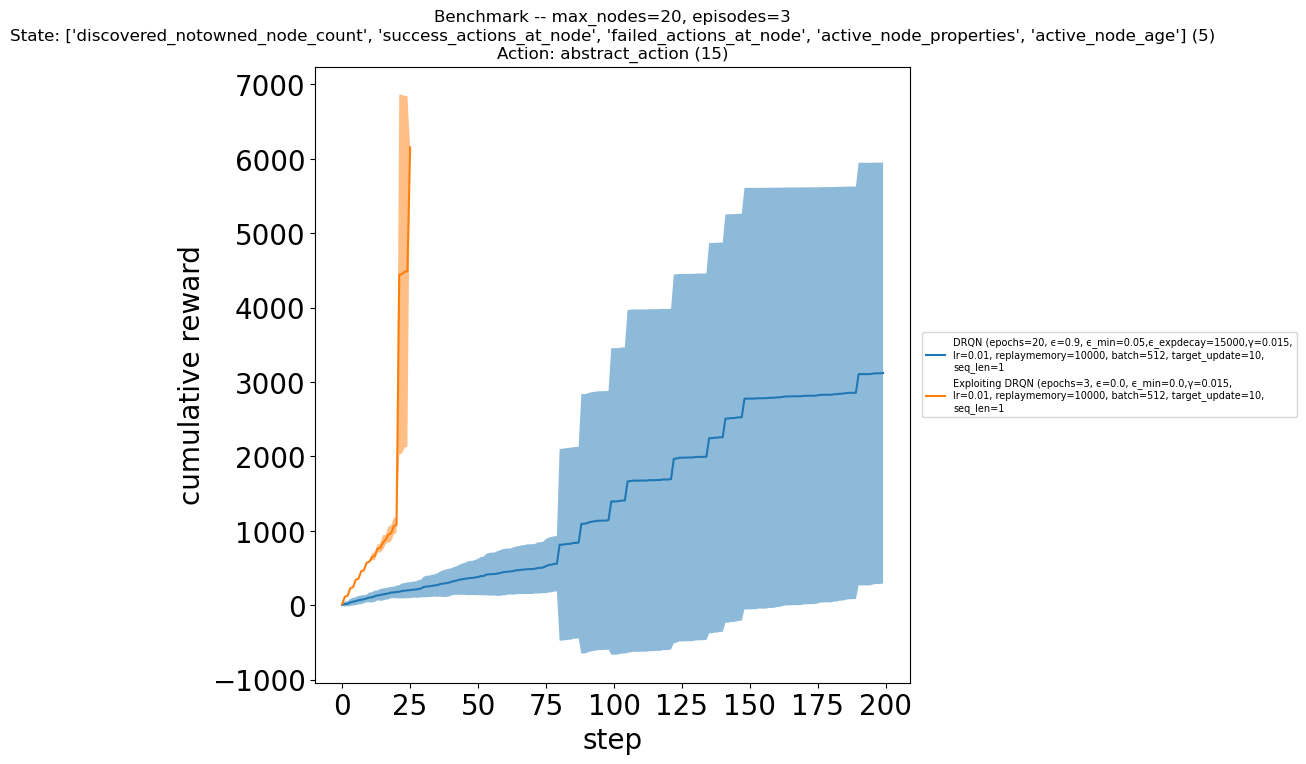

In [10]:
# Compare and plot results for all the agents
all_runs = [
    drqn_run,
    drqn_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

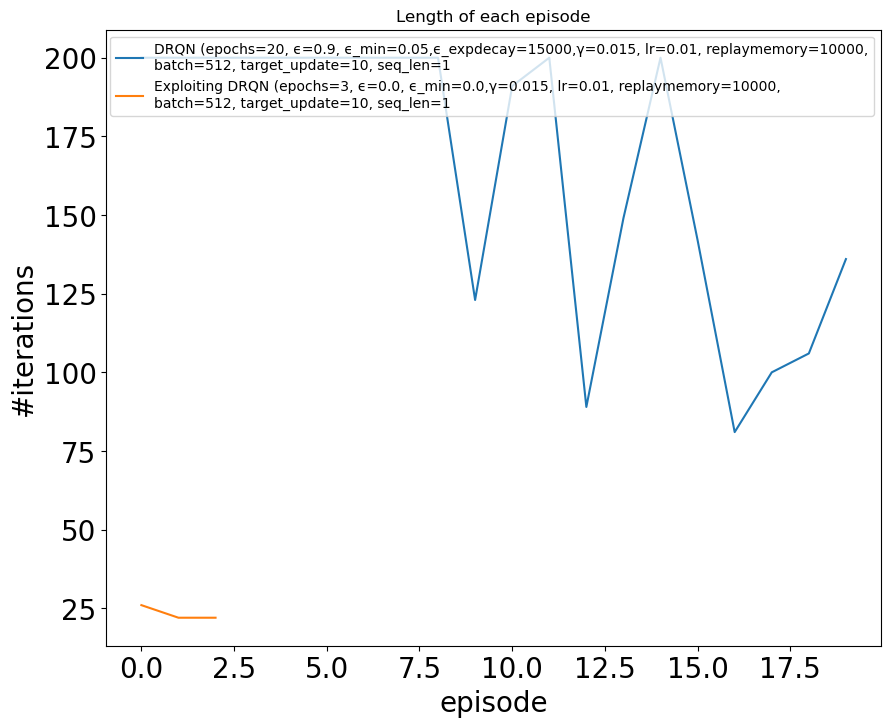

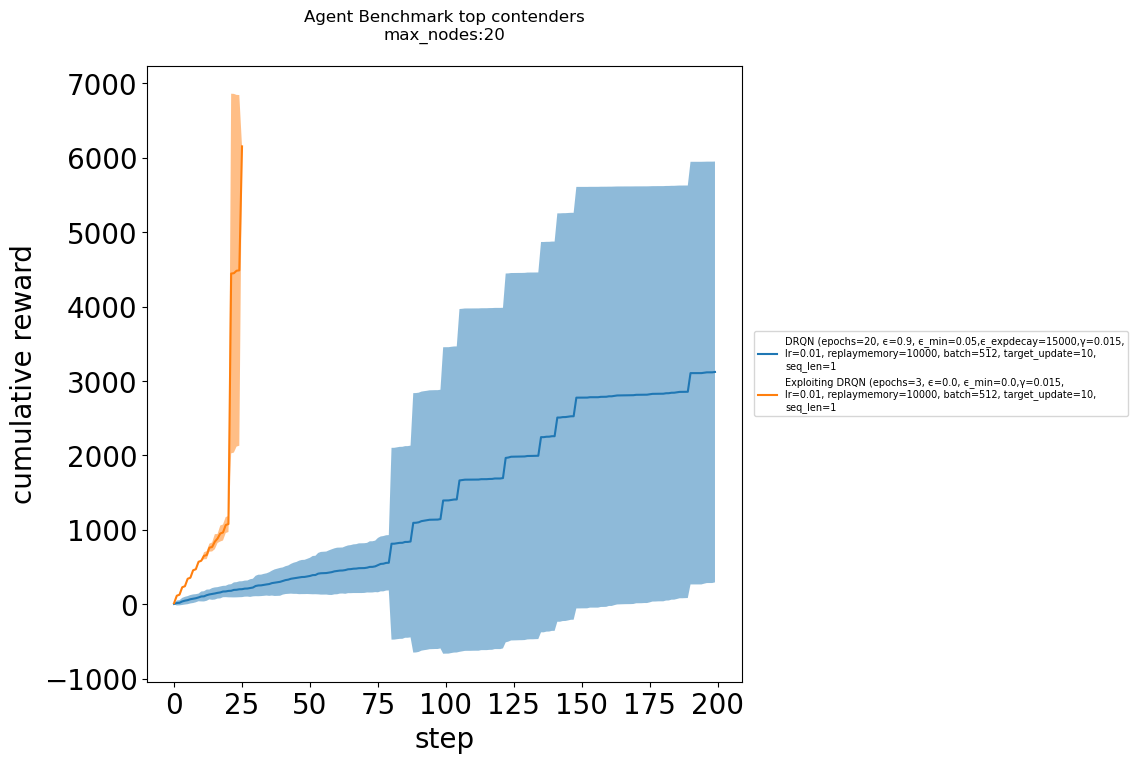

In [11]:
contenders = [drqn_run, drqn_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

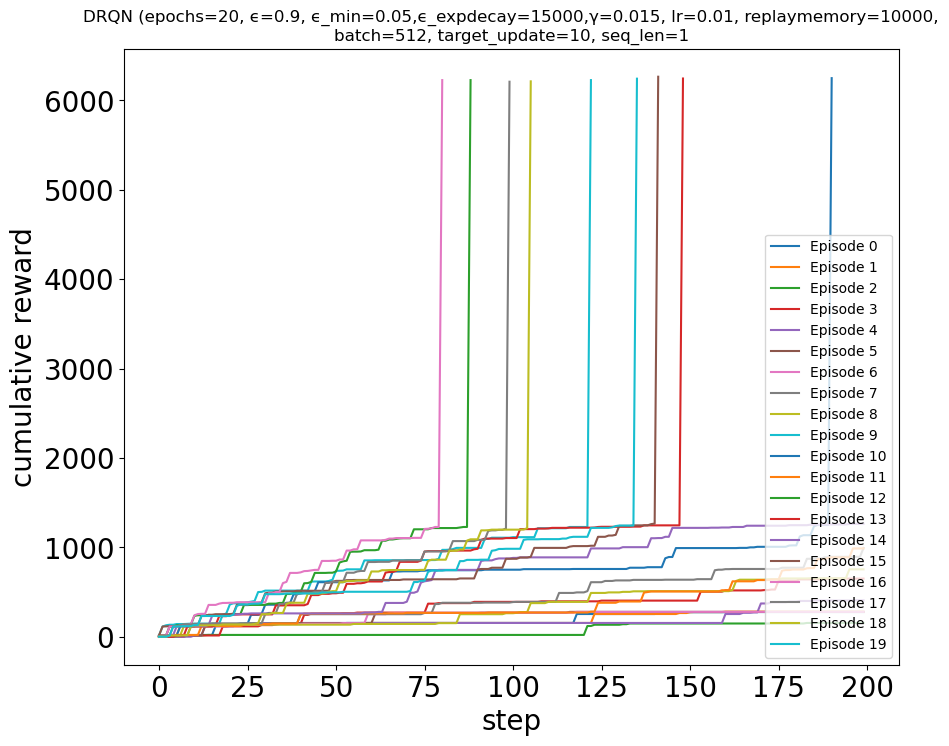

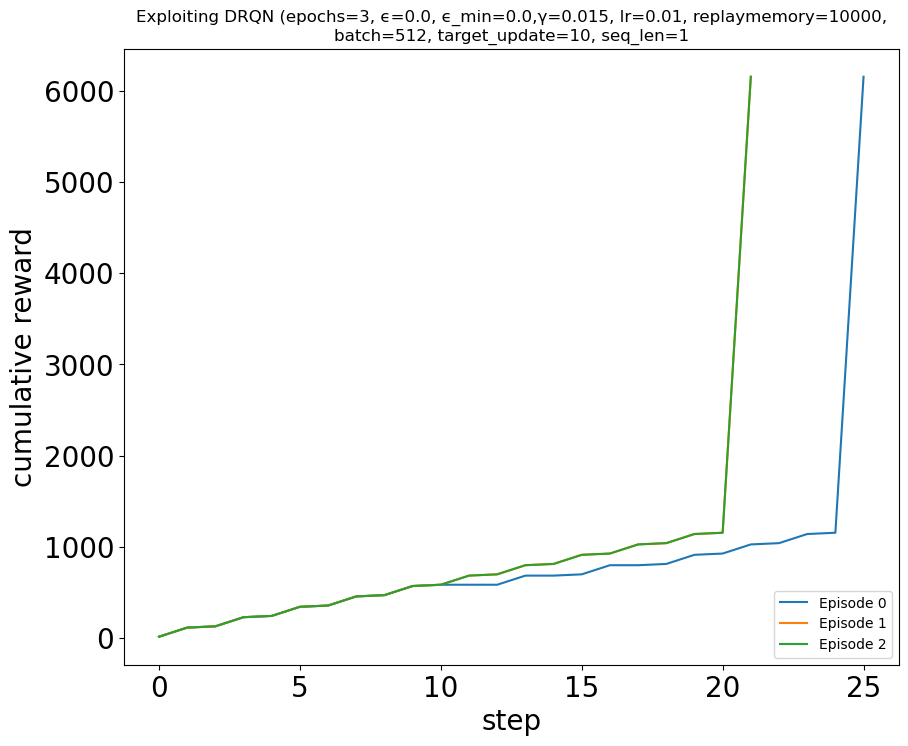

In [12]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)